In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar
sns.set()

# Data Preparation

In [8]:
# Importingthe hourly and daily training data as well as transaction data
train_hourly = pd.read_csv('trainingData_3600.csv')
train_daily = pd.read_csv('trainingData_86400.csv') 
trans = pd.read_csv('trans.csv')

In [9]:
train_daily.turnover.std()

2975.203198886924

In [672]:
# Importing the test data with no dependent variable
test_hourly = pd.read_csv('testData_3600.csv') 
test_daily = pd.read_csv('testData_86400.csv')

In [673]:
train_daily.rename(index=str, columns={"hr_hr": "Humidity_hr", 
                              "hr_daily": "Humidity_daily", 
                              'qhour': 'time', 
                              'ppt_hr': 'local_precipitation',
                              'ppt_daily': 'local_precipitation_daily',
                              'ws_hr': 'wind_speed_hr',
                              'ws_daily': 'wind_speed_daily',
                              'sf_hr': 'snow_fraction_hr',
                              'sf_daily': 'snow_fraction_daily',
                              'hlL.1': 'Holiday_neg_1',
                              'hlL1': 'Holiday_pls_1',
                              'hhn': 'Number_of_half_days_of_holidays',
                              'hlsL': 'Holiday',
                              'mdayN': 'Day_of_Month',
                              'yweekN': 'Calender_week',
                              'ydayN': 'day_of_year',  
                              'hl': 'holidays_str',
                              'hls': 'school_holiday_str'                             
                             }, inplace=True)

In [674]:
test_daily.rename(index=str, columns={"hr_hr": "Humidity_hr", 
                              "hr_daily": "Humidity_daily", 
                              'qhour': 'time', 
                              'ppt_hr': 'local_precipitation',
                              'ppt_daily': 'local_precipitation_daily',
                              'ws_hr': 'wind_speed_hr',
                              'ws_daily': 'wind_speed_daily',
                              'sf_hr': 'snow_fraction_hr',
                              'sf_daily': 'snow_fraction_daily',
                              'hlL.1': 'Holiday_neg_1',
                              'hlL1': 'Holiday_pls_1',
                              'hhn': 'Number_of_half_days_of_holidays',
                              'hlsL': 'Holiday',
                              'mdayN': 'Day_of_Month',
                              'yweekN': 'Calender_week',
                              'ydayN': 'day_of_year',  
                              'hl': 'holidays_str',
                              'hls': 'school_holiday_str'                             
                             }, inplace=True)

In [675]:
test_daily.head()

date holidays_str  school_holiday_str wday  wdayN  month  \
0  2019-01-02          NaN  Christmas holidays   Mi      3      1   
1  2019-01-03          NaN  Christmas holidays   Do      4      1   
2  2019-01-04          NaN  Christmas holidays   Fr      5      1   
3  2019-01-05          NaN                 NaN   Sa      6      1   
4  2019-01-06          NaN                 NaN   So      7      1   

   day_of_year  Calender_week  year  weekN    ...     Holiday  \
0            2              1  2019      1    ...        True   
1            3              1  2019      1    ...        True   
2            4              1  2019      1    ...        True   
3            5              1  2019      1    ...       False   
4            6              1  2019      1    ...       False   

   Number_of_half_days_of_holidays  Holiday_pls_1  Holiday_neg_1         hr  \
0                                4           True          False  78.708333   
1                                4          False          False  68.000000   
2                                4          False          False  64.750000   
3                                4          False          False  88.041667   
4                                4          False          False  96.833333   

    ppt  sf  sun       tmp        ws  
0   0.0   0  191  1.195000  5.301250  
1   0.0   0  274 -0.654167  1.534583  
2   0.0   0  266  0.118750  1.985000  
3  15.1   1    0 -0.181250  6.856250  
4  12.8   1    0  0.497917  6.868333  

[5 rows x 22 columns]

In [676]:
test_hourly.head()

date  qhour  hr  ppt  sf  sun   tmp    ws
0  2019-01-02  11:00  74  0.0   0   34  1.66  7.24
1  2019-01-02  12:00  66  0.0   0   37  2.54  7.50
2  2019-01-02  13:00  59  0.0   0   28  3.05  8.13
3  2019-01-02  14:00  58  0.0   0   29  2.97  8.03
4  2019-01-02  15:00  58  0.0   0   16  2.83  8.10

In [677]:
train_daily['turnover'].describe()

count     1069.000000
mean     10417.828672
std       2975.203199
min        607.000000
25%       9081.375000
50%      10611.687500
75%      12310.000000
max      20279.000000
Name: turnover, dtype: float64

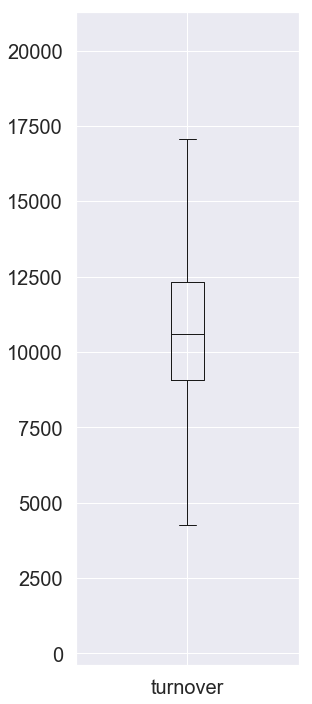

In [678]:
train_daily['turnover'].plot(kind='box', figsize=(4,12), fontsize=20, color='k')
plt.show()

## Feature Engineering For Hourly

In [679]:
train_hourly['date'] = pd.to_datetime(train_hourly['date'], format='%Y-%m-%d')
train_hourly.dtypes

date        datetime64[ns]
qhour               object
hr                   int64
ppt                float64
sf                   int64
sun                  int64
tmp                float64
ws                 float64
turnover           float64
dtype: object

In [680]:
test_hourly['date'] = pd.to_datetime(test_hourly['date'], format='%Y-%m-%d')

In [681]:
train_hourly['day_of_week'] = train_hourly['date'].dt.weekday_name
train_hourly['qhourN'] = train_hourly['qhour'].str[:2]
train_hourly['qhourN'] = train_hourly['qhourN'].astype(int)

In [682]:
test_hourly['day_of_week'] = test_hourly['date'].dt.weekday_name
test_hourly['qhourN'] = test_hourly['qhour'].str[:2]
test_hourly['qhourN'] = test_hourly['qhourN'].astype(int)

### Öffnungszeiten

In [683]:
# Grouping the datafram by the weekday and looking at the min and max opening hour
train_hourly.groupby('day_of_week').describe()['qhourN'][['min', 'max']]

min   max
day_of_week            
Friday       11.0  22.0
Monday       11.0  22.0
Saturday     11.0  22.0
Sunday       16.0  22.0
Thursday     11.0  22.0
Tuesday      11.0  22.0
Wednesday    11.0  22.0

In [ ]:
# Getting a column 'day_of_the_week" by looking at  the date
train_hourly['day_of_week'] = train_hourly['date'].dt.weekday_name
# Extracting the hour information from the qhour column
train_hourly['qhourN'] = train_hourly['qhour'].str[:2]
# Converting the String to an integer
train_hourly['qhourN'] = train_hourly['qhourN'].astype(int)

In [684]:
train_daily.columns

Index(['date', 'holidays_str', 'school_holiday_str', 'wday', 'wdayN', 'month',
       'day_of_year', 'Calender_week', 'year', 'weekN', 'hlL', 'Day_of_Month',
       'Holiday', 'Number_of_half_days_of_holidays', 'Holiday_pls_1',
       'Holiday_neg_1', 'hr', 'ppt', 'sf', 'sun', 'tmp', 'ws', 'turnover'],
      dtype='object')

In [685]:
train_daily.head()

date holidays_str school_holiday_str wday  wdayN  month  day_of_year  \
0  2016-01-18          NaN                NaN   Mo      1      1           18   
1  2016-01-19          NaN                NaN   Di      2      1           19   
2  2016-01-20          NaN                NaN   Mi      3      1           20   
3  2016-01-21          NaN                NaN   Do      4      1           21   
4  2016-01-22          NaN                NaN   Fr      5      1           22   

   Calender_week  year  weekN     ...      Number_of_half_days_of_holidays  \
0              3  2016      1     ...                                    0   
1              3  2016      1     ...                                    0   
2              3  2016      1     ...                                    0   
3              3  2016      1     ...                                    0   
4              3  2016      1     ...                                    0   

   Holiday_pls_1  Holiday_neg_1         hr  ppt  sf  sun       tmp        ws  \
0          False          False  69.250000  0.0   0  377 -3.165000  1.961667   
1          False          False  80.000000  0.7   1    0  0.333750  3.508333   
2          False          False  86.291667  1.7   1    0  1.660417  3.629583   
3          False          False  82.125000  0.0   0  502 -0.604583  1.977083   
4          False          False  69.375000  0.0   0  514  0.370833  1.320000   

     turnover  
0   8743.2500  
1  10609.8125  
2  10023.0625  
3   9635.2500  
4  13982.9375  

[5 rows x 23 columns]

In [686]:
train_daily.isnull().sum()

date                                  0
holidays_str                       1027
school_holiday_str                  808
wday                                  0
wdayN                                 0
month                                 0
day_of_year                           0
Calender_week                         0
year                                  0
weekN                                 0
hlL                                   0
Day_of_Month                          0
Holiday                               0
Number_of_half_days_of_holidays       0
Holiday_pls_1                         0
Holiday_neg_1                         0
hr                                    0
ppt                                   0
sf                                    0
sun                                   0
tmp                                   0
ws                                    0
turnover                              0
dtype: int64

In [687]:
# Replacing the NaNs in the Holidays with No
train_daily.fillna(value='No', inplace=True)
test_daily.fillna(value='No', inplace=True)

## Data Types

In [689]:
train_daily.dtypes

date                                object
holidays_str                        object
school_holiday_str                  object
wday                                object
wdayN                                int64
month                                int64
day_of_year                          int64
Calender_week                        int64
year                                 int64
weekN                                int64
hlL                                   bool
Day_of_Month                         int64
Holiday                               bool
Number_of_half_days_of_holidays      int64
Holiday_pls_1                         bool
Holiday_neg_1                         bool
hr                                 float64
ppt                                float64
sf                                   int64
sun                                  int64
tmp                                float64
ws                                 float64
turnover                           float64
dtype: obje

In [690]:
train_daily['date'] = pd.to_datetime(train_daily['date'], format='%Y-%m-%d', errors='coerce')
train_daily['date'].dtypes

dtype('<M8[ns]')

In [691]:
test_daily['date'] = pd.to_datetime(test_daily['date'], format='%Y-%m-%d', errors='coerce')

# Feature Engineering für Täglich

In [692]:
# Converting the datacolumn to 'seit_t0'
train_daily['Seit_t0'] = (train_daily['date'] - train_daily['date'].min()).apply(lambda x: x.days)
# Getting the month as a string
train_daily['month_str'] = train_daily['month'].apply(lambda x: calendar.month_abbr[x])
# Getting a dummy as 'day_before_payday'
train_daily['before_payday'] = np.where(train_daily['Day_of_Month'] == 24, 1, 0)
# Getting the Delta of Temoerature as 'tmp_delta'
train_daily['tmp_delta'] = train_daily['tmp'] - train_daily['tmp'].shift(1)
# Filling the first and only Nan with the median
train_daily['tmp_delta'].fillna(value=train_daily['tmp_delta'].median(), inplace = True)
# getting a cloumn that represents all Holidays und 'Feiertage'
train_daily['is_holiday'] = np.where((train_daily['holidays_str'] == 'No') & (train_daily['school_holiday_str']=='No'),
                                     'No', 'Yes') 

In [693]:
# Converting the datacolumn to 'seit_t0'
test_daily['Seit_t0'] = (test_daily['date'] - train_daily['date'].min()).apply(lambda x: x.days)
# Getting the month as a string
test_daily['month_str'] = test_daily['month'].apply(lambda x: calendar.month_abbr[x])
# Getting a dummy as 'day_before_payday'
test_daily['before_payday'] = np.where(test_daily['Day_of_Month'] == 24, 1, 0)
# Getting the Delta of Temoerature as 'tmp_delta'
test_daily['tmp_delta'] = test_daily['tmp'] - test_daily['tmp'].shift(1)
# Filling the first and only Nan with the median
test_daily['tmp_delta'].fillna(value=test_daily['tmp_delta'].median(), inplace = True)
# getting a cloumn that represents all Holidays und 'Feiertage'
test_daily['is_holiday'] = np.where((test_daily['holidays_str'] == 'No') & (test_daily['school_holiday_str']=='No'), 
                                    'No', 'Yes') 

In [694]:
test_daily.head()

date holidays_str  school_holiday_str wday  wdayN  month  day_of_year  \
0 2019-01-02           No  Christmas holidays   Mi      3      1            2   
1 2019-01-03           No  Christmas holidays   Do      4      1            3   
2 2019-01-04           No  Christmas holidays   Fr      5      1            4   
3 2019-01-05           No                  No   Sa      6      1            5   
4 2019-01-06           No                  No   So      7      1            6   

   Calender_week  year  weekN     ...       ppt  sf  sun       tmp        ws  \
0              1  2019      1     ...       0.0   0  191  1.195000  5.301250   
1              1  2019      1     ...       0.0   0  274 -0.654167  1.534583   
2              1  2019      1     ...       0.0   0  266  0.118750  1.985000   
3              1  2019      1     ...      15.1   1    0 -0.181250  6.856250   
4              1  2019      1     ...      12.8   1    0  0.497917  6.868333   

   Seit_t0  month_str  before_payday  tmp_delta  is_holiday  
0     1080        Jan              0   0.271458         Yes  
1     1081        Jan              0  -1.849167         Yes  
2     1082        Jan              0   0.772917         Yes  
3     1083        Jan              0  -0.300000          No  
4     1084        Jan              0   0.679167          No  

[5 rows x 27 columns]

In [695]:
train_daily.shape

(1069, 28)

In [696]:
test_daily.shape

(67, 27)

In [697]:
train_hourly.shape

(11341, 11)

In [698]:
test_hourly.shape

(733, 10)

In [699]:
train_hourly.isnull().sum()

date           0
qhour          0
hr             0
ppt            0
sf             0
sun            0
tmp            0
ws             0
turnover       0
day_of_week    0
qhourN         0
dtype: int64

In [700]:
train_daily.isnull().sum()

date                               0
holidays_str                       0
school_holiday_str                 0
wday                               0
wdayN                              0
month                              0
day_of_year                        0
Calender_week                      0
year                               0
weekN                              0
hlL                                0
Day_of_Month                       0
Holiday                            0
Number_of_half_days_of_holidays    0
Holiday_pls_1                      0
Holiday_neg_1                      0
hr                                 0
ppt                                0
sf                                 0
sun                                0
tmp                                0
ws                                 0
turnover                           0
Seit_t0                            0
month_str                          0
before_payday                      0
tmp_delta                          0
i

In [701]:
test_hourly.isnull().sum()

date           0
qhour          0
hr             0
ppt            0
sf             0
sun            0
tmp            0
ws             0
day_of_week    0
qhourN         0
dtype: int64

In [702]:
test_daily.isnull().sum()

date                               0
holidays_str                       0
school_holiday_str                 0
wday                               0
wdayN                              0
month                              0
day_of_year                        0
Calender_week                      0
year                               0
weekN                              0
hlL                                0
Day_of_Month                       0
Holiday                            0
Number_of_half_days_of_holidays    0
Holiday_pls_1                      0
Holiday_neg_1                      0
hr                                 0
ppt                                0
sf                                 0
sun                                0
tmp                                0
ws                                 0
Seit_t0                            0
month_str                          0
before_payday                      0
tmp_delta                          0
is_holiday                         0
d

In [703]:
str_col = train_daily.select_dtypes(include=object).columns
numeric_col = train_daily.select_dtypes(include=[int,float]).columns

## Add Google Trends

In [704]:
# importing dependencies
import pytrends
from pytrends.request import TrendReq
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt

In [705]:
# Specifying the parameters
start_date= date(2016, 1, 17)
end_date= date(2019, 3, 19)
key_word = ['Restaurant'] 
_cat = 71
_geo = 'CH-ZH'
_gprop = ''
_hl = ''
_tz = 0

In [706]:
# Source for this function: https://stackoverflow.com/questions/10688006/generate-a-list-of-datetimes-between-an-interval
def perdelta(start, end, delta):
    curr = start
    while curr < end:
        yield curr
        curr += delta

In [707]:
# generating a list of dates with 90 day intervals
dates=[]
for res in perdelta(start_date, end_date, timedelta(days=90)):
    dates.append(res)  
dates.append(end_date)

In [708]:
# gettingt the data for the individual time frames and adding them to a list
appended_data = []
for i in range(len(dates)-1):
    _timeframe = str(dates[i]) + ' ' + str(dates[i+1])
    totalTrend = TrendReq(hl=_hl, tz=_tz)
    totalTrend.build_payload(key_word, cat=_cat, timeframe=_timeframe, geo=_geo, gprop=_gprop)
    totalTrend = totalTrend.interest_over_time()
  #  totalTrend['Nooch_binary'] = np.where(totalTrend[key_word] > 0, 1, 0)
    appended_data.append(totalTrend)
#   print(totalTrend.tail())

In [709]:
# correcting the values of the individual time-frames
for i in range(len(appended_data)-1):
    x = appended_data[i][key_word].tail(1).values
    y = appended_data[i+1][key_word].head(1).values 
    factor = float(x/y)
    appended_data[i+1][key_word] = appended_data[i+1][key_word] * factor

In [710]:
# concatinating all the dfs to one complete dataframe
appended_df = pd.concat(appended_data, axis=0)
# deleting the duplicated indexes/rows
appended_df = appended_df[~appended_df.index.duplicated(keep='first')]

In [711]:
appended_df.head()

Restaurant  isPartial
date                             
2016-01-17        72.0      False
2016-01-18        65.0      False
2016-01-19        72.0      False
2016-01-20        67.0      False
2016-01-21        74.0      False

In [712]:
appended_df.drop(columns=['isPartial'], inplace=True)

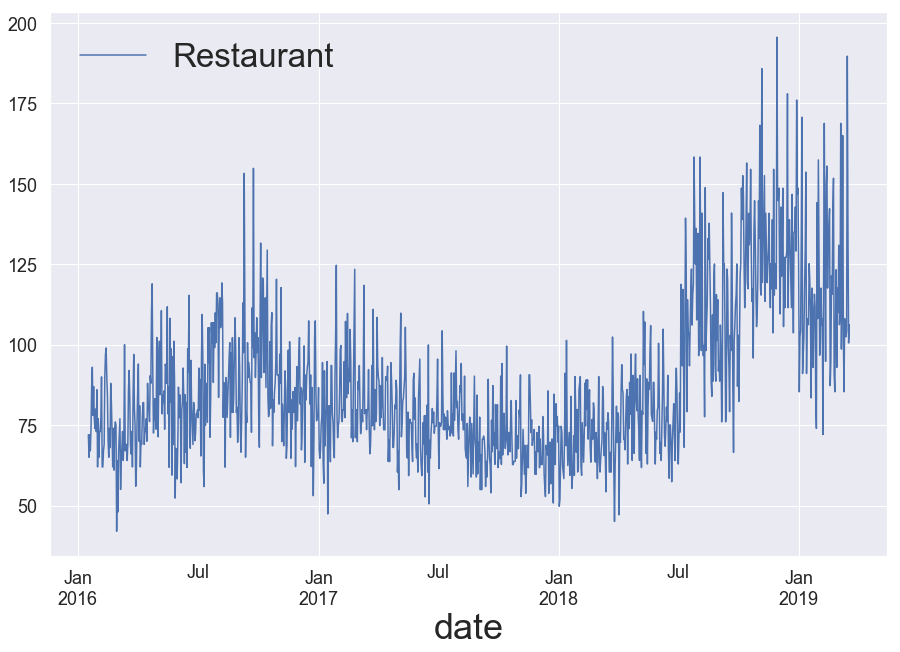

In [713]:
# Plotting the google Trends Time Series
appended_df.plot(figsize=(15,10), fontsize =18)
plt.show()

In [714]:
# Essen  CH
#appended_df.plot(figsize=(20,10))
#plt.show()

In [715]:
appended_df.head()

Restaurant
date                  
2016-01-17        72.0
2016-01-18        65.0
2016-01-19        72.0
2016-01-20        67.0
2016-01-21        74.0

In [716]:
appended_df.reset_index(inplace=True)
appended_df['date'] = pd.to_datetime(appended_df['date'], format='%Y-%m-%d', errors='coerce')

In [717]:
# Merging the generated Dataframes
train_daily = pd.merge(train_daily, appended_df, on='date', how='inner')
test_daily = pd.merge(test_daily, appended_df, on='date', how='inner')

In [718]:
test_daily = pd.merge(test_daily, appended_df, on='date', how='inner')

In [719]:
train_daily.columns

Index(['date', 'holidays_str', 'school_holiday_str', 'wday', 'wdayN', 'month',
       'day_of_year', 'Calender_week', 'year', 'weekN', 'hlL', 'Day_of_Month',
       'Holiday', 'Number_of_half_days_of_holidays', 'Holiday_pls_1',
       'Holiday_neg_1', 'hr', 'ppt', 'sf', 'sun', 'tmp', 'ws', 'turnover',
       'Seit_t0', 'month_str', 'before_payday', 'tmp_delta', 'is_holiday',
       'Restaurant'],
      dtype='object')

In [720]:
train_daily.shape

(1069, 29)

In [721]:
test_daily.shape

(67, 28)

In [722]:
# Merging the daily and hourly Dataframes
train_full =  pd.merge(train_hourly, train_daily, on='date', how='outer', suffixes=('_hourly', '_daily'))
test_full = pd.merge(test_hourly, test_daily, on='date', how='outer', suffixes=('_hourly', '_daily'))

In [723]:
test_full = pd.merge(test_hourly, test_daily, on='date', how='outer', suffixes=('_hourly', '_daily'))

In [724]:
train_full.shape

(11341, 39)

In [725]:
test_full.shape

(733, 37)

# Development over Time

In [20]:
# Creating a function that takes a dataframe and groups it by a given column to plot the turnover over time
def plot_over_time(df, column, x_label, y_label):
    grouped_df = df.groupby(column)
    y = grouped_df['turnover'].mean().values
    x = range(len(y))
    error = grouped_df['turnover'].std().values
    plt.figure(figsize=(20,8))
    plt.plot(x, y, 'k-')
    # plot the std
    plt.fill_between(x, y-error, y+error, alpha=0.4)
    plt.xticks(np.arange(len(y)), grouped_df['turnover'].mean().index, fontsize=18)
    plt.ylabel(y_label, fontsize=20 )
    plt.yticks(fontsize=18)
    plt.xlabel(x_label, fontsize=20)


In [95]:
def plot_stuff_month(df, column, x_label, y_label):
    grouped_df = df.groupby(column)
    y = grouped_df['turnover'].mean().values
    x = range(len(y))
    error = grouped_df['turnover'].std().values
    plt.figure(figsize=(20,8))
    plt.plot(x, y, 'k-')
    plt.fill_between(x, y-error, y+error, alpha=0.4)
    plt.xticks(np.arange(len(y)), ("January", "February", "March", "April", 
                                   "May", "June", "July", "August", "September", "October", "November", "December"),
              fontsize=18)
    plt.ylabel(y_label, fontsize=20)
    plt.yticks(fontsize=18)
    plt.xlabel(x_label, fontsize=20)
    plt.show()

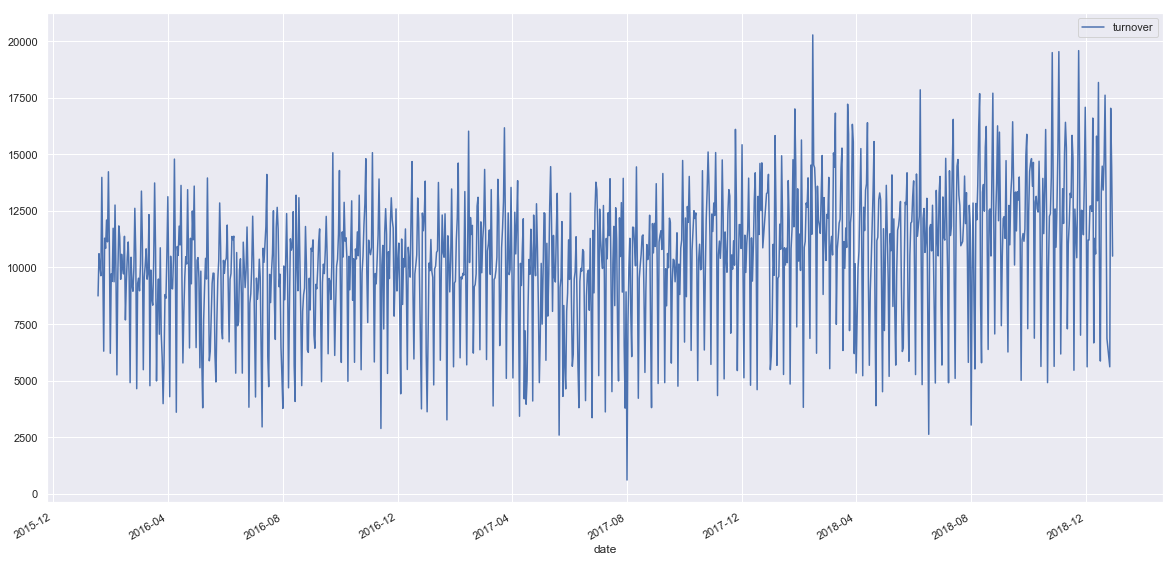

In [36]:
train_daily.plot(x='date', y='turnover', figsize=(20,10))
plt.show()

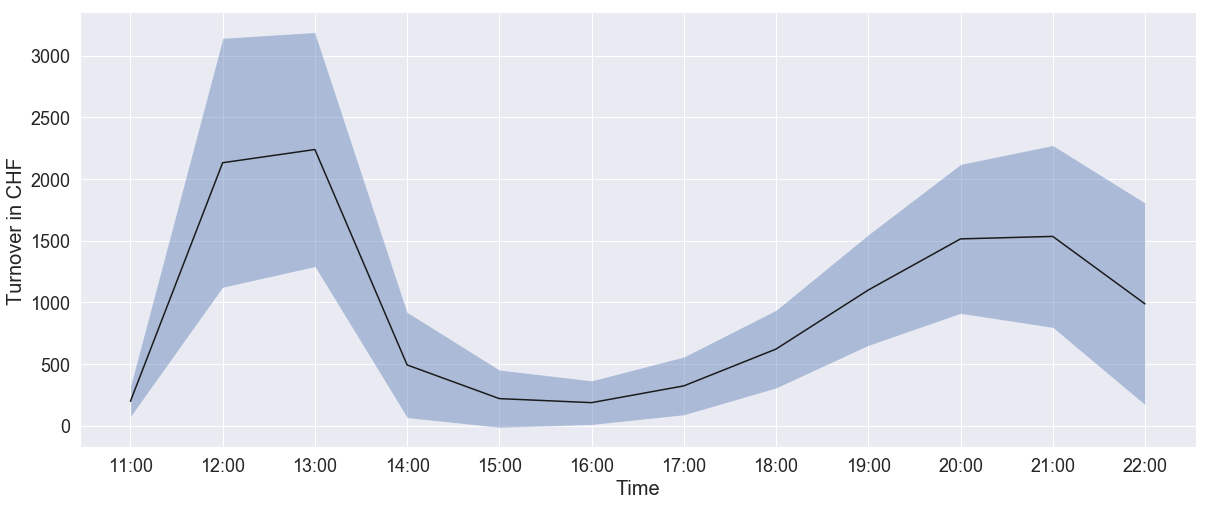

In [21]:
# plotting the hourly dataframe by the hour column
plot_over_time(train_hourly, 'qhour', 'Time', 'Turnover in CHF')
plt.xticks
plt.show()

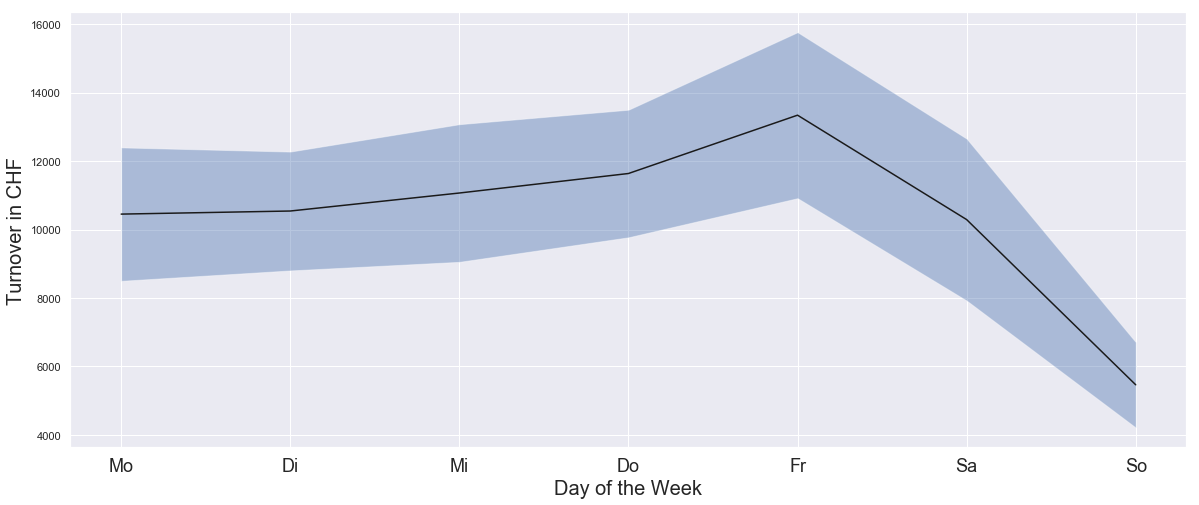

In [92]:
# plotting the daily dataframe by the day of the week column
plot_over_time(train_daily, 'wdayN','Day of the Week', 'Turnover in CHF')
plt.xticks(range(7),('Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'))
plt.show()

In [26]:
# Splitting the dataframe in two by whether or not there is a holiday
hol = train_daily[train_daily['is_holiday']!='No']
no_hol = train_daily[train_daily['is_holiday']=='No']

In [ ]:
def plot_over_time(df, column, x_label, y_label):
    grouped_df = df.groupby(column)
    y = grouped_df['turnover'].mean().values
    x = range(len(y))
    error = grouped_df['turnover'].std().values
    plt.figure(figsize=(20,8))
    plt.plot(x, y, 'k-')
    plt.fill_between(x, y-error, y+error, alpha=0.4)
    plt.xticks(np.arange(len(y)), grouped_df['turnover'].mean().index, fontsize=18)
    plt.ylabel(y_label, fontsize=20 )
    plt.yticks(fontsize=18)
    plt.xlabel(x_label, fontsize=20)
#   plt.show()

In [303]:
def plot_over_time2(df1, df2, column, x_label, y_label):
    grouped_df1 = df1.groupby(column)
    grouped_df2 = df2.groupby(column)
    y = grouped_df1['turnover'].mean().values
    x = range(len(y))
    y2 = grouped_df2['turnover'].mean().values
    error1 = grouped_df1['turnover'].std().values
    error2 = grouped_df2['turnover'].std().values
    plt.figure(figsize=(20,8))
    plt.plot(x, y, 'r-', linewidth=4)
    plt.fill_between(x, y-error1, y+error1, alpha=0.4, facecolor='r')
    plt.plot(x, y2, 'b-', linewidth=4)
    plt.fill_between(x, y2-error2, y+error2, alpha=0.4, facecolor='b')
    plt.xticks(np.arange(len(y)), grouped_df1['turnover'].mean().index, fontsize=18)
    plt.ylabel(y_label, fontsize=20 )
    plt.yticks(fontsize=18)
    plt.xlabel(x_label, fontsize=20)
    
#   plt.show()

In [304]:
# Custom function that takes two dataframes and groups them by a given column 
# to plot the turnover over time
def plot_over_time3(df1, df2, column, x_label, y_label):
    grouped_df1 = df1.groupby(column)
    grouped_df2 = df2.groupby(column)
    y = grouped_df1['turnover_hourly'].mean().values
    x = range(len(y))
    y2 = grouped_df2['turnover_hourly'].mean().values
    error1 = grouped_df1['turnover_hourly'].std().values
    error2 = grouped_df2['turnover_hourly'].std().values
    plt.figure(figsize=(20,8))
    plt.plot(x, y, 'r-', linewidth=4)
    plt.fill_between(x, y-error1, y+error1, alpha=0.4, facecolor='r')
    plt.plot(x, y2, 'b-', linewidth=4)
    plt.fill_between(x, y2-error2, y+error2, alpha=0.4, facecolor='b')
    plt.xticks(np.arange(len(y)), grouped_df1['turnover_hourly'].mean().index, fontsize=18)
    plt.ylabel(y_label, fontsize=20 )
    plt.yticks(fontsize=18)
    plt.xlabel(x_label, fontsize=20)
    


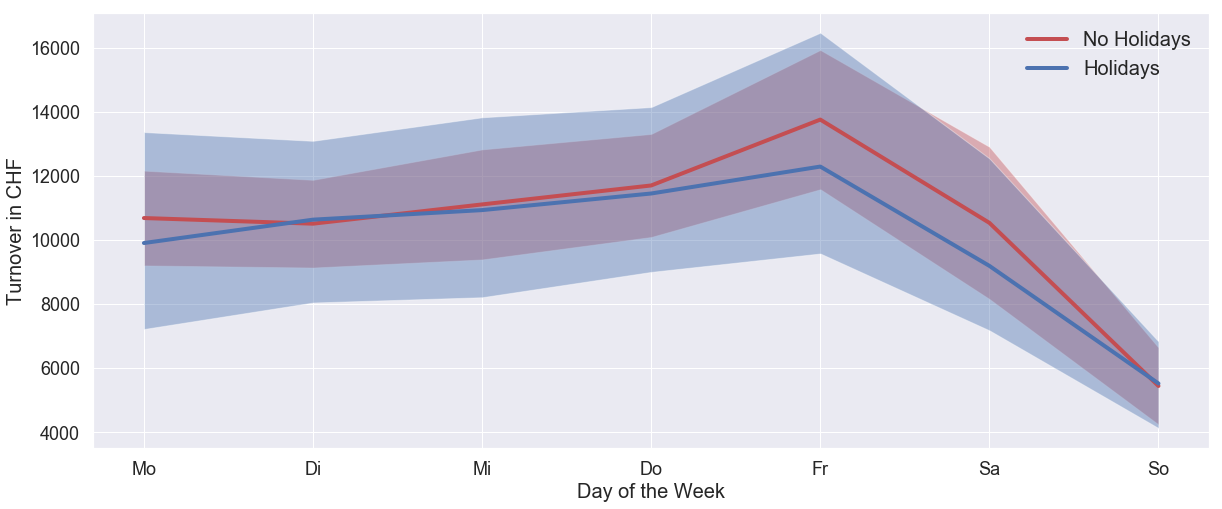

In [305]:
# plotting the turnover development over the day of the week for holidays and not_holidays
plot_over_time3(no_hol, hol, 'wdayN','Day of the Week', 'Turnover in CHF')
plt.xticks(range(7),('Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'))
plt.legend(('No Holidays', 'Holidays'), fontsize=20)
plt.show()

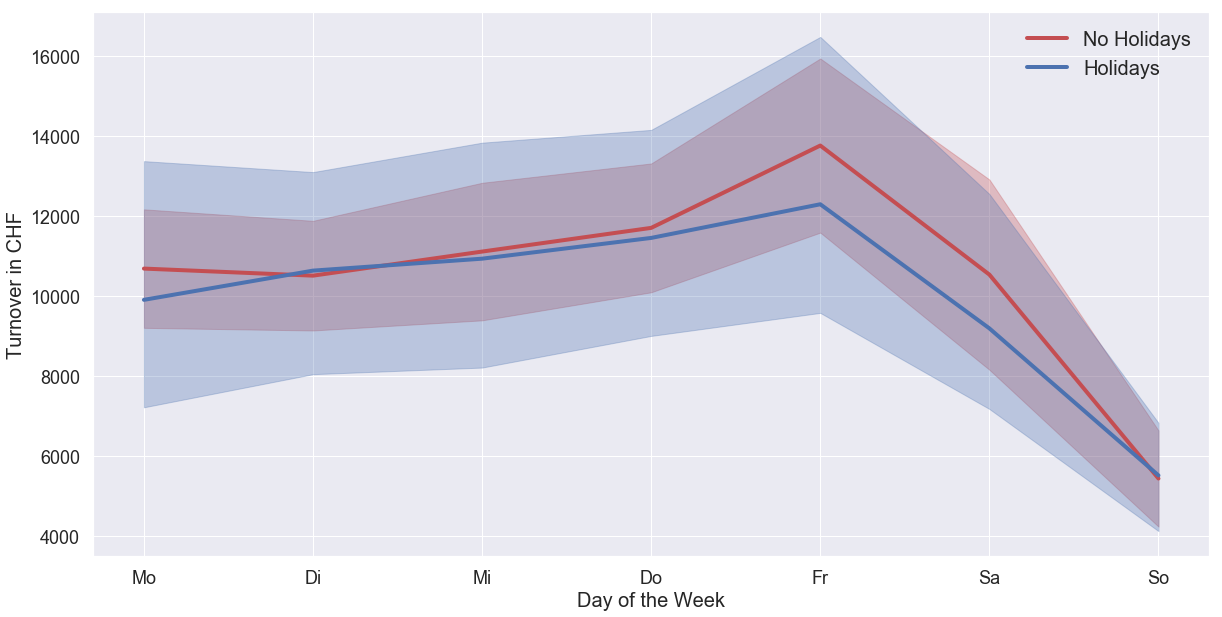

In [284]:
# plotting the turnover development over the day of the week for holidays and not_holidays
plot_over_time3(no_hol, hol, 'wdayN','Day of the Week', 'Turnover in CHF')
plt.xticks(range(7),('Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'))
plt.legend(('No Holidays', 'Holidays'), fontsize=20)
plt.show()

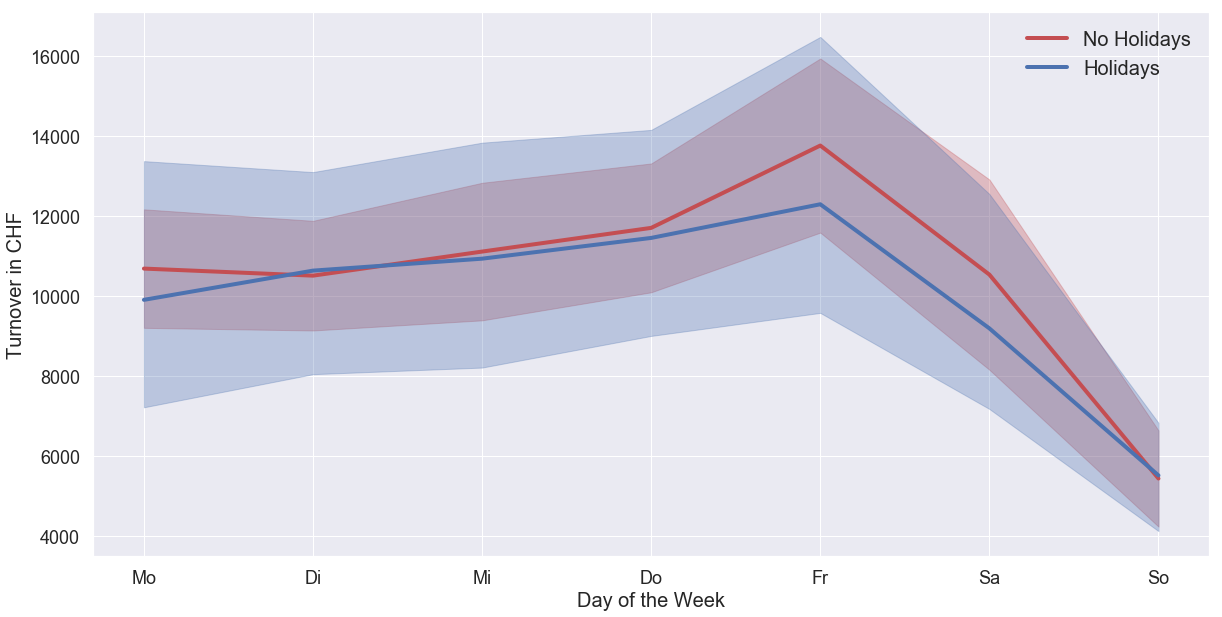

In [293]:
plot_over_time2(no_hol, hol, 'wdayN','Day of the Week', 'Turnover in CHF')
plt.xticks(range(7),('Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'))
plt.legend(('No Holidays', 'Holidays'), fontsize=20)
plt.show()

In [288]:
# Splitting the dataframe whith the hourly data in two by whether or not there is a holiday
hol_ful = train_full[train_full['is_holiday']!='No']
no_hol_ful = train_full[train_full['is_holiday']=='No']

In [287]:
no_hol_ful.columns

Index(['date', 'holidays_str', 'school_holiday_str', 'wday', 'wdayN', 'month',
       'day_of_year', 'Calender_week', 'year', 'weekN', 'hlL', 'Day_of_Month',
       'Holiday', 'Number_of_half_days_of_holidays', 'Holiday_pls_1',
       'Holiday_neg_1', 'hr', 'ppt', 'sf', 'sun', 'tmp', 'ws', 'turnover',
       'Seit_t0', 'month_str', 'before_payday', 'tmp_delta', 'is_holiday',
       'Restaurant'],
      dtype='object')

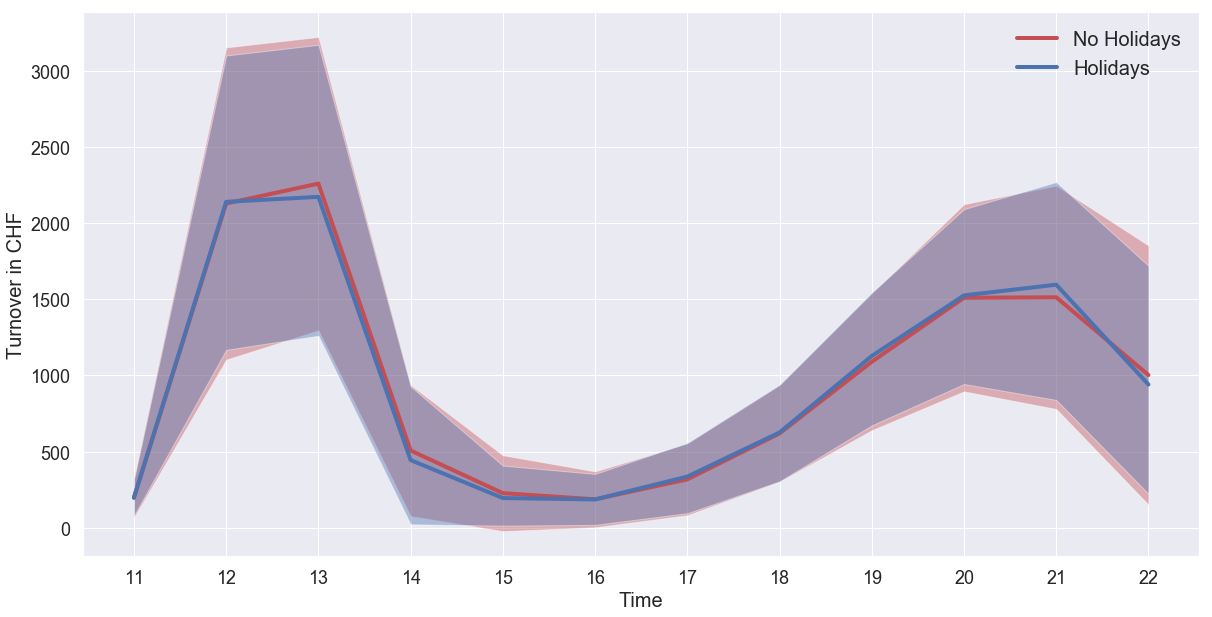

In [302]:
# plotting the turnover development over the hour of the day for holidays and not_holidays
plot_over_time3(no_hol_ful, hol_ful, 'qhourN','Time', 'Turnover in CHF')
plt.legend(('No Holidays', 'Holidays'), fontsize=20)
plt.show()

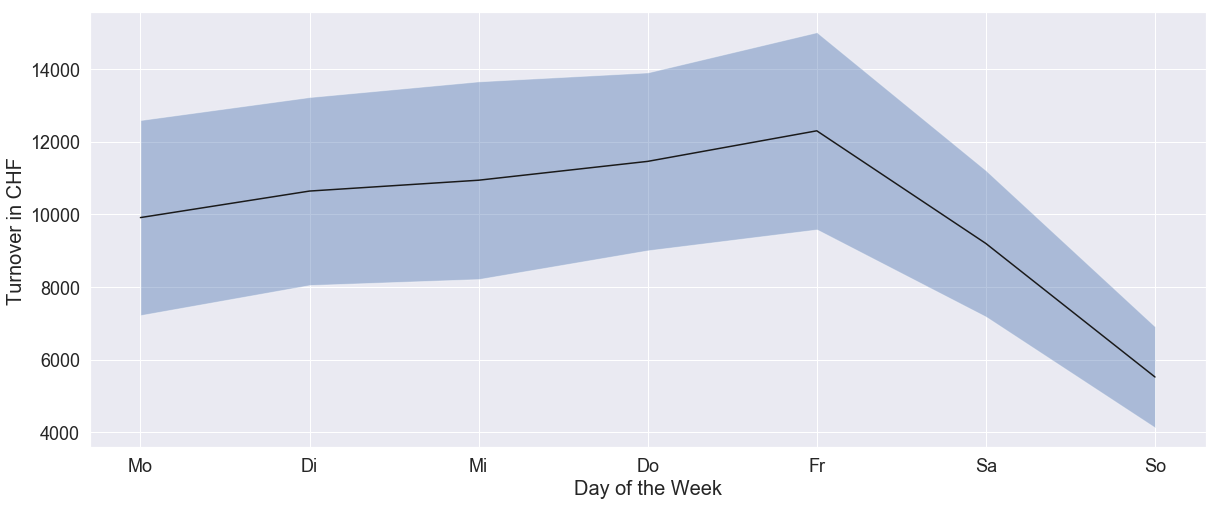

In [28]:
plot_over_time(hol, 'wdayN','Day of the Week', 'Turnover in CHF')
plt.xticks(range(7),('Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'))
plt.show()

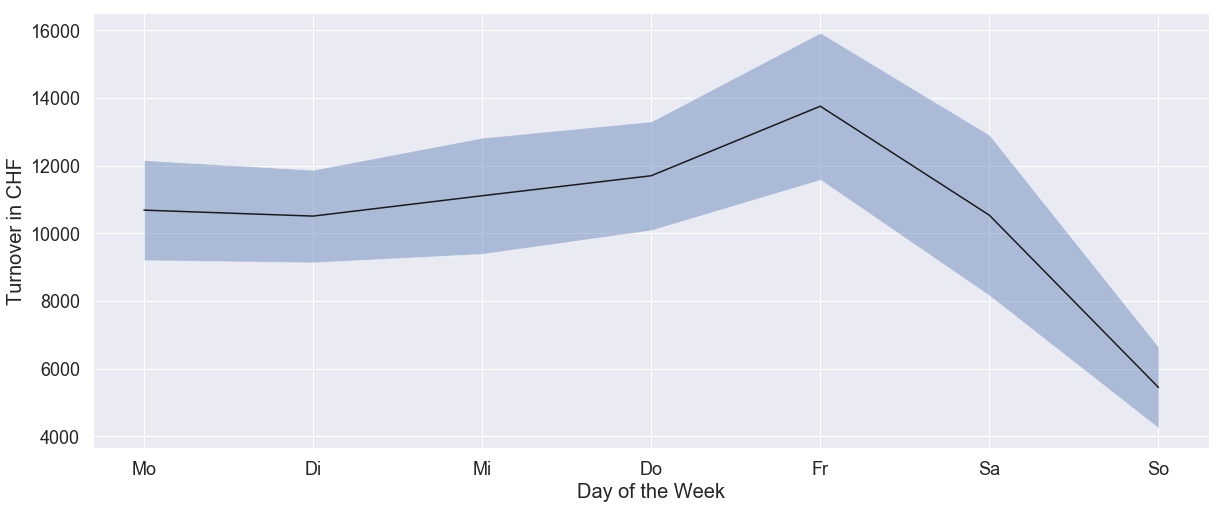

In [608]:
plot_over_time(no_hol, 'wdayN','Day of the Week', 'Turnover in CHF')
plt.xticks(range(7),('Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'))
plt.show()

In [604]:
train_daily.head()

date holidays_str school_holiday_str wday  wdayN  month  day_of_year  \
0 2016-01-18           No                 No   Mo      1      1           18   
1 2016-01-19           No                 No   Di      2      1           19   
2 2016-01-20           No                 No   Mi      3      1           20   
3 2016-01-21           No                 No   Do      4      1           21   
4 2016-01-22           No                 No   Fr      5      1           22   

   Calender_week  year  weekN     ...      sf  sun       tmp        ws  \
0              3  2016      1     ...       0  377 -3.165000  1.961667   
1              3  2016      1     ...       1    0  0.333750  3.508333   
2              3  2016      1     ...       1    0  1.660417  3.629583   
3              3  2016      1     ...       0  502 -0.604583  1.977083   
4              3  2016      1     ...       0  514  0.370833  1.320000   

     turnover  delta  month_str  before_payday  tmp_delta  is_holiday  
0   8743.2500      0        Jan              0   0.120417          No  
1  10609.8125      1        Jan              0   3.498750          No  
2  10023.0625      2        Jan              0   1.326667          No  
3   9635.2500      3        Jan              0  -2.265000          No  
4  13982.9375      4        Jan              0   0.975417          No  

[5 rows x 28 columns]

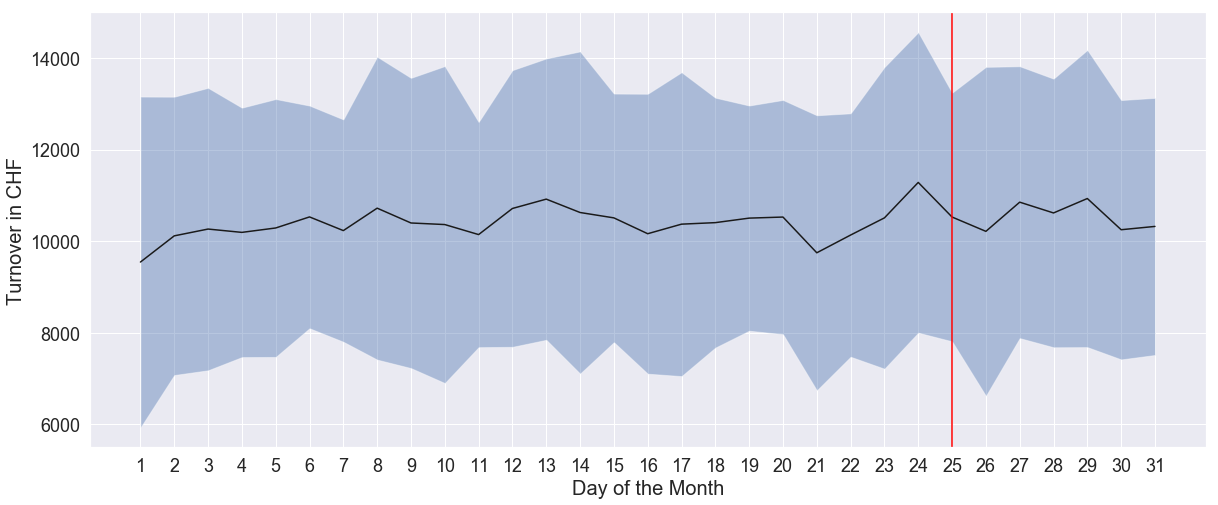

In [108]:
# Plotting the tunrover development over the day of the mont
plot_over_time(train_daily, 'Day_of_Month','Day of the Month', 'Turnover in CHF')
# Creating an Abline for payday
plt.axvline(x=24, color='red')
plt.show()

In [720]:
train_daily.groupby('Day_of_Month')['turnover'].describe()

count          mean          std        min           25%  \
Day_of_Month                                                              
1              35.0   9545.637500  3613.100246   607.0000   6825.312500   
2              35.0  10117.669643  3038.193753  5117.1250   7660.281250   
3              35.0  10266.248214  3083.251767  4275.6875   8623.625000   
4              35.0  10193.630357  2722.802742  3818.2500   9456.406250   
5              35.0  10289.830357  2815.365487  4338.5000   8840.281250   
6              35.0  10531.223214  2430.859211  5188.3750   9481.625000   
7              35.0  10232.593214  2427.334717  4681.5000   9651.906250   
8              35.0  10722.460714  3306.794721  3797.9375   9510.687500   
9              35.0  10398.887500  3168.178596  3424.6250   9080.125000   
10             35.0  10364.489286  3460.407163  2953.1875   9193.531250   
11             35.0  10145.641429  2458.156257  3802.3750   9108.218750   
12             35.0  10715.582143  3020.713791  3877.6250   9394.500000   
13             35.0  10919.667857  3071.383721  2885.2500  10209.750000   
14             35.0  10627.742857  3517.220210  4079.3750   9445.062500   
15             35.0  10510.259286  2714.028928  5001.2500   9712.062500   
16             35.0  10164.383929  3055.665614  3956.1250   8167.468750   
17             35.0  10373.178571  3317.596499  2626.7500   8945.375000   
18             36.0  10406.312500  2728.041281  4115.5000   8819.093750   
19             36.0  10505.013889  2458.160575  5331.5000   9112.562500   
20             36.0  10528.250000  2557.034079  4985.8750   9620.781250   
21             36.0   9748.100694  3002.513921  2591.5000   8515.609375   
22             35.0  10135.642857  2657.154847  3264.1875   9303.468750   
23             36.0  10510.208333  3293.155298  4098.7500   8731.968750   
24             33.0  11284.460227  3280.262015  4753.5000   9163.562500   
25             33.0  10528.615530  2713.595274  3359.8750   9678.125000   
26             35.0  10216.107143  3591.374920  3750.5000   7782.375000   
27             36.0  10853.411458  2967.791039  3805.4375   9619.265625   
28             36.0  10617.892361  2932.233767  4633.5000   9114.968750   
29             34.0  10933.117647  3244.313672  4508.8750   8927.734375   
30             32.0  10251.675781  2831.248112  3784.2500   8572.343750   
31             20.0  10323.812500  2806.831693  5210.8750   9272.421875   

                      50%           75%         max  
Day_of_Month                                         
1             10225.87500  12399.125000  15425.2500  
2             10139.87500  12047.062500  19540.9375  
3             10482.12500  12226.531250  15079.8750  
4             10497.37500  11538.468750  15075.3125  
5             10940.18750  12314.500000  15828.6875  
6             10730.50000  12067.531250  15254.7500  
7             10554.25000  11719.062500  14722.8125  
8             10405.00000  12774.000000  17852.6875  
9             10767.87500  11771.687500  16416.2500  
10            10766.12500  11772.500000  17684.0000  
11            10599.25000  11985.906250  14446.3125  
12            10854.62500  12537.281250  15805.9375  
13            11408.75000  12406.375000  16547.3125  
14             9886.81250  11884.812500  20279.0000  
15            10792.25000  12429.062500  14530.6875  
16            10283.75000  12098.125000  15840.6875  
17            10818.56250  12808.562500  16233.7500  
18            10817.84375  12488.296875  14772.8750  
19            10525.50000  12070.046875  16098.9375  
20            10397.40625  12353.906250  15565.8750  
21            10114.00000  11366.406250  17615.6875  
22            10448.62500  11342.750000  14623.6250  
23            10607.75000  12179.609375  19584.8750  
24            11789.56250  13079.875000  17704.2500  
25            11290.56250  12099.500000  14185.3750  
26            10844.93750  12573.187500  19497.5000  
27            11699.46875 

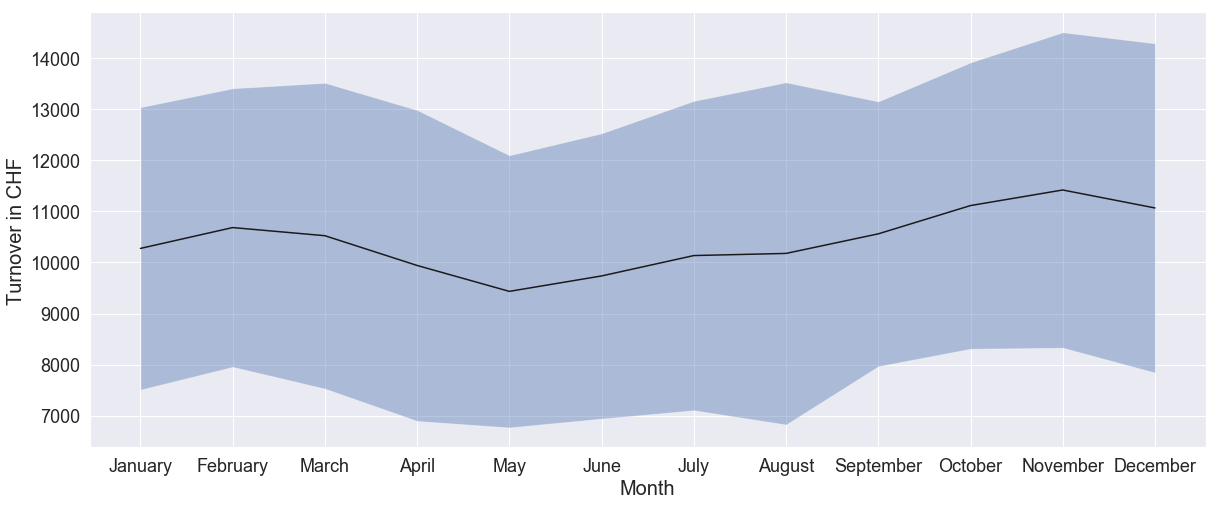

In [109]:
# Plotting the turnover development over the months
plot_over_time(train_daily, 'month','Month', 'Turnover in CHF')
plt.show()

## Transaktionsdaten

In [58]:
# Creating a column called 'is_beverage' based on whether the article description contans the word beverage
trans['is_bererage'] = np.where(trans['article_group0'].str.contains("beverage", case=False, na=False), 
                                'beverage', 'not_beverage')

In [ ]:
trans['takeaway'] = np.where(trans['mwst'] >= 1.06, 'Restaurant', 'Takeaway') 

# Durchschnittliche Turnover for average Takeaqay und REstaurant Transaktion

In [127]:
trans.groupby('is_bererage').describe()['price_item_list_brut']

count       mean        std  min    25%     50%     75%  \
is_bererage                                                                
beverage      186514.0   7.191960   3.037596  0.0  5.875   6.875   7.875   
not_beverage  491364.0  16.242423  15.242556  0.0  5.000  12.500  27.500   

                 max  
is_bererage           
beverage       88.75  
not_beverage  343.75

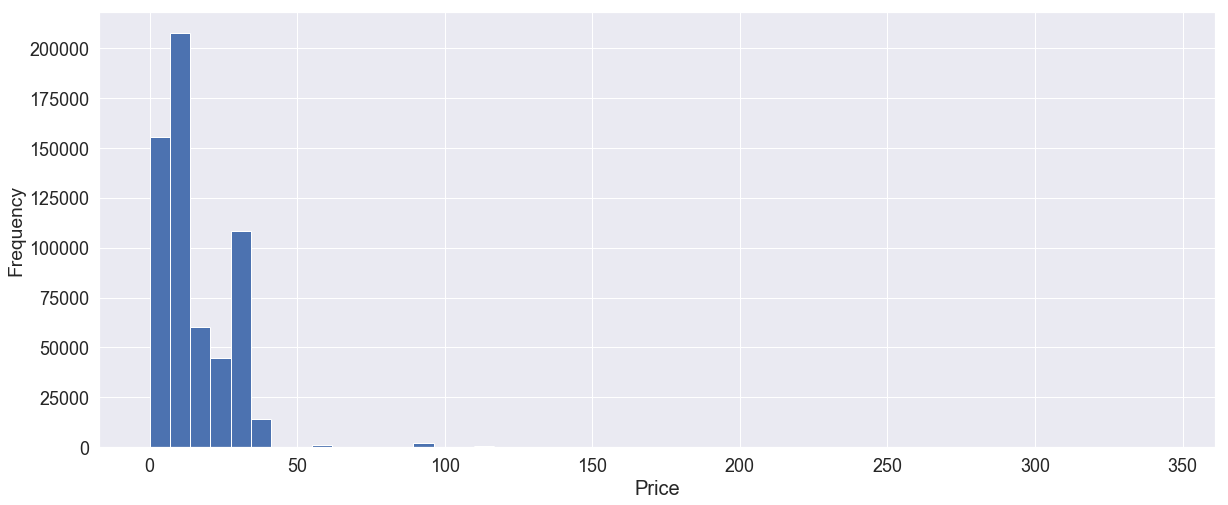

In [347]:
# plotting a histigram of item prices
trans['price_item_list_brut'].plot(kind='hist', bins=50, figsize=(20,8), fontsize=18)
plt.xlabel('Price', fontsize=20)

In [128]:
beverages = trans[trans['is_bererage']=='beverage']

AttributeError: Unknown property xlabel

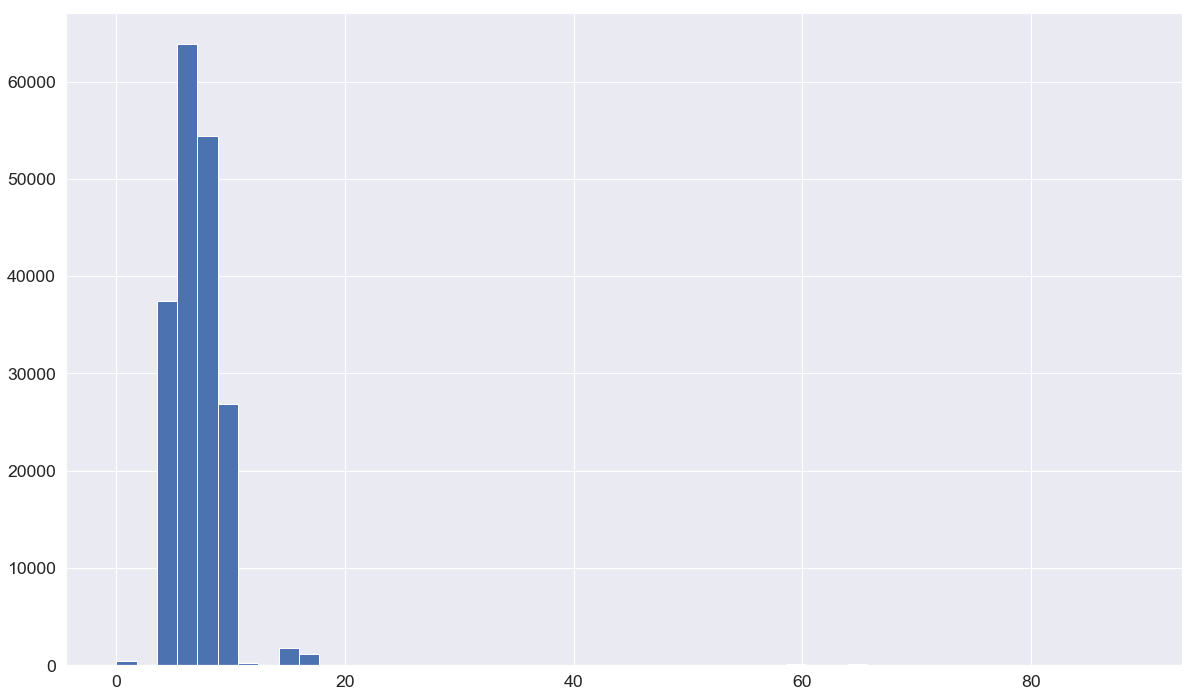

In [298]:
# Subsetting the data into whether not something is a beverage
beverages = trans[trans['is_bererage']=='beverage']
# Plotting a histogram of beverage prices
beverages['price_item_list_brut'].plot(kind='hist', bins=50, figsize=(20,12), fontsize=18)

In [ ]:
trans['takeaway'] = np.where(trans['mwst'] >= 1.06, 'Restaurant', 'Takeaway') 

In [88]:
tr_df.head()

date  count
0 2016-01-18  474.0
1 2016-01-19  656.0
2 2016-01-20  630.0
3 2016-01-21  606.0
4 2016-01-22  926.0

In [ ]:
# Creating a column 'is_alc' based on whether something is a beverage and costs >= 10,- CHF
trans['is_alc'] = np.where((trans['is_bererage'] == 'beverage') & (trans['price_item_list_brut']>10), 1, 0) 

## High Margin Item Prediction

In [63]:

alc_df = trans.groupby('date')['is_alc'].sum().to_frame()
alc_df.reset_index(inplace=True)
alc_df['date'] = pd.to_datetime(alc_df['date'], format='%Y-%m-%d', errors='coerce')
tr_df = trans.groupby('date').describe()['artCnt']['count'].to_frame()
tr_df.reset_index(inplace=True)
tr_df['date'] = pd.to_datetime(tr_df['date'], format='%Y-%m-%d', errors='coerce')

In [68]:
# Creating a new dataframe with a column that represents the alcohol sales per day
alc_df = trans.groupby('date')['is_alc'].sum().to_frame()
alc_df.reset_index(inplace=True)
alc_df['date'] = pd.to_datetime(alc_df['date'], format='%Y-%m-%d', errors='coerce')
tr_df = trans.groupby('date').describe()['artCnt']['count'].to_frame()
tr_df.reset_index(inplace=True)
tr_df['date'] = pd.to_datetime(tr_df['date'], format='%Y-%m-%d', errors='coerce')
# Merging  the dataframes
df_w_alc = pd.merge(train_daily, alc_df, on='date', how='inner')
df_w_alc_tr = pd.merge(df_w_alc, tr_df, on='date', how='inner')
df_w_alc_tr.drop(columns=['date'], inplace=True)
# Preparing the dataframe by One-Hot Encoding  for ML
df_con1 = pd.get_dummies(df_w_alc_tr)
df_con2 = pd.get_dummies(df_con1, columns=['hlL', 'Holiday', 'Holiday_pls_1', 'Holiday_neg_1'])

In [72]:
df_con2.is_alc.head()

0     3
1    10
2     7
3    10
4    17
Name: is_alc, dtype: int64

In [107]:
# Dropping Columns that are not available in the real world for prediction
df_con2.drop(columns=['turnover', 'count'], inplace=True)
# Splitting the dependent Variable from the features
X = df_con2.drop(columns=['is_alc'])
y = df_con2['is_alc']

In [109]:
# Creating a Train and Test set and train our mod
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)
        
gbm = GradientBoostingRegressor(learning_rate = 0.01,
                                       max_depth=4, 
                                       min_samples_leaf=10,
                                       min_samples_split=15,
                                       n_estimators =1000,
                                       subsample=0.9)
        
gbm.fit(X_tr, y_tr)
pred = gbm.predict(X_te)
mae_t = mae(pred, y_te)
mape = mean_absolute_percentage_error(y_te, pred)

y_avg = np.mean(y)

# Dummy Prediction Mean
dummy_pipe_mean.fit(X_tr, y_tr)
dum_pred = dummy_pipe_mean.predict(X_te)
MAE_dum = mae(y_te, dum_pred)

print('MAPE: {}, MAE: {} Dummy: {}, AVG_y: {}'.format(mape, mae_t, MAE_dum, y_avg))

MAPE: inf, MAE: 3.4370262345669076 Dummy: 4.485106848117177, AVG_y: 10.432179607109449


/anaconda2/envs/exts-aml2/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


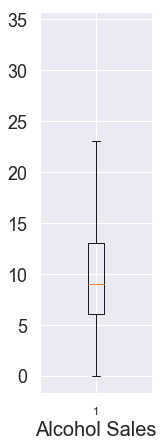

In [97]:
# Boxplot of daily alcohol sales
plt.figure(figsize=(2,7))
plt.boxplot(y)
plt.xlabel('Alcohol Sales', fontsize=20)
plt.yticks(fontsize=18)
plt.show()

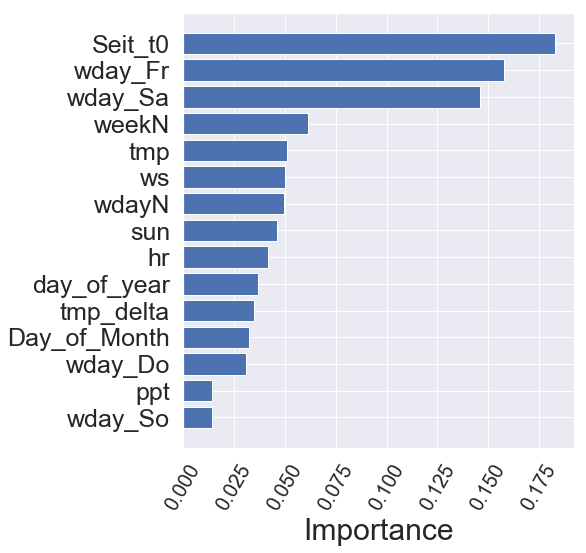

In [114]:
# Plotting Feature Importances
features=X.columns
importances = gbm.feature_importances_
indices = np.argsort(importances)
indices = indices[-15:]
plt.figure(1, figsize=(7,8))
#plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices], fontsize = 25)
plt.xlabel('Importance', fontsize=30)
plt.xticks(fontsize=20, rotation=60)
#plt.figsize(20,20)
plt.show()

## Predict every item

In [70]:
trans['article'] = trans['article'].astype(str)

In [135]:
# Custom Function to predict the amount of Sales for every unique item in a given column
# It uses a Gradient Boosing Estimator and returns lists of:
# The article, the Mean Absolute Error for the sales prediction for this article,
# The result of a simple dummy prediction (mean) and the average per day sales for this item
def pred_all(df, col):
    article_liste = []
    mae_list_te = []
    mae_dummy = []
    y_avg = []
    for article in df[col].unique():
       # print('article:', article)
        df_temp = df[df[col]==article]
        df_d_temp = df_temp.groupby('date')['artCnt'].count().to_frame()
        df_d_temp.reset_index(inplace=True)
        df_d_temp['date'] = pd.to_datetime(df_d_temp['date'], format='%Y-%m-%d', errors='coerce')
        df_full_temp = pd.merge(train_daily, df_d_temp, on='date', how='left')
        df_full_temp['artCnt'].fillna(value=0, inplace=True)
        df_full_temp.drop(columns=['date'], inplace=True)
        df_wd1 = pd.get_dummies(df_full_temp)
        df_wd2 = pd.get_dummies(df_wd1, columns=['hlL', 'Holiday', 'Holiday_pls_1', 'Holiday_neg_1'])
      # print('NaNs:', df_wd2.isnull().sum().sum())
        X = df_wd2.drop(columns=['artCnt', 'turnover'])
        y = df_wd2['artCnt']
        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)
        gbm = GradientBoostingRegressor(learning_rate = 0.01,
                                       max_depth=4, 
                                       min_samples_leaf=10,
                                       min_samples_split=15,
                                       n_estimators =1000,
                                       subsample=0.9)
        
        gbm.fit(X_tr, y_tr)
        pred = gbm.predict(X_te)
        mae_t = mae(pred, y_te)
     #  print(mae_t)
        mae_list_te.append(mae_t)
        article_liste.append(article)
        y_avg.append(np.mean(y))
        # Dummy Prediction Mean
        dummy_pipe_mean.fit(X_tr, y_tr)
        dum_pred = dummy_pipe_mean.predict(X_te)
        MAE_dum = mae(y_te, dum_pred)
        mae_dummy.append(MAE_dum)
    return mae_list_te, article_liste, y_avg, mae_dummy

In [136]:
# prdictiong the sales for every unique item in the transaction data
mae_list_te, article_liste, y_avg, mae_dummy = pred_all(trans, 'article')

In [137]:
# getting the mean MAE of the dummy Estimator
np.mean(mae_dummy)

0.6837585835695157

In [138]:
# Getting the mean and median MAE for the GB Estimator
np.median(mae_list_te)
np.mean(mae_list_te)

0.5086638957807346

In [140]:
np.median(mae_list_te)

0.24219274787463135

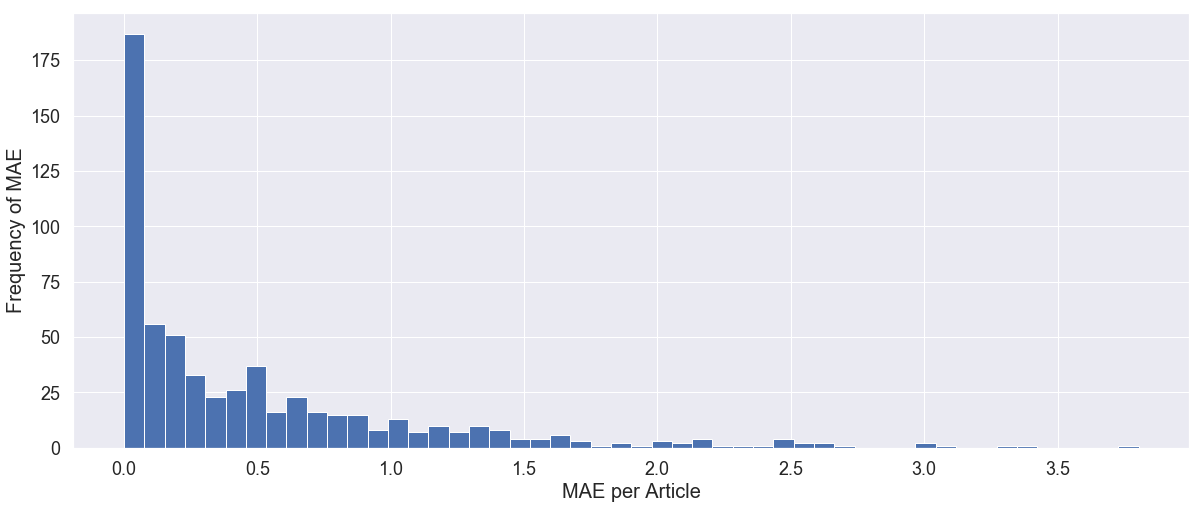

In [599]:
plt.figure(figsize=(20,8))
plt.hist(mae_list_te, bins=50)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('MAE per Article', fontsize=20)
plt.ylabel('Frequency of MAE', fontsize=20)
plt.show()

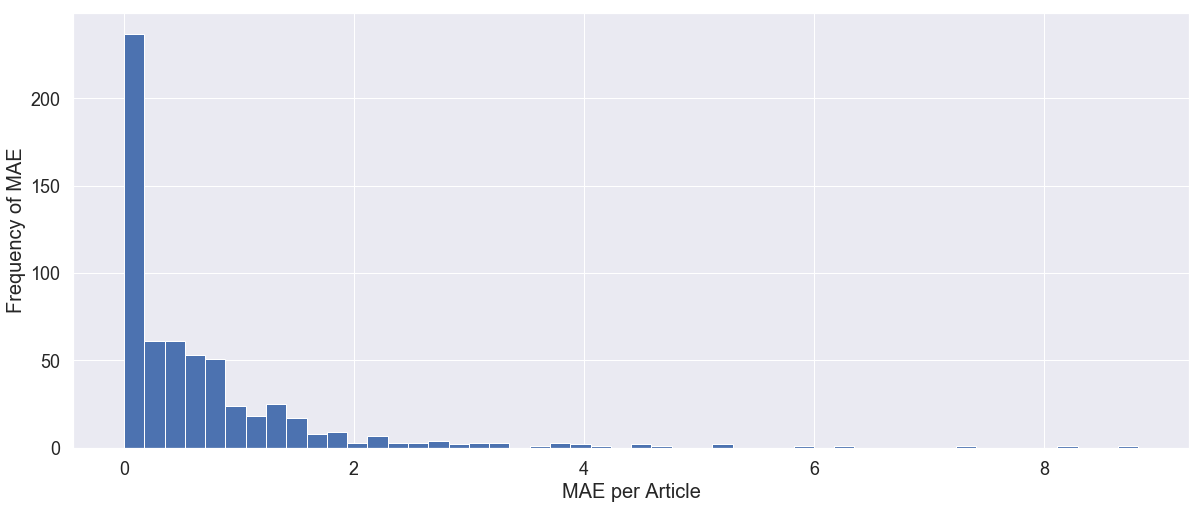

In [600]:
# Plotting the Distrribution of MAE per Artivle
plt.figure(figsize=(20,8))
plt.hist(mae_dummy, bins=50)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('MAE per Article', fontsize=20)
plt.ylabel('Frequency of MAE', fontsize=20)
plt.show()
plt.show()

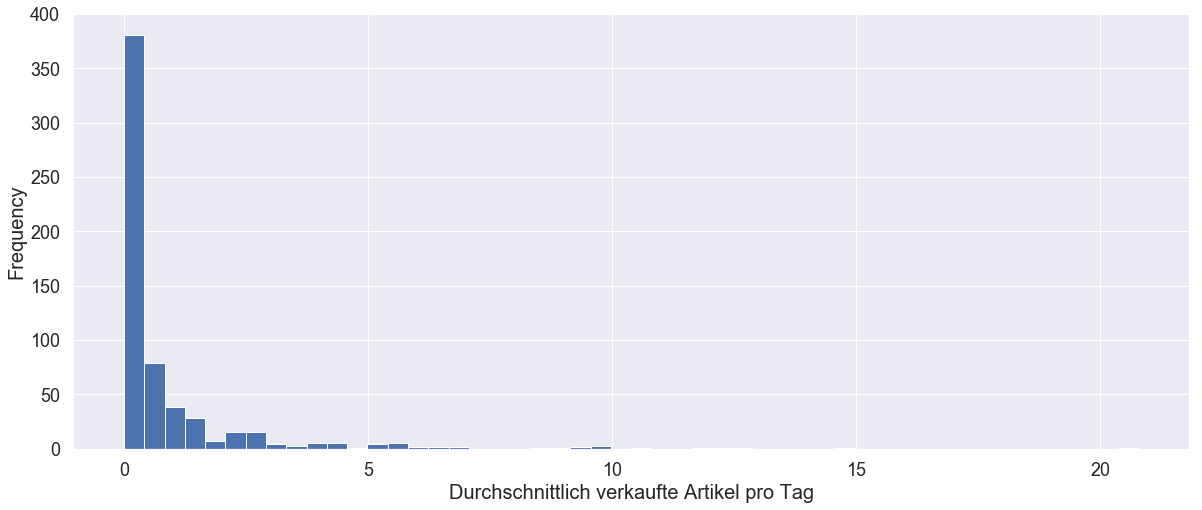

In [601]:
# Plotting the average Sales per day per Article
plt.figure(figsize=(20,8))
plt.hist(y_avg, bins=50)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Durchschnittlich verkaufte Artikel pro Tag', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()
plt.show()

In [602]:
# getting the mean and median sales numbers for every unique article
np.mean(y_avg)
np.median(y_avg)

0.91547891696274

In [603]:
np.median(y_avg)

0.21889616463985032

In [557]:
mean_absolute_percentage_error(0, 1)

/anaconda2/envs/exts-aml2/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


inf

In [494]:
tr1 = trans_1.groupby('date')['artCnt'].count().to_frame()

In [495]:
tr1.reset_index(inplace=True)

In [496]:
tr1['date'] = pd.to_datetime(tr1['date'], format='%Y-%m-%d', errors='coerce')

In [497]:
df_full_temp = pd.merge(train_daily, tr1, on='date', how='left')

In [500]:
df_full_temp['artCnt'].fillna(value=0, inplace=True)

In [501]:
df_full_temp

date       holidays_str  school_holiday_str wday  wdayN  month  \
0    2016-01-18                 No                  No   Mo      1      1   
1    2016-01-19                 No                  No   Di      2      1   
2    2016-01-20                 No                  No   Mi      3      1   
3    2016-01-21                 No                  No   Do      4      1   
4    2016-01-22                 No                  No   Fr      5      1   
5    2016-01-23                 No                  No   Sa      6      1   
6    2016-01-24                 No                  No   So      7      1   
7    2016-01-25                 No                  No   Mo      1      1   
8    2016-01-26                 No                  No   Di      2      1   
9    2016-01-27                 No                  No   Mi      3      1   
10   2016-01-28                 No                  No   Do      4      1   
11   2016-01-29                 No                  No   Fr      5      1   
12   2016-01-30                 No                  No   Sa      6      1   
13   2016-01-31                 No                  No   So      7      1   
14   2016-02-01                 No                  No   Mo      1      2   
15   2016-02-02                 No                  No   Di      2      2   
16   2016-02-03                 No                  No   Mi      3      2   
17   2016-02-04                 No                  No   Do      4      2   
18   2016-02-05                 No                  No   Fr      5      2   
19   2016-02-06                 No                  No   Sa      6      2   
20   2016-02-07                 No                  No   So      7      2   
21   2016-02-08                 No                  No   Mo      1      2   
22   2016-02-09                 No                  No   Di      2      2   
23   2016-02-10                 No                  No   Mi      3      2   
24   2016-02-11                 No                  No   Do      4      2   
25   2016-02-12                 No                  No   Fr      5      2   
26   2016-02-13                 No                  No   Sa      6      2   
27   2016-02-14    Valentine´s Day                  No   So      7      2   
28   2016-02-15                 No       Sport holiday   Mo      1      2   
29   2016-02-16                 No       Sport holiday   Di      2      2   
...         ...                ...                 ...  ...    ...    ...   
1039 2018-11-28                 No                  No   Mi      3     11   
1040 2018-11-29                 No                  No   Do      4     11   
1041 2018-11-30                 No                  No   Fr      5     11   
1042 2018-12-01                 No                  No   Sa      6     12   
1043 2018-12-02                 No                  No   So      7     12   
1044 2018-12-03                 No                  No   Mo      1     12   
1045 2018-12-04                 No                  No   Di      2     12   
1046 2018-12-05                 No                  No   Mi      3     12   
1047 2018-12-06                 No                  No   Do      4     12   
1048 2018-12-07                 No                  No   Fr      5     12   
1049 2018-12-08                 No                  No   Sa      6     12   
1050 2018-12-09                 No                  No   So      7     12   
1051 2018-12-10                 No                  No   Mo      1     12   
1052 2018-12-11                 No                  No   Di      2     12   
1053 2018-12-12                 No                  No   Mi      3     12   
1054 2018-12-13                 No                  No   Do      4     12   
1055 2018-12-14                 No                  No   Fr      5     12   
1056 2018-12-15                 No                  No   Sa      6     12   
1057 2018-12-16                 No                  No   So      7     12   
1058 2018-12-17                 No                  No   Mo      1     12   
1059 20

In [341]:
df_w_alc_tr.head()

date holidays_str school_holiday_str wday  wdayN  month  day_of_year  \
0 2016-01-18           No                 No   Mo      1      1           18   
1 2016-01-19           No                 No   Di      2      1           19   
2 2016-01-20           No                 No   Mi      3      1           20   
3 2016-01-21           No                 No   Do      4      1           21   
4 2016-01-22           No                 No   Fr      5      1           22   

   Calender_week  year  weekN  ...         tmp        ws    turnover  delta  \
0              3  2016      1  ...   -3.165000  1.961667   8743.2500      0   
1              3  2016      1  ...    0.333750  3.508333  10609.8125      1   
2              3  2016      1  ...    1.660417  3.629583  10023.0625      2   
3              3  2016      1  ...   -0.604583  1.977083   9635.2500      3   
4              3  2016      1  ...    0.370833  1.320000  13982.9375      4   

   month_str  before_payday  tmp_delta  is_holiday  is_alc  count  
0        Jan              0   0.120417          No       3  410.0  
1        Jan              0   3.498750          No      10  571.0  
2        Jan              0   1.326667          No       7  553.0  
3        Jan              0  -2.265000          No      10  542.0  
4        Jan              0   0.975417          No      17  793.0  

[5 rows x 30 columns]

In [422]:
from sklearn.preprocessing import scale

In [425]:
X = df_con2.drop(columns=['is_alc'])
y = df_con2['is_alc']

#X = scale(X)

In [387]:
sum(df_con1.isnull().sum())

0

In [388]:
df_con1.dtypes

wdayN                                        int64
month                                        int64
day_of_year                                  int64
Calender_week                                int64
year                                         int64
weekN                                        int64
hlL                                           bool
Day_of_Month                                 int64
Holiday                                       bool
Number_of_half_days_of_holidays              int64
Holiday_pls_1                                 bool
Holiday_neg_1                                 bool
hr                                         float64
ppt                                        float64
sf                                           int64
sun                                          int64
tmp                                        float64
ws                                         float64
turnover                                   float64
delta                          

In [391]:
df_con1['Holiday_pls_1'].head()

0    False
1    False
2    False
3    False
4    False
Name: Holiday_pls_1, dtype: bool

In [438]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=7.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [185]:
trans.shape

(677878, 24)

In [186]:
trans.isnull().sum()

d                            0
d_opened                     0
article                   1313
price_item_list_brut         0
count                        0
unit                    677878
turnover                     0
price_pos_list_net           0
comment_raw             677878
article_group0            4440
article_group1          677878
article_group2          677878
transaction_id               0
position_id                  0
position_cid                 0
artCnt                       0
artWeight                    0
min                          0
hour                         0
qhourN                       0
wdayN                        0
date                         0
dQ                           0
shiftedDate                  0
dtype: int64

In [161]:
# Removing all the free items and transactions from the data
trans = trans[trans['price_pos_list_net'] > 0]
trans = trans[trans['turnover'] > 0]
# Calculating and creating a column with the MwSt
trans['mwst'] = trans['turnover'] / trans['price_pos_list_net']

In [205]:
trans.isnull().sum()

d                            0
d_opened                     0
article                   1305
price_item_list_brut         0
count                        0
unit                    596242
turnover                     0
price_pos_list_net           0
comment_raw             596242
article_group0            4220
article_group1          596242
article_group2          596242
transaction_id               0
position_id                  0
position_cid                 0
artCnt                       0
artWeight                    0
min                          0
hour                         0
qhourN                       0
wdayN                        0
date                         0
dQ                           0
shiftedDate                  0
mwst                         0
dtype: int64

In [201]:
trans[trans["mwst"].isnull()]

d    d_opened  article  price_item_list_brut  count  \
274     2016-01-18 16:32:05  1453134520    325.0                 8.750      1   
275     2016-01-18 16:32:05  1453134520    248.0                11.875      1   
276     2016-01-18 16:32:05  1453134520     93.0                33.750      1   
278     2016-01-18 16:32:05  1453134520     36.0                 3.750      1   
279     2016-01-18 16:32:05  1453134520     37.0                 4.375      1   
280     2016-01-18 16:32:05  1453134520     28.0                 3.500      1   
281     2016-01-18 16:32:05  1453134520    447.0                30.000      1   
283     2016-01-18 16:36:19  1453134948    326.0                11.250      1   
284     2016-01-18 16:36:19  1453134948    149.0                 8.125      1   
285     2016-01-18 16:36:19  1453134948    553.0                29.375      1   
286     2016-01-18 16:36:19  1453134948    275.0                30.000      1   
290     2016-01-18 17:11:51  1453123801    268.0                 9.375      1   
291     2016-01-18 17:11:51  1453123801    250.0                 7.875      2   
292     2016-01-18 17:11:51  1453123801    648.0                 6.875      1   
876     2016-01-19 18:28:41  1453227977    326.0                11.250      1   
877     2016-01-19 18:28:41  1453227977    149.0                 8.125      1   
879     2016-01-19 18:28:41  1453227977     36.0                 3.750      1   
880     2016-01-19 18:28:41  1453227977     37.0                 4.375      1   
881     2016-01-19 18:28:41  1453227977     46.0                11.250      1   
882     2016-01-19 18:28:41  1453227977     22.0                 5.000      1   
883     2016-01-19 18:28:41  1453227977     38.0                 5.000      1   
884     2016-01-19 18:28:41  1453227977     19.0                 5.625      1   
885     2016-01-19 18:28:41  1453227977    275.0                30.000      1   
886     2016-01-19 18:28:41  1453227977    251.0                 5.625      1   
1137    2016-01-20 10:34:11  1453285966    164.0                 5.875      2   
1965    2016-01-21 12:36:47  1453373935    164.0                 5.875      1   
1966    2016-01-21 12:36:47  1453373935    646.0                 6.875      1   
1967    2016-01-21 12:36:47  1453373935    450.0                30.625      1   
1968    2016-01-21 12:36:47  1453373935     93.0                33.750      1   
1969    2016-01-21 12:36:47  1453373935    268.0                 9.375      1   
...                     ...         ...      ...                   ...    ...   
665934  2018-12-12 20:14:57  1544638248     32.0                 6.250      1   
665935  2018-12-12 20:14:57  1544638248     54.0                11.250      1   
665936  2018-12-12 20:14:57  1544638248    192.0                 5.625      2   
665937  2018-12-12 20:14:57  1544638248    191.0                 6.875      2   
665938  2018-12-12 20:14:57  1544638248    151.0                11.875      1   
665939  2018-12-12 20:14:57  1544638248    242.0                14.375      1   
665941  2018-12-12 20:14:57  1544638248    385.0                30.000      1   
666119  2018-12-12 21:14:08  1544615235    209.0                 9.375      1   
666120  2018-12-12 21:14:08  1544615235    130.0                 6.250      1   
666121  2018-12-12 21:14:08  1544615235    645.0                 4.750      1   
666595  2018-12-13 13:17:06  1544705530    648.0                 6.875      1   
666596  2018-12-13 13:17:06  1544705530    396.0                13.125      1   
666597  2018-12-13 13:17:06  1544705530    576.0                16.250      1   
666858  2018-12-13 19:54:24  1544730847    143.0                11.875      1   
668072  2018-12-15 11:56:58  1544875006    250.0                 7.875      1   
668073  2018-12-15 11:56:58  1544875006    623.0                 9.000      1   
669180  2018-12-16 20:19:24  1544985625    143.0                11.875      1   
670264  2018-12-18 17:24:15  1545151971    301.0         

### Der Inhaber eines Take Aways bezahlt nur 2,5 Prozent – sofern der Kunde ...

In [163]:
# Deciding whether or not something is a takeaway item based on the mwst
trans['takeaway'] = np.where(trans['mwst'] >= 1.06, 'Restaurant', 'Takeaway') 

In [94]:
trans['takeaway'].dropna()

0         Yes
3         Yes
4         Yes
5         Yes
6         Yes
8         Yes
9         Yes
10        Yes
11        Yes
12         No
13         No
14         No
15         No
16        Yes
17         No
18         No
19         No
21         No
22         No
23         No
24         No
25         No
26         No
27         No
28         No
29         No
30         No
33         No
34         No
35        Yes
         ... 
677842     No
677843     No
677844     No
677845     No
677846     No
677847     No
677848     No
677849     No
677850     No
677853     No
677855     No
677856     No
677857     No
677858     No
677859     No
677860     No
677861     No
677862     No
677863     No
677865     No
677866     No
677867     No
677868     No
677870     No
677871     No
677872     No
677873     No
677874     No
677876     No
677877     No
Name: takeaway, Length: 599236, dtype: object

In [86]:
trans.head()

d    d_opened  article  price_item_list_brut  count  \
0  2016-01-18 10:31:59  1453113025    231.0                31.250      1   
3  2016-01-18 10:47:34  1453114040    337.0                25.625      1   
4  2016-01-18 10:53:05  1453114372    338.0                27.500      1   
5  2016-01-18 10:54:03  1453114426    275.0                30.000      2   
6  2016-01-18 10:57:25  1453114607    275.0                30.000      1   

   unit  turnover  price_pos_list_net  comment_raw article_group0    ...     \
0   NaN    28.125             27.4375          NaN             33    ...      
3   NaN    20.625             20.1250          NaN             29    ...      
4   NaN    24.375             23.7750          NaN             29    ...      
5   NaN    54.000             52.6875          NaN             22    ...      
6   NaN    27.000             26.3375          NaN             22    ...      

   artWeight  min  hour  qhourN  wdayN        date                   dQ  \
0          1    0    11      11      1  2016-01-18  2016-01-18 10:00:00   
3          1    0    11      11      1  2016-01-18  2016-01-18 10:00:00   
4          1    0    11      11      1  2016-01-18  2016-01-18 10:00:00   
5          2    0    11      11      1  2016-01-18  2016-01-18 10:00:00   
6          1    0    11      11      1  2016-01-18  2016-01-18 10:00:00   

   shiftedDate      mwst  takeaway  
0   2016-01-18  1.025057        no  
3   2016-01-18  1.024845        no  
4   2016-01-18  1.025237        no  
5   2016-01-18  1.024911        no  
6   2016-01-18  1.025154        no  

[5 rows x 26 columns]

In [92]:
trans['takeaway'].describe()

count     599236
unique         2
top           No
freq      488622
Name: takeaway, dtype: object

In [93]:
trans.describe()

d_opened        article  price_item_list_brut          count  unit  \
count  5.992360e+05  598715.000000         599236.000000  599236.000000   0.0   
mean   1.501501e+09     299.916433             15.557048       1.326651   NaN   
std    2.694724e+07     190.044669             13.556771       1.016965   NaN   
min    1.453113e+09       2.000000              1.250000     -10.000000   NaN   
25%    1.478517e+09     141.000000              6.250000       1.000000   NaN   
50%    1.502382e+09     263.000000             10.000000       1.000000   NaN   
75%    1.525185e+09     450.000000             25.625000       1.000000   NaN   
max    1.546117e+09     671.000000            343.750000     100.000000   NaN   

            turnover  price_pos_list_net  comment_raw  article_group1  \
count  599236.000000       599236.000000          0.0             0.0   
mean       18.493169           17.325759          NaN             NaN   
std        19.272052           18.344987          NaN             NaN   
min         0.000000            0.000000          NaN             NaN   
25%         7.250000            6.737500          NaN             NaN   
50%        13.125000           12.187500          NaN             NaN   
75%        27.500000           25.537500          NaN             NaN   
max      2450.000000         2450.000000          NaN             NaN   

       article_group2  transaction_id   position_id  position_cid  \
count             0.0    5.992360e+05  5.992360e+05  5.992360e+05   
mean              NaN    3.815897e+07  6.832866e+07  1.501505e+09   
std               NaN    1.618184e+05  4.102960e+05  2.694748e+07   
min               NaN    3.801919e+07  6.778318e+07  1.453113e+09   
25%               NaN    3.807614e+07  6.803453e+07  1.478520e+09   
50%               NaN    3.813228e+07  6.828604e+07  1.502388e+09   
75%               NaN    3.818946e+07  6.853851e+07  1.525189e+09   
max               NaN    3.910029e+07  7.016459e+07  1.546118e+09   

              artCnt      artWeight       min           hour         qhourN  \
count  599236.000000  599236.000000  599236.0  599236.000000  599236.000000   
mean        0.999646       1.326651       0.0      16.992747      16.992747   
std         0.026598       1.016965       0.0       3.723769       3.723769   
min        -1.000000     -10.000000       0.0       0.000000       0.000000   
25%         1.000000       1.000000       0.0      13.000000      13.000000   
50%         1.000000       1.000000       0.0      18.000000      18.000000   
75%         1.000000       1.000000       0.0      20.000000      20.000000   
max         1.000000     100.000000       0.0      23.000000      23.000000   

               wdayN           mwst  
count  599236.000000  587798.000000  
mean        3.878928       1.068106  
std         1.839983       0.019828  
min         1.000000       1.000000  
25%         2.000000       1.076487  
50%         4.000000       1.076923  
75%         5.000000       1.077199  
max         7.000000       1.080247

In [309]:
trans.isnull().sum()

d                            0
d_opened                     0
article                   1305
price_item_list_brut         0
count                        0
unit                    595996
turnover                     0
price_pos_list_net           0
comment_raw             595996
article_group0            4220
article_group1          595996
article_group2          595996
transaction_id               0
position_id                  0
position_cid                 0
artCnt                       0
artWeight                    0
min                          0
hour                         0
qhourN                       0
wdayN                        0
date                         0
dQ                           0
shiftedDate                  0
mwst                         0
takeaway                     0
month                        0
dtype: int64

In [329]:
trans.groupby('takeaway').describe()['turnover']

count       mean        std     min   25%     50%   75%  \
takeaway                                                                 
Restaurant  495064.0  18.746039  16.984050  0.1250  7.50  13.125  27.5   
Takeaway    100932.0  19.093086  30.861438  0.0125  6.75  15.000  27.0   

                 max  
takeaway              
Restaurant  1728.125  
Takeaway    3838.750

In [342]:
trans.groupby('takeaway').mean()['turnover']

takeaway
Restaurant    18.746039
Takeaway      19.093086
Name: turnover, dtype: float64

In [343]:
index = trans.groupby('takeaway').mean().index

In [344]:
index

Index(['Restaurant', 'Takeaway'], dtype='object', name='takeaway')

In [368]:
trans.groupby('takeaway').describe()['turnover']

count       mean        std     min   25%     50%   75%  \
takeaway                                                                 
Restaurant  495064.0  18.746039  16.984050  0.1250  7.50  13.125  27.5   
Takeaway    100932.0  19.093086  30.861438  0.0125  6.75  15.000  27.0   

                 max  
takeaway              
Restaurant  1728.125  
Takeaway    3838.750

In [367]:
trans.groupby('takeaway').mean()

d_opened     article  price_item_list_brut     count  unit  \
takeaway                                                                     
Restaurant  1.502492e+09  303.888662             14.909124  1.352512   NaN   
Takeaway    1.496904e+09  284.755179             17.301875  1.185382   NaN   

             turnover  price_pos_list_net  comment_raw  article_group1  \
takeaway                                                                 
Restaurant  18.746039           17.405691          NaN             NaN   
Takeaway    19.093086           18.654387          NaN             NaN   

            article_group2    ...      position_id  position_cid  artCnt  \
takeaway                      ...                                          
Restaurant             NaN    ...     6.832979e+07  1.502496e+09     1.0   
Takeaway               NaN    ...     6.832861e+07  1.496906e+09     1.0   

            artWeight  min       hour     qhourN     wdayN      mwst     month  
takeaway                                                                        
Restaurant   1.352512  0.0  16.965382  16.965382  3.826218  1.076997  6.676157  
Takeaway     1.185382  0.0  17.002190  17.002190  4.091111  1.024272  6.477183  

[2 rows x 21 columns]

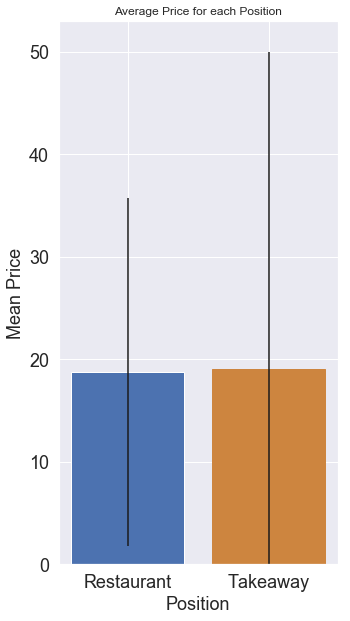

In [386]:
# Grouping by whether of not something is takeaway and plotting the average turnover of a transaction
index = trans.groupby('takeaway').mean().index
mean = trans.groupby('takeaway').mean()['turnover']
std = trans.groupby('takeaway').std()['turnover']

f = plt.figure(figsize=(5,10))
x_pos = [i for i, _ in enumerate(index)]
ax =plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Position", fontsize=18)
plt.ylabel("Mean Price", fontsize=18)
plt.title("Average Price for each Position")
plt.xticks(x_pos, index)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0)
ax[1].set_color('peru')
plt.show()

In [ ]:
index = train_daily.groupby('school_holiday_str').mean().index
mean = train_daily.groupby('school_holiday_str')['turnover'].mean() 
std = train_daily.groupby('school_holiday_str')['turnover'].std()

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Position")
plt.ylabel("Mean Price")
plt.title("Average Price for each Position")
plt.xticks(x_pos, index, horizontalalignment="right")
plt.xticks(rotation=90)
plt.show()

In [323]:
trans.isnull().sum()

d                            0
d_opened                     0
article                   1305
price_item_list_brut         0
count                        0
unit                    595996
turnover                     0
price_pos_list_net           0
comment_raw             595996
article_group0            4220
article_group1          595996
article_group2          595996
transaction_id               0
position_id                  0
position_cid                 0
artCnt                       0
artWeight                    0
min                          0
hour                         0
qhourN                       0
wdayN                        0
date                         0
dQ                           0
shiftedDate                  0
mwst                         0
takeaway                     0
month                        0
dtype: int64

<function matplotlib.pyplot.show>

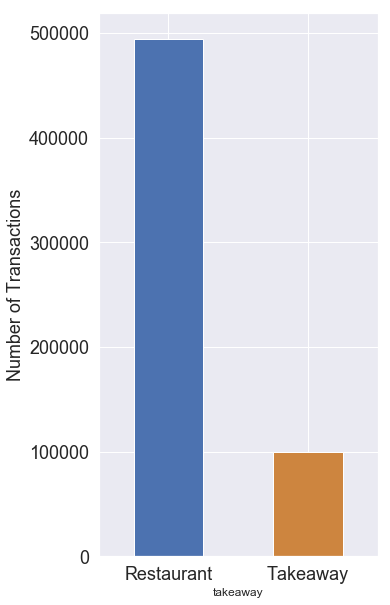

In [390]:
# Grouping by whether or not something is takeaway and plotting the amount of trnasactions
trans.groupby('takeaway').describe()['article']['count'].plot(kind='bar', figsize=(5,10), rot=0, fontsize=18 ,color=['b', 'peru'])
plt.ylabel('Number of Transactions', fontsize=18)
plt.show

<function matplotlib.pyplot.show>

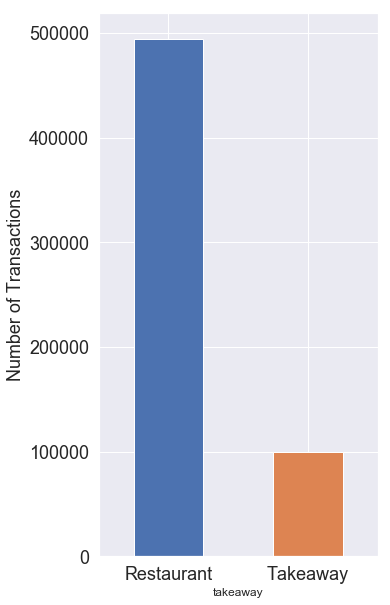

In [389]:
trans.groupby('takeaway').describe()['article']['count'].plot(kind='bar', figsize=(5,10), rot=0, fontsize=18)
plt.ylabel('Number of Transactions', fontsize=18)
plt.show

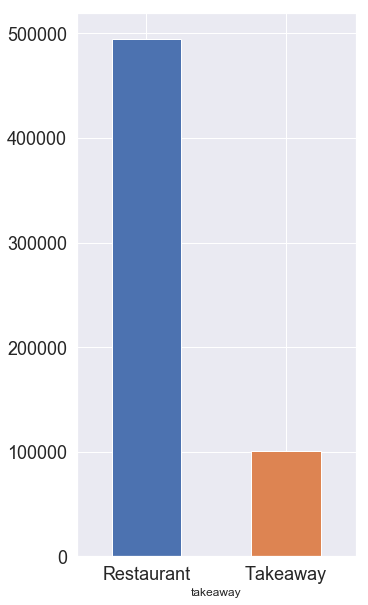

In [317]:
trans.groupby('takeaway').describe()['artCnt']['count'].plot(kind='bar', figsize=(5,10), rot=0, fontsize=18)

In [156]:
trans['date'] = pd.to_datetime(trans['date'])

In [157]:
trans['month'] = trans['date'].dt.month

In [158]:
trans = trans[trans['qhourN']>=10]

In [164]:
# Creating two dataframes based on whether something is a Restaurant or takeaway transaction
tran_res = trans[trans['takeaway']=='Restaurant']
tran_take = trans[trans['takeaway']!='Restaurant']

In [150]:
trans.columns

Index(['d', 'd_opened', 'article', 'price_item_list_brut', 'count', 'unit',
       'turnover', 'price_pos_list_net', 'comment_raw', 'article_group0',
       'article_group1', 'article_group2', 'transaction_id', 'position_id',
       'position_cid', 'artCnt', 'artWeight', 'min', 'hour', 'qhourN', 'wdayN',
       'date', 'dQ', 'shiftedDate', 'mwst', 'takeaway'],
      dtype='object')

In [171]:
trans.head()

d    d_opened  article  price_item_list_brut  count  \
0  2016-01-18 10:31:59  1453113025    231.0                31.250      1   
3  2016-01-18 10:47:34  1453114040    337.0                25.625      1   
4  2016-01-18 10:53:05  1453114372    338.0                27.500      1   
5  2016-01-18 10:54:03  1453114426    275.0                30.000      2   
6  2016-01-18 10:57:25  1453114607    275.0                30.000      1   

   unit  turnover  price_pos_list_net  comment_raw article_group0  ...    min  \
0   NaN    28.125             27.4375          NaN             33  ...      0   
3   NaN    20.625             20.1250          NaN             29  ...      0   
4   NaN    24.375             23.7750          NaN             29  ...      0   
5   NaN    54.000             52.6875          NaN             22  ...      0   
6   NaN    27.000             26.3375          NaN             22  ...      0   

   hour  qhourN  wdayN        date                   dQ  shiftedDate  \
0    11      11      1  2016-01-18  2016-01-18 10:00:00   2016-01-18   
3    11      11      1  2016-01-18  2016-01-18 10:00:00   2016-01-18   
4    11      11      1  2016-01-18  2016-01-18 10:00:00   2016-01-18   
5    11      11      1  2016-01-18  2016-01-18 10:00:00   2016-01-18   
6    11      11      1  2016-01-18  2016-01-18 10:00:00   2016-01-18   

       mwst  takeaway  month  
0  1.025057  Takeaway         
3  1.024845  Takeaway         
4  1.025237  Takeaway         
5  1.024911  Takeaway         
6  1.025154  Takeaway         

[5 rows x 27 columns]

In [224]:
trans[trans['count']>5].head()

d    d_opened  article  price_item_list_brut  count  \
74   2016-01-18 11:37:15  1453117017    103.0                  7.25      8   
145  2016-01-18 12:04:42  1453118675    103.0                  7.25      6   
146  2016-01-18 12:04:58  1453114106    103.0                  7.25      6   
159  2016-01-18 12:06:59  1453113572    103.0                  7.25      6   
160  2016-01-18 12:07:05  1453116171    103.0                  7.25      7   

     unit  turnover  price_pos_list_net  comment_raw article_group0  ...    \
74    NaN     58.00             53.8500          NaN             62  ...     
145   NaN     43.50             40.3875          NaN             62  ...     
146   NaN     43.50             40.3875          NaN             62  ...     
159   NaN     43.50             40.3875          NaN             62  ...     
160   NaN     50.75             47.1250          NaN             62  ...     

     min  hour  qhourN  wdayN       date                   dQ  shiftedDate  \
74     0    12      12      1 2016-01-18  2016-01-18 11:00:00   2016-01-18   
145    0    13      13      1 2016-01-18  2016-01-18 12:00:00   2016-01-18   
146    0    13      13      1 2016-01-18  2016-01-18 12:00:00   2016-01-18   
159    0    13      13      1 2016-01-18  2016-01-18 12:00:00   2016-01-18   
160    0    13      13      1 2016-01-18  2016-01-18 12:00:00   2016-01-18   

         mwst    takeaway  month  
74   1.077066  Restaurant      1  
145  1.077066  Restaurant      1  
146  1.077066  Restaurant      1  
159  1.077066  Restaurant      1  
160  1.076923  Restaurant      1  

[5 rows x 27 columns]

In [305]:
tran_res.groupby('qhourN').describe()

artCnt                                    artWeight           ...   \
          count mean  std  min  25%  50%  75%  max     count      mean ...    
qhourN                                                                 ...    
10         31.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      31.0  1.548387 ...    
11       1666.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0    1666.0  1.369748 ...    
12      82776.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   82776.0  1.358111 ...    
13      98983.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   98983.0  1.326905 ...    
14      21348.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   21348.0  1.301902 ...    
15       8037.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0    8037.0  1.254324 ...    
16       6938.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0    6938.0  1.250072 ...    
17       8886.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0    8886.0  1.298785 ...    
18      18220.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   18220.0  1.376674 ...    
19      45993.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   45993.0  1.374340 ...    
20      74597.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   74597.0  1.368527 ...    
21      82610.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   82610.0  1.367922 ...    
22      44368.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   44368.0  1.377817 ...    
23        611.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     611.0  1.450082 ...    

       unit        wdayN                                               
        75% max    count      mean       std  min  25%  50%  75%  max  
qhourN                                                                 
10      NaN NaN     31.0  2.677419  1.326326  1.0  2.0  3.0  3.0  6.0  
11      NaN NaN   1666.0  3.169268  1.521076  1.0  2.0  3.0  4.0  6.0  
12      NaN NaN  82776.0  3.015971  1.477829  1.0  2.0  3.0  4.0  7.0  
13      NaN NaN  98983.0  3.243840  1.496923  1.0  2.0  3.0  4.0  7.0  
14      NaN NaN  21348.0  4.030495  1.739232  1.0  3.0  4.0  6.0  7.0  
15      NaN NaN   8037.0  4.578076  1.778706  1.0  3.0  6.0  6.0  7.0  
16      NaN NaN   6938.0  4.599741  1.831896  1.0  3.0  5.0  6.0  7.0  
17      NaN NaN   8886.0  4.733288  1.980146  1.0  3.0  5.0  6.0  7.0  
18      NaN NaN  18220.0  4.441164  2.049927  1.0  3.0  5.0  6.0  7.0  
19      NaN NaN  45993.0  4.263649  2.003004  1.0  3.0  5.0  6.0  7.0  
20      NaN NaN  74597.0  4.209781  1.922824  1.0  3.0  4.0  6.0  7.0  
21      NaN NaN  82610.0  4.083791  1.837732  1.0  3.0  4.0  6.0  7.0  
22      NaN NaN  44368.0  4.274274  1.600759  1.0  3.0  5.0  6.0  7.0  
23      NaN NaN    611.0  5.333879  0.557936  3.0  5.0  5.0  6.0  6.0  

[14 rows x 160 columns]

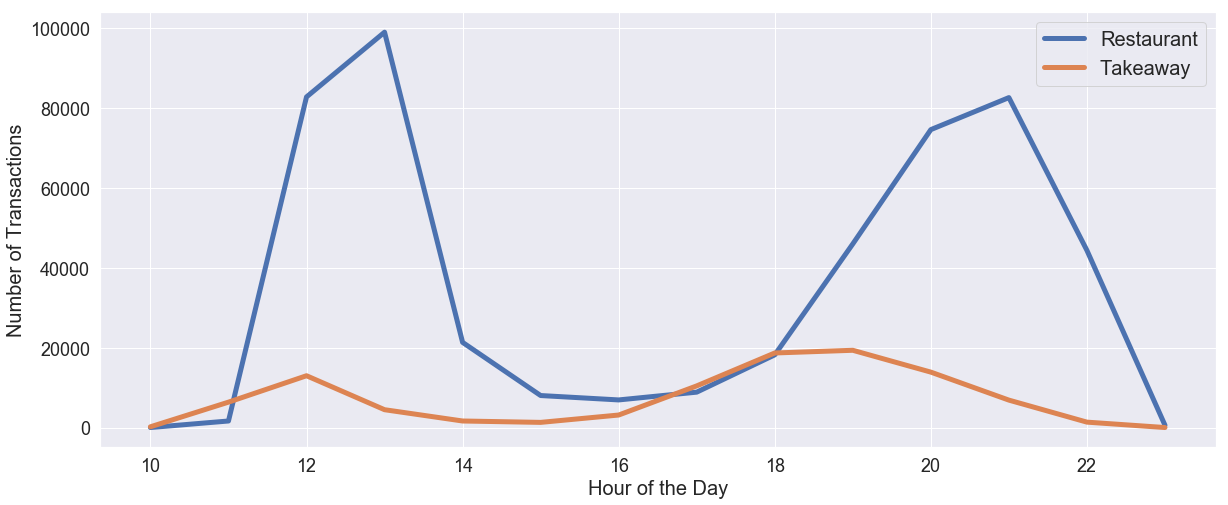

In [182]:
# Plotting the total number or Restaurant and takeaway transactions by hour of the day
plt.figure(figsize=(20,8))
tran_res.groupby('qhourN').count()['takeaway'].plot(linewidth=5)
tran_take.groupby('qhourN').count()['takeaway'].plot(linewidth=5)
plt.legend(('Restaurant', 'Takeaway'), fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Hour of the Day', fontsize=20)
plt.ylabel('Number of Transactions', fontsize=20)
plt.show()

In [51]:
def plot_over_time(df, column, x_label, y_label):
    grouped_df = df.groupby(column)
    y = grouped_df['turnover'].mean().values
    x = range(len(y))
    error = grouped_df['turnover'].std().values
    plt.figure(figsize=(20,10))
    plt.plot(x, y, 'k-')
    plt.fill_between(x, y-error, y+error, alpha=0.4)
    plt.xticks(np.arange(len(y)), grouped_df['turnover'].mean().index)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()

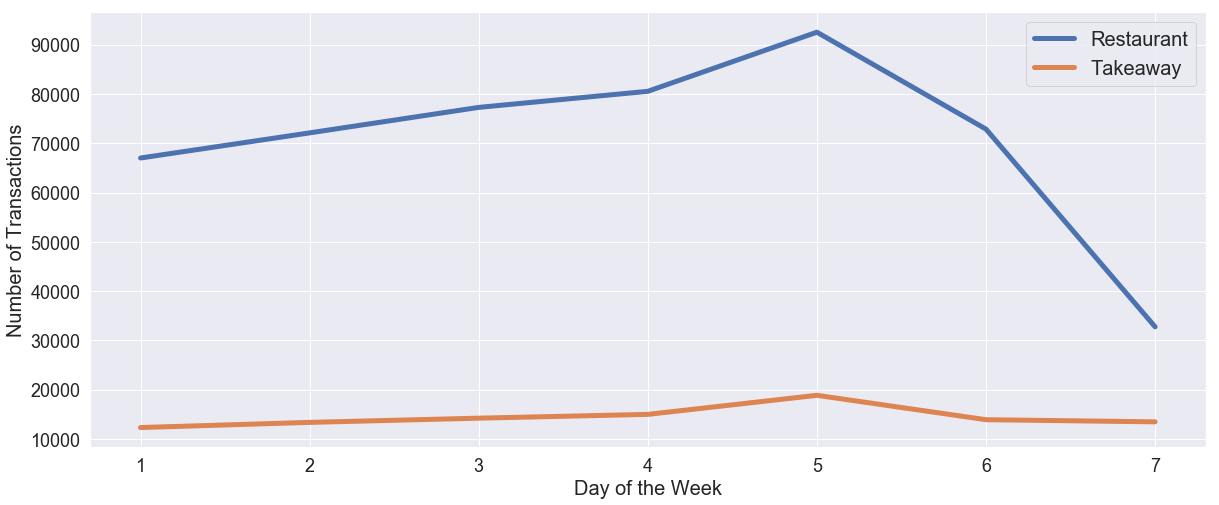

In [177]:
# Plotting the total number or Restaurant and takeaway transactions by day of the week
plt.figure(figsize=(20,8))
tran_res.groupby('wdayN').count()['takeaway'].plot(linewidth=5)
tran_take.groupby('wdayN').count()['takeaway'].plot(linewidth=5)
plt.legend(('Restaurant', 'Takeaway'), fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Day of the Week', fontsize=20)
plt.ylabel('Number of Transactions', fontsize=20)
plt.show()

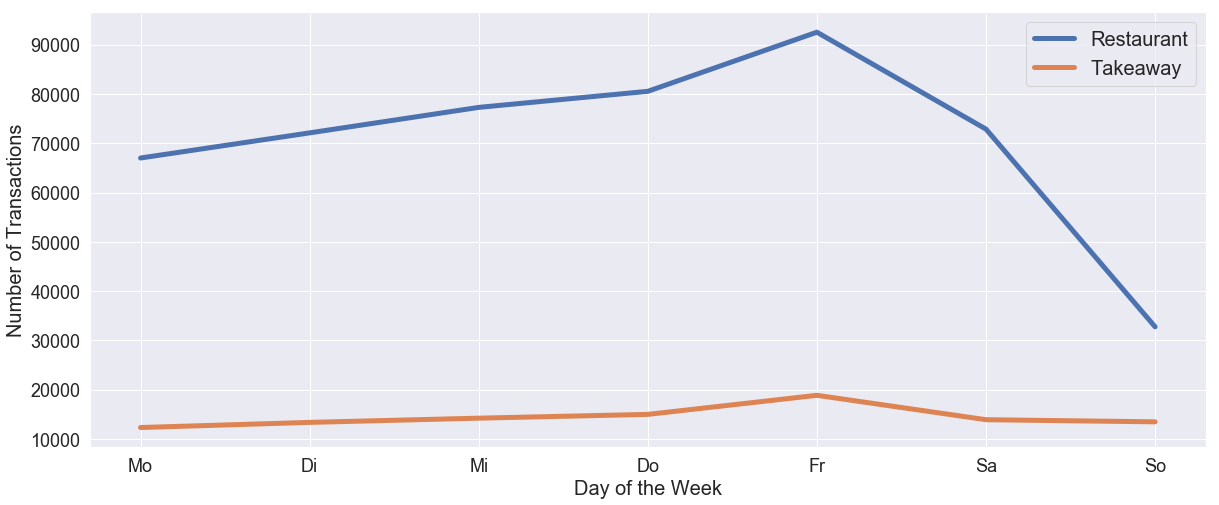

In [194]:
plt.figure(figsize=(20,8))
tran_res.groupby('wdayN').count()['takeaway'].plot(linewidth=5)
tran_take.groupby('wdayN').count()['takeaway'].plot(linewidth=5)
plt.legend(('Restaurant', 'Takeaway'), fontsize=20)
plt.xticks(np.arange(1,8),('Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'), fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Day of the Week', fontsize=20)
plt.ylabel('Number of Transactions', fontsize=20)
plt.show()

In [224]:
tran_take.groupby('wdayN').std()

d_opened     article  price_item_list_brut     count  unit  \
wdayN                                                                   
1      2.841046e+07  197.760274             13.750535  0.549129   NaN   
2      2.847941e+07  197.455804             15.188911  0.684290   NaN   
3      2.836880e+07  198.071213             14.733952  0.666284   NaN   
4      2.863402e+07  197.929234             15.925421  0.631995   NaN   
5      2.888008e+07  202.300051             15.870749  0.623167   NaN   
6      2.903970e+07  209.355707             17.934458  0.781537   NaN   
7      2.891386e+07  207.148132             16.112960  0.576891   NaN   

        turnover  price_pos_list_net  comment_raw  article_group1  \
wdayN                                                               
1      15.135589           14.785427          NaN             NaN   
2      17.212926           16.818088          NaN             NaN   
3      16.635873           16.246709          NaN             NaN   
4      27.631262           27.114517          NaN             NaN   
5      18.246781           17.865277          NaN             NaN   
6      59.514975           59.397760          NaN             NaN   
7      37.137212           36.953044          NaN             NaN   

       article_group2  transaction_id    position_id  position_cid  artCnt  \
wdayN                                                                        
1                 NaN   127996.300571  362636.915920  2.841070e+07     0.0   
2                 NaN   136149.504161  375153.405563  2.847968e+07     0.0   
3                 NaN   160374.949076  406574.887333  2.836950e+07     0.0   
4                 NaN   165180.065132  412645.196134  2.863432e+07     0.0   
5                 NaN   177117.855701  434600.642802  2.888103e+07     0.0   
6                 NaN   177346.608733  436838.285741  2.904008e+07     0.0   
7                 NaN   144889.438854  388954.857718  2.891454e+07     0.0   

       artWeight  min      hour    qhourN     month      mwst  
wdayN                                                          
1       0.549129  0.0  3.367998  3.367998  3.260741  0.004326  
2       0.684290  0.0  3.466698  3.466698  3.277570  0.004455  
3       0.666284  0.0  3.463922  3.463922  3.383279  0.004428  
4       0.631995  0.0  3.418557  3.418557  3.338886  0.004651  
5       0.623167  0.0  3.319831  3.319831  3.396476  0.004489  
6       0.781537  0.0  2.586186  2.586186  3.443115  0.005025  
7       0.576891  0.0  1.467012  1.467012  3.305849  0.003536

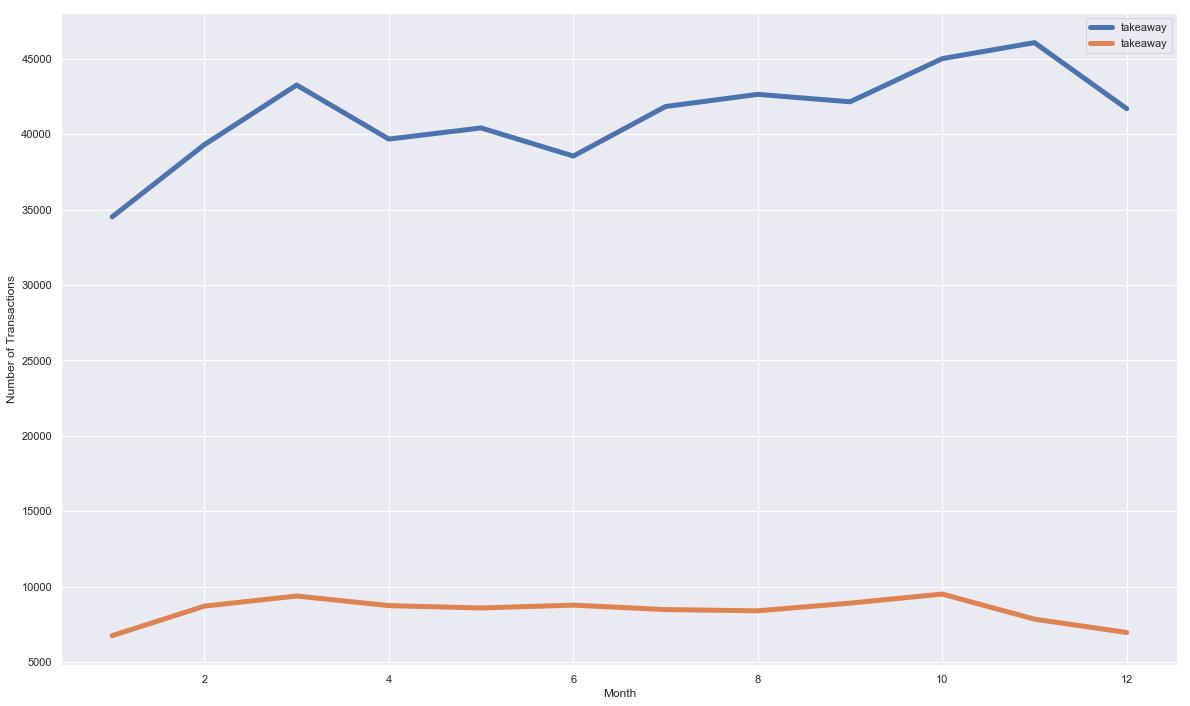

In [53]:
plt.figure(figsize=(20,12))
tran_res.groupby('month').count()['takeaway'].plot(linewidth=5)
tran_take.groupby('month').count()['takeaway'].plot(linewidth=5)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

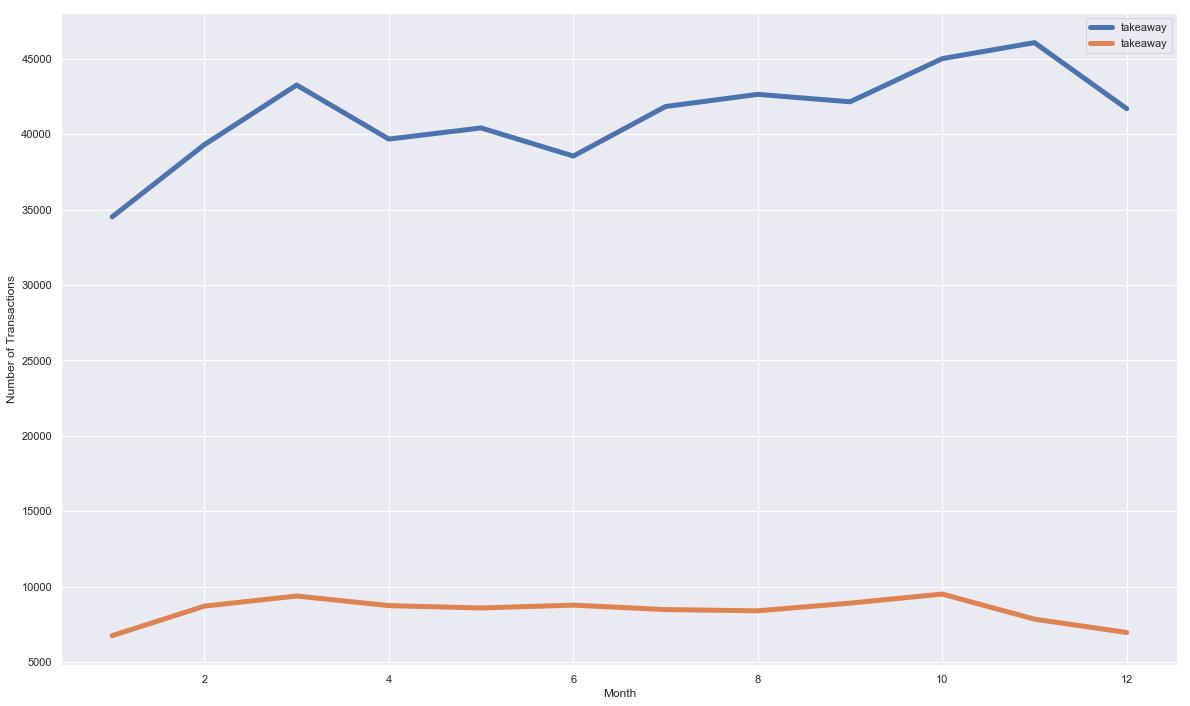

In [54]:
plt.figure(figsize=(20,12))
tran_res.groupby('month').count()['takeaway'].plot(linewidth=5)
tran_take.groupby('month').count()['takeaway'].plot(linewidth=5)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

In [219]:
trans[trans['wdayN']==7].describe()

d_opened       article  price_item_list_brut         count  unit  \
count  4.617900e+04  46047.000000          46179.000000  46179.000000   0.0   
mean   1.500622e+09    296.596782             15.570584      1.267806   NaN   
std    2.773122e+07    197.705938             14.450264      0.730931   NaN   
min    1.453647e+09      1.000000              0.000000      1.000000   NaN   
25%    1.476030e+09    130.000000              6.250000      1.000000   NaN   
50%    1.501437e+09    250.000000             11.000000      1.000000   NaN   
75%    1.525018e+09    464.000000             22.500000      1.000000   NaN   
max    1.545594e+09    671.000000            343.750000     16.000000   NaN   

           turnover  price_pos_list_net  comment_raw  article_group1  \
count  46179.000000        46179.000000          0.0             0.0   
mean      18.210567           17.165091          NaN             NaN   
std       24.058919           23.465429          NaN             NaN   
min        0.012500            0.012500          NaN             NaN   
25%        7.500000            6.962500          NaN             NaN   
50%       13.125000           12.187500          NaN             NaN   
75%       27.500000           26.112500          NaN             NaN   
max     3838.750000         3838.750000          NaN             NaN   

       article_group2      ...        position_id  position_cid   artCnt  \
count             0.0      ...       4.617900e+04  4.617900e+04  46179.0   
mean              NaN      ...       6.834008e+07  1.500626e+09      1.0   
std               NaN      ...       4.253664e+05  2.773160e+07      0.0   
min               NaN      ...       6.778318e+07  1.453647e+09      1.0   
25%               NaN      ...       6.802762e+07  1.476032e+09      1.0   
50%               NaN      ...       6.829396e+07  1.501442e+09      1.0   
75%               NaN      ...       6.855279e+07  1.525020e+09      1.0   
max               NaN      ...       7.015268e+07  1.545597e+09      1.0   

          artWeight      min          hour        qhourN    wdayN  \
count  46179.000000  46179.0  46179.000000  46179.000000  46179.0   
mean       1.267806      0.0     19.130081     19.130081      7.0   
std        0.730931      0.0      1.552003      1.552003      0.0   
min        1.000000      0.0     11.000000     11.000000      7.0   
25%        1.000000      0.0     18.000000     18.000000      7.0   
50%        1.000000      0.0     19.000000     19.000000      7.0   
75%        1.000000      0.0     20.000000     20.000000      7.0   
max       16.000000      0.0     23.000000     23.000000      7.0   

               mwst         month  
count  46179.000000  46179.000000  
mean       1.061728      6.642868  
std        0.023885      3.447063  
min        1.000000      1.000000  
25%        1.025641      4.000000  
50%        1.076866      7.000000  
75%        1.077098     10.000000  
max        1.079137     12.000000  

[8 rows x 21 columns]

In [ ]:
# Anzahl Transaktionen vs Umsatz

In [198]:
# Subseting the Dataframes into five parts by how expensive the item is
tran_very_cheap = trans[trans['price_item_list_brut']<= trans['price_item_list_brut'].quantile(0.2)]
tran_cheap = trans[(trans['price_item_list_brut']<= trans['price_item_list_brut'].quantile(0.4)) & 
                   (trans['price_item_list_brut']>= trans['price_item_list_brut'].quantile(0.2))]
tran_med = trans[(trans['price_item_list_brut']<= trans['price_item_list_brut'].quantile(0.6)) & 
                 (trans['price_item_list_brut']>= trans['price_item_list_brut'].quantile(0.4))]
tran_exp = trans[(trans['price_item_list_brut']<= trans['price_item_list_brut'].quantile(0.8)) & 
                 (trans['price_item_list_brut']>= trans['price_item_list_brut'].quantile(0.6))]
tran_very_exp = trans[trans['price_item_list_brut']>= trans['price_item_list_brut'].quantile(0.8)]


In [201]:
tran_very_exp['price_item_list_brut'].describe()

count    128382.000000
mean         34.137635
std          16.267980
min          27.500000
25%          29.375000
50%          30.000000
75%          33.125000
max         343.750000
Name: price_item_list_brut, dtype: float64

In [202]:
tran_very_cheap['price_item_list_brut'].describe()

count    124167.000000
mean          4.702176
std           1.442076
min           0.000000
25%           4.750000
50%           5.000000
75%           5.625000
max           6.000000
Name: price_item_list_brut, dtype: float64

In [203]:
tran_med['price_item_list_brut'].describe()

count    157376.000000
mean          9.761839
std           1.718813
min           7.875000
25%           8.125000
50%           9.375000
75%          11.250000
max          13.125000
Name: price_item_list_brut, dtype: float64

In [234]:
tran_very_cheap.groupby('wdayN').count()

d  d_opened  article  price_item_list_brut  count  unit  turnover  \
wdayN                                                                          
1      16641     16641    16595                 16641  16641     0     16641   
2      17380     17380    17339                 17380  17380     0     17380   
3      18862     18862    18828                 18862  18862     0     18862   
4      19280     19280    19226                 19280  19280     0     19280   
5      22038     22038    21966                 22038  22038     0     22038   
6      16312     16312    16257                 16312  16312     0     16312   
7       8998      8998     8951                  8998   8998     0      8998   

       price_pos_list_net  comment_raw  article_group0  ...    artWeight  \
wdayN                                                   ...                
1                   16641            0           16612  ...        16641   
2                   17380            0           17362  ...        17380   
3                   18862            0           18836  ...        18862   
4                   19280            0           19264  ...        19280   
5                   22038            0           22025  ...        22038   
6                   16312            0           16310  ...        16312   
7                    8998            0            8996  ...         8998   

         min   hour  qhourN   date     dQ  shiftedDate   mwst  takeaway  month  
wdayN                                                                           
1      16641  16641   16641  16641  16641        16641  16641     16641  16641  
2      17380  17380   17380  17380  17380        17380  17380     17380  17380  
3      18862  18862   18862  18862  18862        18862  18862     18862  18862  
4      19280  19280   19280  19280  19280        19280  19280     19280  19280  
5      22038  22038   22038  22038  22038        22038  22038     22038  22038  
6      16312  16312   16312  16312  16312        16312  16312     16312  16312  
7       8998   8998    8998   8998   8998         8998   8998      8998   8998  

[7 rows x 26 columns]

In [241]:
trans.groupby('wdayN')['turnover'].sum()

wdayN
1    1.589507e+06
2    1.603694e+06
3    1.705589e+06
4    1.798227e+06
5    2.064640e+06
6    1.604990e+06
7    8.409458e+05
Name: turnover, dtype: float64

In [243]:
df.head()

date   time  Humidity_hr  local_precipitation  snow_fraction_hr  \
0 2016-01-18  11:00           63                  0.0                 0   
1 2016-01-18  12:00           57                  0.0                 0   
2 2016-01-18  13:00           49                  0.0                 0   
3 2016-01-18  14:00           46                  0.0                 0   
4 2016-01-18  16:00           44                  0.0                 0   

   sun_hr  tmp_hr  wind_speed_hr  turnover_hr holidays_str    ...      \
0      43   -3.84           3.61     209.0000        False    ...       
1      33   -2.35           2.75    2727.0625        False    ...       
2      57   -0.85           2.22    2028.5000        False    ...       
3      54   -0.41           1.22     228.7500        False    ...       
4       0   -0.21           2.01      21.2500        False    ...       

  Holiday_neg_1 Humidity_daily  local_precipitation_daily  \
0         False          69.25                        0.0   
1         False          69.25                        0.0   
2         False          69.25                        0.0   
3         False          69.25                        0.0   
4         False          69.25                        0.0   

   snow_fraction_daily  sun_daily  tmp_daily  wind_speed_daily  \
0                    0        377     -3.165          1.961667   
1                    0        377     -3.165          1.961667   
2                    0        377     -3.165          1.961667   
3                    0        377     -3.165          1.961667   
4                    0        377     -3.165          1.961667   

   turnover_daily  delta  month_str  
0         8743.25      0        Jan  
1         8743.25      0        Jan  
2         8743.25      0        Jan  
3         8743.25      0        Jan  
4         8743.25      0        Jan  

[5 rows x 33 columns]

In [249]:
train_daily.groupby('wdayN')['turnover'].sum()

wdayN
1    1.588637e+06
2    1.602371e+06
3    1.704436e+06
4    1.792201e+06
5    2.054589e+06
6    1.574626e+06
7    8.197986e+05
Name: turnover, dtype: float64

In [245]:
df.columns

Index(['date', 'time', 'Humidity_hr', 'local_precipitation',
       'snow_fraction_hr', 'sun_hr', 'tmp_hr', 'wind_speed_hr', 'turnover_hr',
       'holidays_str', 'school_holiday_str', 'wday', 'wdayN', 'month',
       'day_of_year', 'Calender_week', 'year', 'weekN', 'hlL', 'Day_of_Month',
       'Holiday', 'Number_of_half_days_of_holidays', 'Holiday_pls_1',
       'Holiday_neg_1', 'Humidity_daily', 'local_precipitation_daily',
       'snow_fraction_daily', 'sun_daily', 'tmp_daily', 'wind_speed_daily',
       'turnover_daily', 'delta', 'month_str'],
      dtype='object')

In [247]:
train_daily['turnover'].head()

0     8743.2500
1    10609.8125
2    10023.0625
3     9635.2500
4    13982.9375
Name: turnover, dtype: float64

In [242]:
trans.groupby('date')['turnover'].sum()

date
2016-01-18     8743.2500
2016-01-19    10609.8125
2016-01-20    10037.4375
2016-01-21     9635.2500
2016-01-22    13982.9375
2016-01-23     9909.5625
2016-01-24     6355.0000
2016-01-25    11296.5625
2016-01-26    10844.9375
2016-01-27    12337.7500
2016-01-28    11134.3750
2016-01-29    14231.0000
2016-01-30    11362.3750
2016-01-31     6207.6875
2016-02-01     9720.2500
2016-02-02     9382.3125
2016-02-03    11734.6875
2016-02-04     9368.0000
2016-02-05    13375.8750
2016-02-06     9726.5000
2016-02-07     5342.4375
2016-02-08     9783.4375
2016-02-09    11837.7500
2016-02-10    11352.9375
2016-02-11     9530.0625
2016-02-12    10584.0000
2016-02-13    11244.2500
2016-02-14     9884.7500
2016-02-15    11378.2500
2016-02-16     7681.4375
                 ...    
2018-11-28    11447.0625
2018-11-29    13814.1250
2018-11-30    17080.9375
2018-12-01    13119.4375
2018-12-02     6912.6875
2018-12-03    11215.6250
2018-12-04    11219.6875
2018-12-05    12708.3750
2018-12-06    12723.

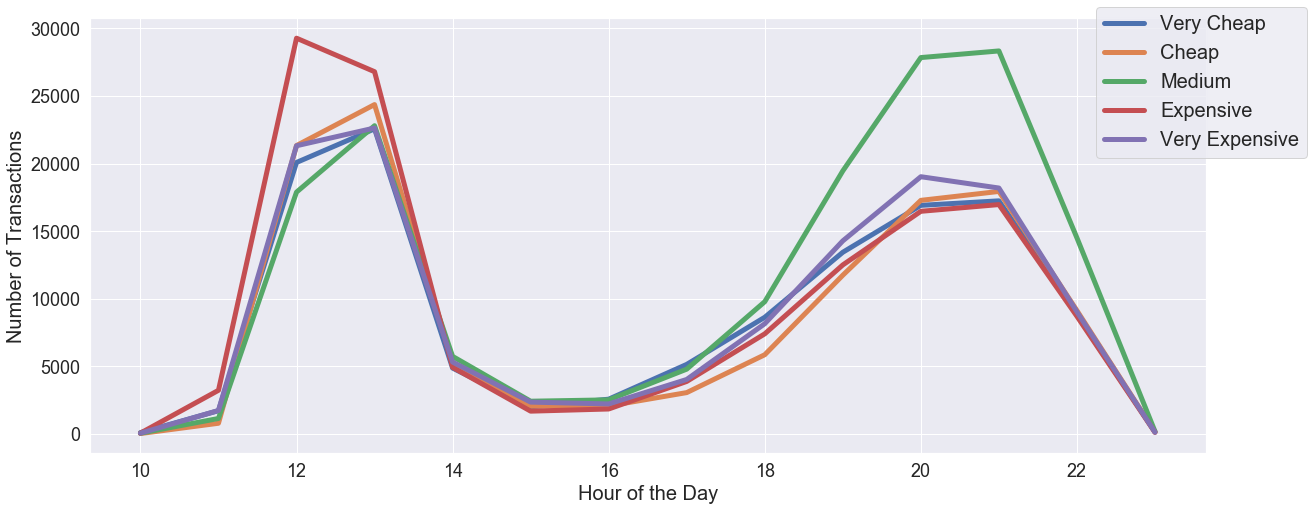

In [215]:
# Plotting the amount of transactions over the hours by how expensive the item is
plt.figure(figsize=(20, 8))
tran_very_cheap.groupby('qhourN').count()['takeaway'].plot(linewidth=5)
tran_cheap.groupby('qhourN').count()['takeaway'].plot(linewidth=5)
tran_med.groupby('qhourN').count()['takeaway'].plot(linewidth=5)
tran_exp.groupby('qhourN').count()['takeaway'].plot(linewidth=5)
tran_very_exp.groupby('qhourN').count()['takeaway'].plot(linewidth=5)
plt.legend(('Very Cheap', 'Cheap', 'Medium', 'Expensive', 'Very Expensive'), fontsize=20, bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Hour of the Day', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Number of Transactions', fontsize=20)
plt.show()

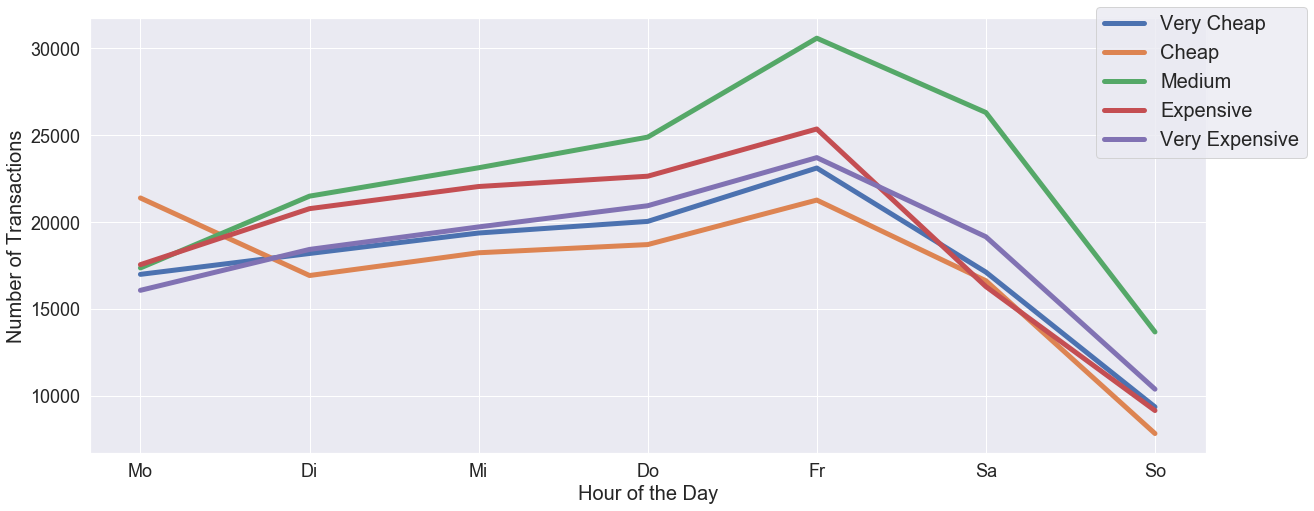

In [218]:
# Plotting the amount of transactions over the day of the week by how expensive the item is
plt.figure(figsize=(20,8))
tran_very_cheap.groupby('wdayN').count()['takeaway'].plot(linewidth=5)
tran_cheap.groupby('wdayN').count()['takeaway'].plot(linewidth=5)
tran_med.groupby('wdayN').count()['takeaway'].plot(linewidth=5)
tran_exp.groupby('wdayN').count()['takeaway'].plot(linewidth=5)
tran_very_exp.groupby('wdayN').count()['takeaway'].plot(linewidth=5)
plt.legend(('Very Cheap', 'Cheap', 'Medium', 'Expensive', 'Very Expensive'), fontsize=20, bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Hour of the Day', fontsize=20)
plt.xticks(np.arange(1,8),('Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'), fontsize=18)

plt.yticks(fontsize=18)
plt.ylabel('Number of Transactions', fontsize=20)
plt.show()

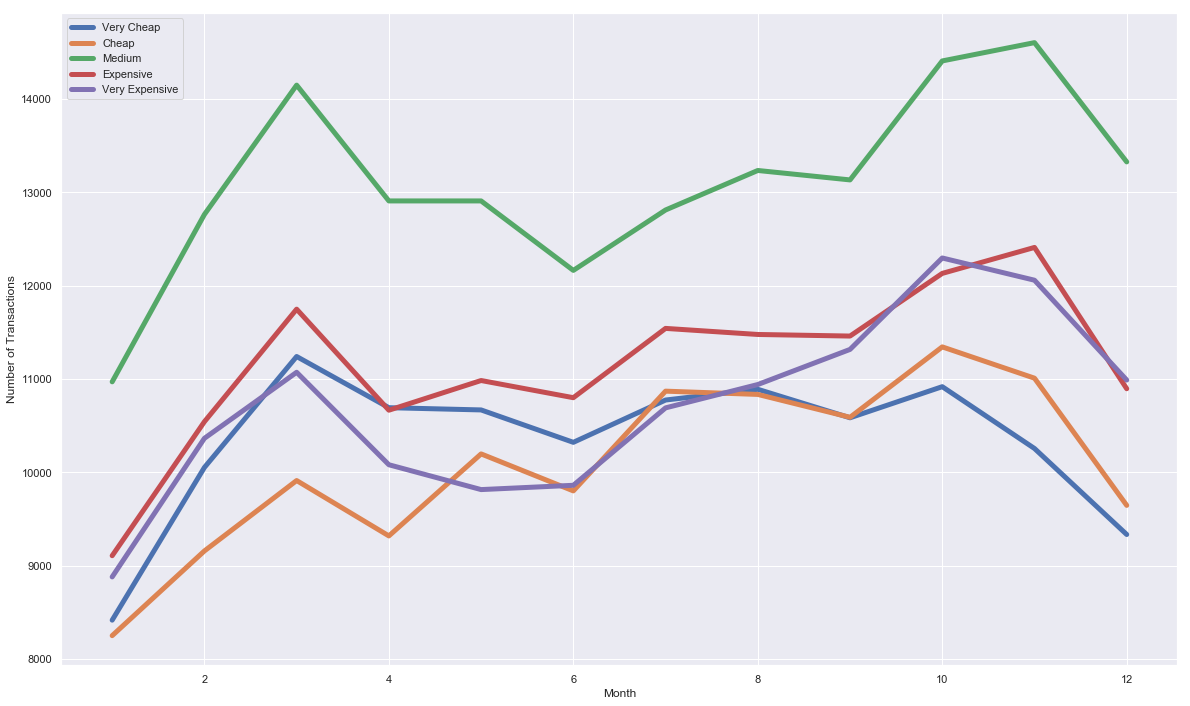

In [219]:
plt.figure(figsize=(20, 12))
tran_very_cheap.groupby('month').count()['takeaway'].plot(linewidth=5)
tran_cheap.groupby('month').count()['takeaway'].plot(linewidth=5)
tran_med.groupby('month').count()['takeaway'].plot(linewidth=5)
tran_exp.groupby('month').count()['takeaway'].plot(linewidth=5)
tran_very_exp.groupby('month').count()['takeaway'].plot(linewidth=5)
plt.legend(('Very Cheap', 'Cheap', 'Medium', 'Expensive', 'Very Expensive'))
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

## Frequencies

In [848]:
train_daily.groupby('school_holiday_str').mean().index

Index(['Ascension Day', 'Autumn holidays', 'Christmas holidays',
       'Continuing education for teachers', 'Easter holidays',
       'Knabenschiessen', 'Labour Day', 'No', 'Sechseläuten', 'Sport holiday',
       'Spring time holidays', 'Summer holidays', 'Whit Monday'],
      dtype='object', name='school_holiday_str')

***

In [59]:
index = pos_price.index
mean = pos_price['mean'] 
std = pos_price['std']

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Position")
plt.ylabel("Mean Price")
plt.title("Average Price for each Position")
plt.xticks(x_pos, index, horizontalalignment="right")
plt.ylim(0,)
plt.show()

NameError: name 'pos_price' is not defined

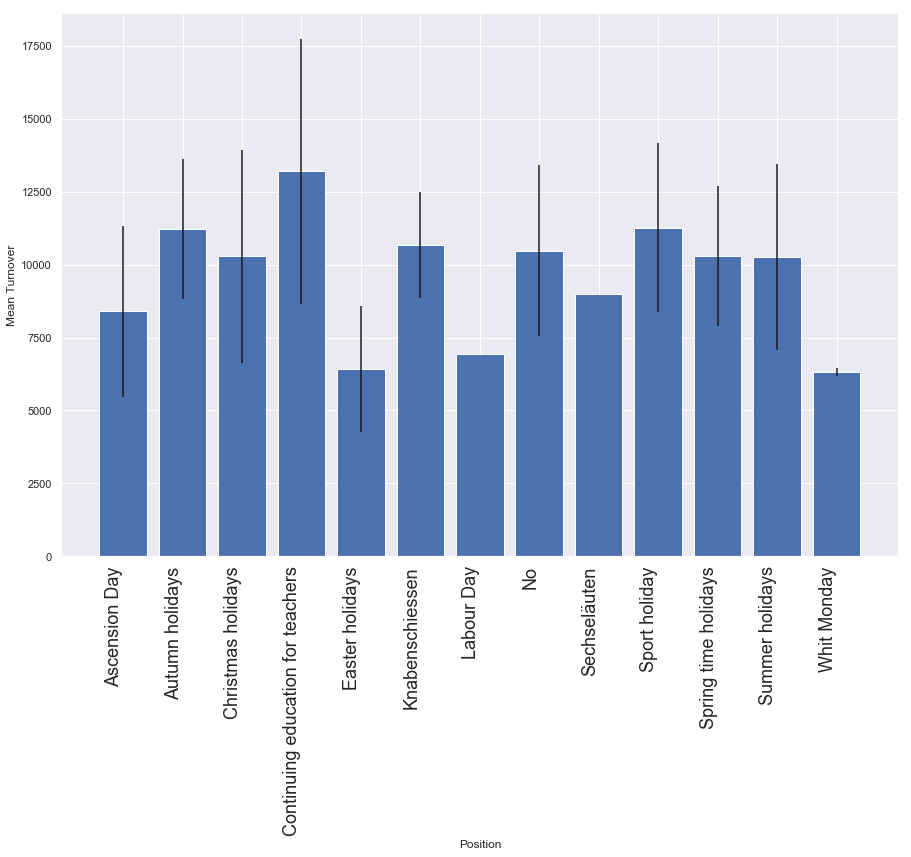

In [221]:
index = train_daily.groupby('school_holiday_str').mean().index
mean = train_daily.groupby('school_holiday_str')['turnover'].mean() 
std = train_daily.groupby('school_holiday_str')['turnover'].std()
plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Position")
plt.ylabel("Mean Turnover")
plt.xticks(x_pos, index, horizontalalignment="right")
plt.xticks(rotation=90, fontsize=18)
plt.show()


In [230]:
train_daily.columns

Index(['date', 'holidays_str', 'school_holiday_str', 'wday', 'wdayN', 'month',
       'day_of_year', 'Calender_week', 'year', 'weekN', 'hlL', 'Day_of_Month',
       'Holiday', 'Number_of_half_days_of_holidays', 'Holiday_pls_1',
       'Holiday_neg_1', 'hr', 'ppt', 'sf', 'sun', 'tmp', 'ws', 'turnover',
       'delta', 'month_str', 'before_payday', 'tmp_delta'],
      dtype='object')

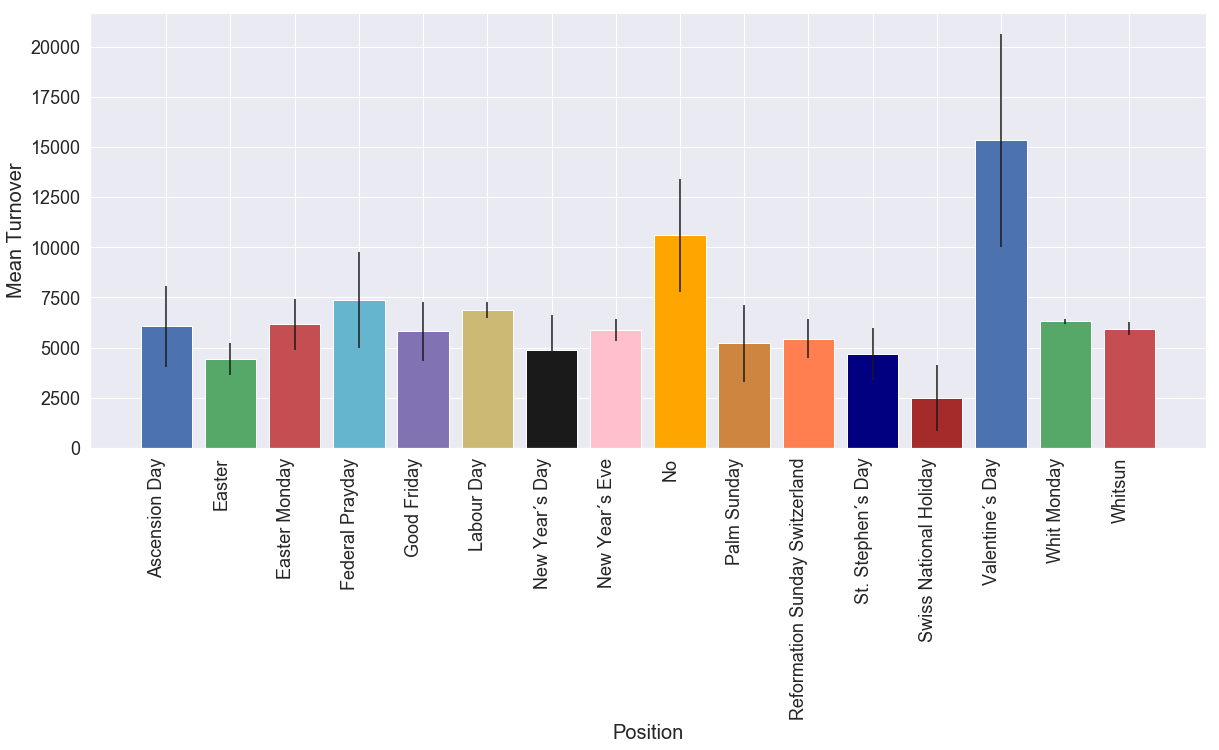

In [251]:
# Grouping the Dataframe by the individual holiday and plotting the mean turnover with std
index = train_daily.groupby('holidays_str').mean().index
mean = train_daily.groupby('holidays_str')['turnover'].mean() 
std = train_daily.groupby('holidays_str')['turnover'].std()
plt.figure(figsize=(20,8))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std, color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink', 'orange', 'peru', 'coral', 'navy', 'brown'])
plt.xlabel("Position", fontsize=20)
plt.ylabel("Mean Turnover", fontsize=20)
plt.xticks(x_pos, index, horizontalalignment="right")
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [269]:
train_daily.columns

Index(['date', 'holidays_str', 'school_holiday_str', 'wday', 'wdayN', 'month',
       'day_of_year', 'Calender_week', 'year', 'weekN', 'hlL', 'Day_of_Month',
       'Holiday', 'Number_of_half_days_of_holidays', 'Holiday_pls_1',
       'Holiday_neg_1', 'hr', 'ppt', 'sf', 'sun', 'tmp', 'ws', 'turnover',
       'delta', 'month_str', 'before_payday', 'tmp_delta', 'is_holiday'],
      dtype='object')

In [270]:
train_daily.groupby('holidays_str')['wdayN'].describe()

count      mean       std  min   25%  50%  \
holidays_str                                                                 
Ascension Day                      3.0  4.000000  0.000000  4.0  4.00  4.0   
Easter                             3.0  7.000000  0.000000  7.0  7.00  7.0   
Easter Monday                      3.0  1.000000  0.000000  1.0  1.00  1.0   
Federal Prayday                    3.0  7.000000  0.000000  7.0  7.00  7.0   
Good Friday                        3.0  5.000000  0.000000  5.0  5.00  5.0   
Labour Day                         3.0  3.333333  3.214550  1.0  1.50  2.0   
New Year´s Day                     2.0  4.000000  4.242641  1.0  2.50  4.0   
New Year´s Eve                     2.0  6.500000  0.707107  6.0  6.25  6.5   
No                              1027.0  3.973710  1.965167  1.0  2.00  4.0   
Palm Sunday                        3.0  7.000000  0.000000  7.0  7.00  7.0   
Reformation Sunday Switzerland     3.0  7.000000  0.000000  7.0  7.00  7.0   
St. Stephen´s Day                  2.0  2.000000  1.414214  1.0  1.50  2.0   
Swiss National Holiday             3.0  2.000000  1.000000  1.0  1.50  2.0   
Valentine´s Day                    3.0  4.000000  2.645751  2.0  2.50  3.0   
Whit Monday                        3.0  1.000000  0.000000  1.0  1.00  1.0   
Whitsun                            3.0  7.000000  0.000000  7.0  7.00  7.0   

                                 75%  max  
holidays_str                               
Ascension Day                   4.00  4.0  
Easter                          7.00  7.0  
Easter Monday                   1.00  1.0  
Federal Prayday                 7.00  7.0  
Good Friday                     5.00  5.0  
Labour Day                      4.50  7.0  
New Year´s Day                  5.50  7.0  
New Year´s Eve                  6.75  7.0  
No                              6.00  7.0  
Palm Sunday                     7.00  7.0  
Reformation Sunday Switzerland  7.00  7.0  
St. Stephen´s Day               2.50  3.0  
Swiss National Holiday          2.50  3.0  
Valentine´s Day                 5.00  7.0  
Whit Monday                     1.00  1.0  
Whitsun                         7.00  7.0

In [271]:
train_daily[train_daily['holidays_str']=='Valentine´s Day'].head()

date     holidays_str school_holiday_str wday  wdayN  month  \
27  2016-02-14  Valentine´s Day                 No   So      7      2   
391 2017-02-14  Valentine´s Day      Sport holiday   Di      2      2   
753 2018-02-14  Valentine´s Day      Sport holiday   Mi      3      2   

     day_of_year  Calender_week  year  weekN     ...      sf  sun       tmp  \
27            45              6  2016      4     ...       0    0  4.502917   
391           45              7  2017     57     ...       0  463  4.816250   
753           45              7  2018    109     ...       0  510 -0.366667   

           ws    turnover  delta  month_str  before_payday  tmp_delta  \
27   5.708750   9715.6875     27        Feb              0  -0.349167   
391  0.923750  16024.0000    393        Feb              0   1.537917   
753  1.267917  20279.0000    758        Feb              0   0.539167   

     is_holiday  
27          Yes  
391         Yes  
753         Yes  

[3 rows x 28 columns]

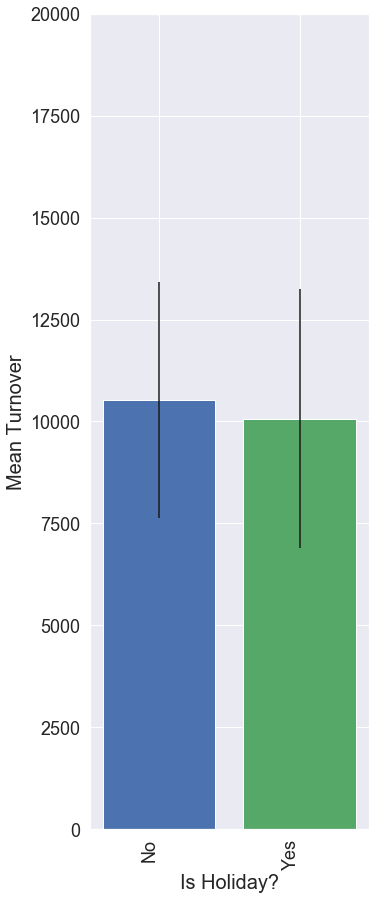

In [266]:
# Grouping the Dataframe by the binary columns 'is_holiday' and plotting the mean turnover with std
index = train_daily.groupby('is_holiday').mean().index
mean = train_daily.groupby('is_holiday')['turnover'].mean() 
std = train_daily.groupby('is_holiday')['turnover'].std()
plt.figure(figsize=(5,15))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,7)
plt.bar(x_pos, mean, yerr=std, color=['b', 'g'])
plt.xlabel("Is Holiday?", fontsize=20)
plt.ylabel("Mean Turnover", fontsize=20)
plt.xticks(x_pos, index, horizontalalignment="right")
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0,20000)
plt.show()

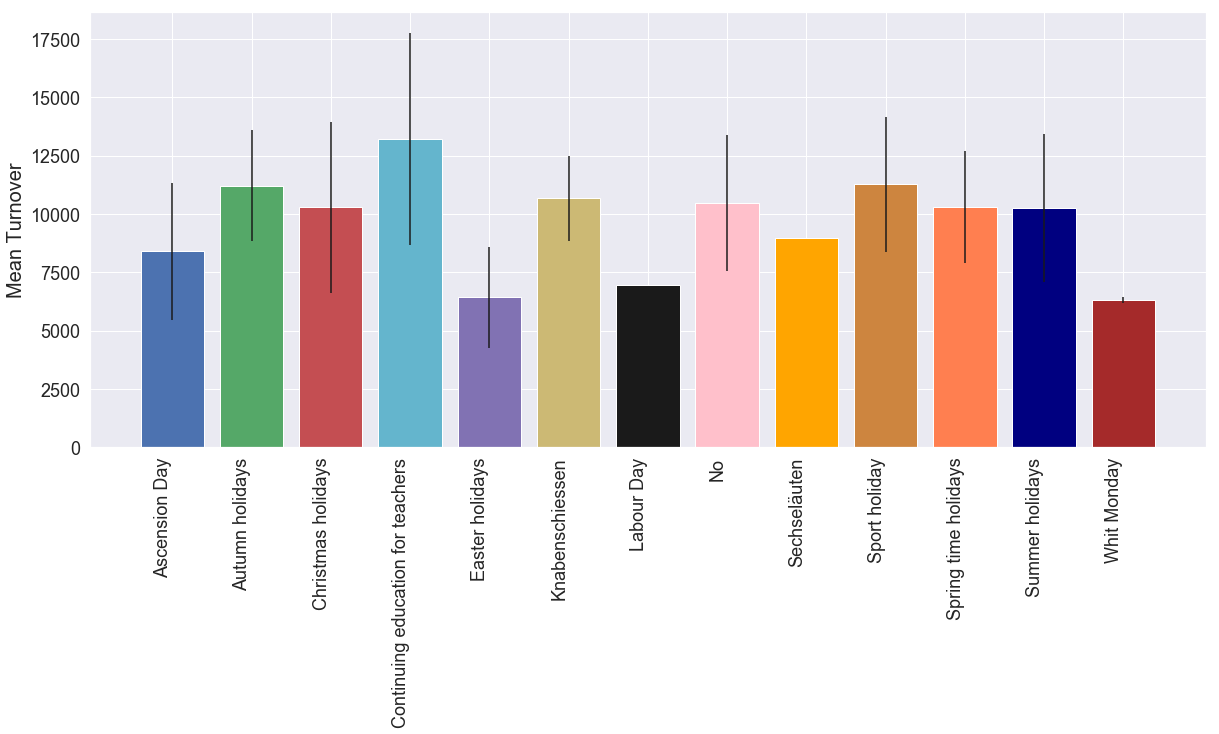

In [264]:
# Grouping the Dataframe by the individual school holiday and plotting the mean turnover with std
index = train_daily.groupby('school_holiday_str').mean().index
mean = train_daily.groupby('school_holiday_str')['turnover'].mean() 
std = train_daily.groupby('school_holiday_str')['turnover'].std()
plt.figure(figsize=(20,8))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std, color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink', 'orange', 'peru', 'coral', 'navy', 'brown'])
plt.ylabel("Mean Turnover", fontsize=20)
plt.xticks(x_pos, index, horizontalalignment="right")
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

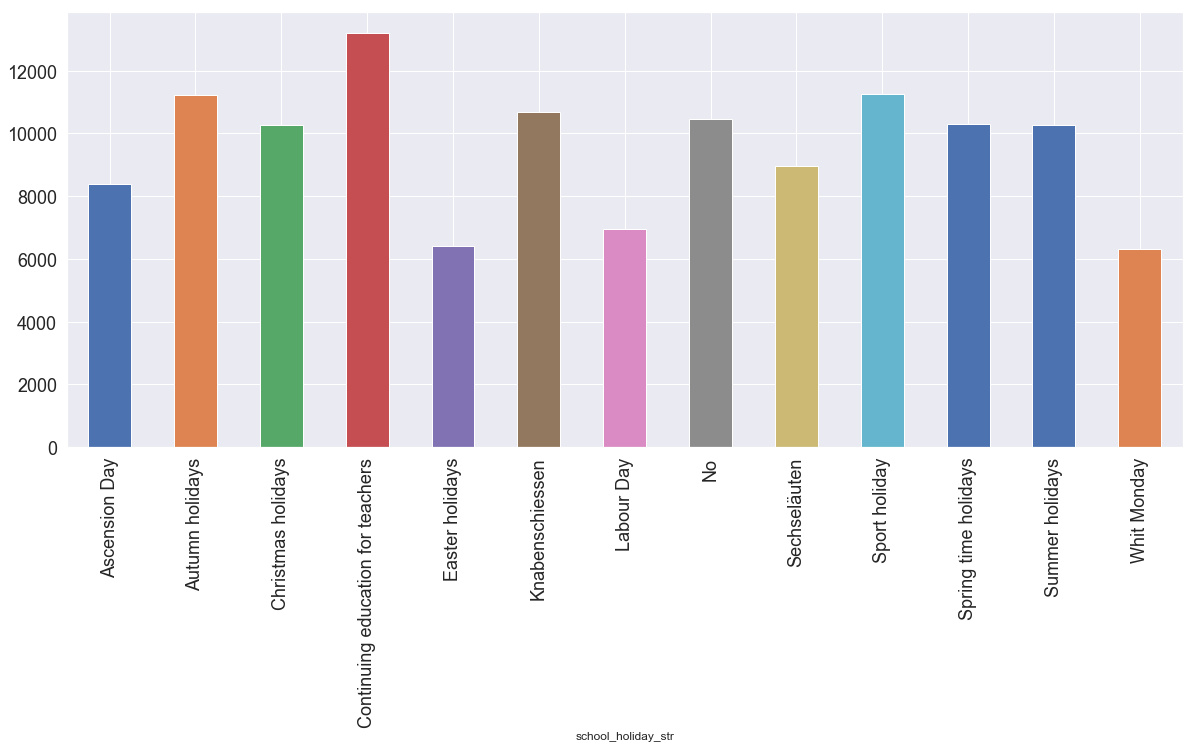

In [262]:
train_daily.groupby('school_holiday_str')['turnover'].mean().plot(kind='bar', figsize=(20,8), fontsize=18)
#train_daily.groupby('school_holiday_str')['turnover'].str()
plt.show()

## Distributions

In [392]:
# getting a list of only categorical columns
str_col = train_daily.select_dtypes(include=object).columns
# getting a list of only numerical columns
numeric_col = train_daily.select_dtypes(include=[int,float]).columns

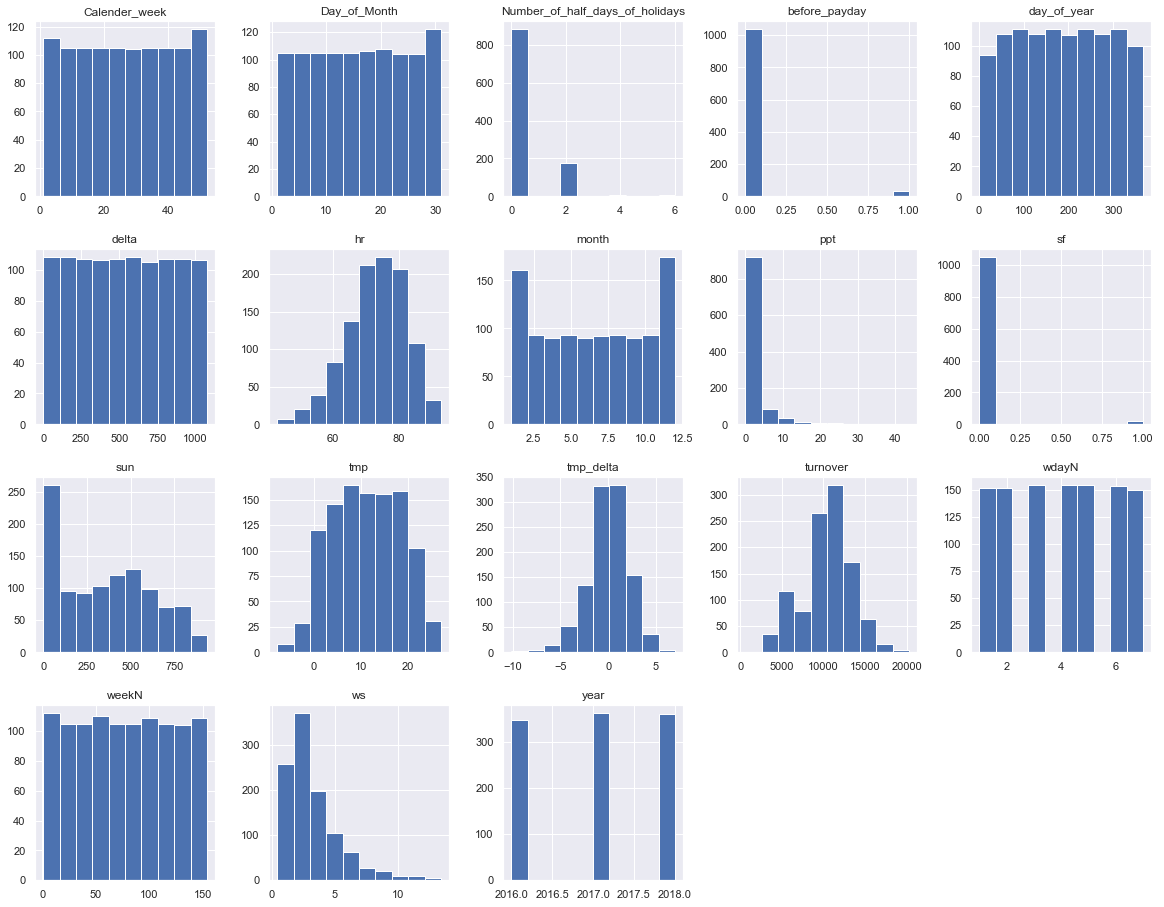

In [399]:
# plotting a histogram for every numerical column
train_daily[numeric_col].hist(figsize=(20,20), layout=(5,5))
plt.show()

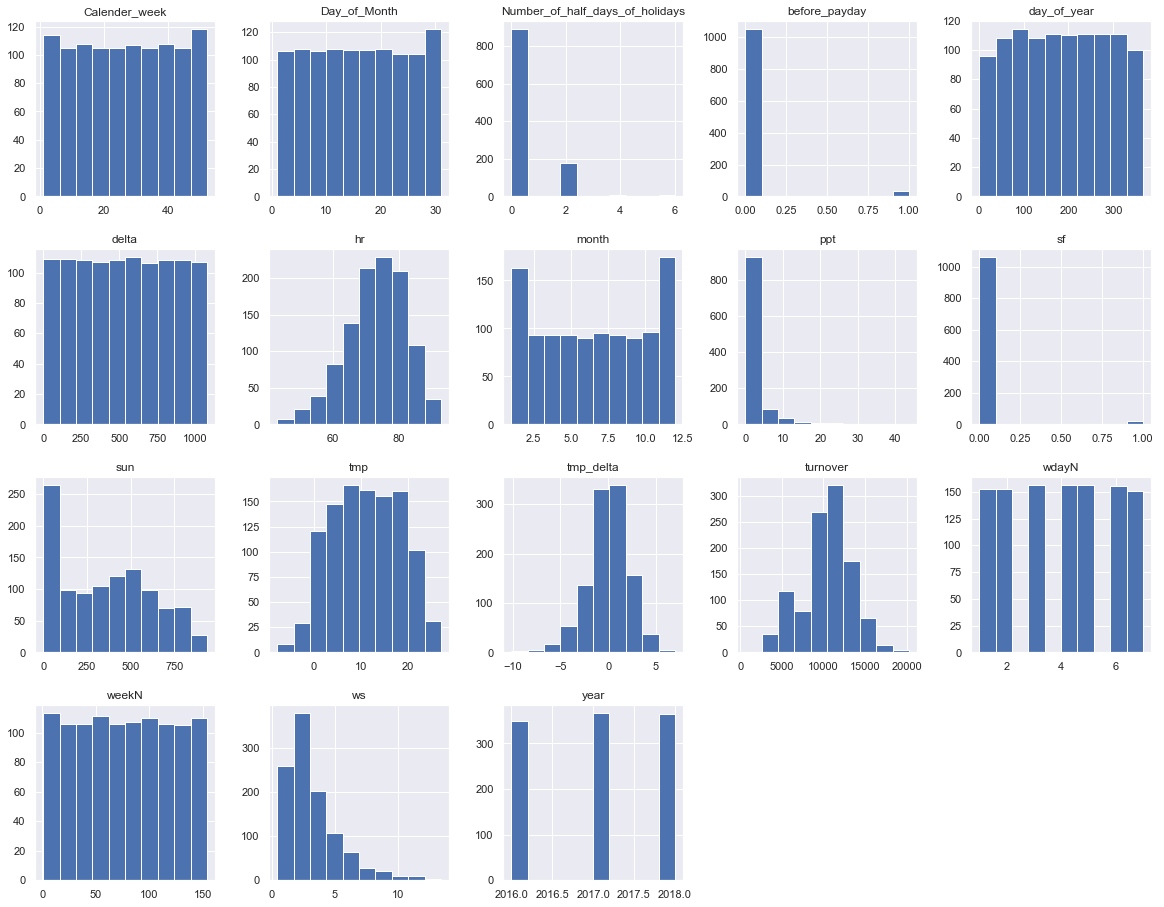

In [394]:
df[numeric_col].hist(figsize=(20,20), layout=(5,5))

plt.show()

In [248]:
df_cat = train_daily.select_dtypes(include=object)
numeric_col = train_daily.select_dtypes(include=[int,float]).columns

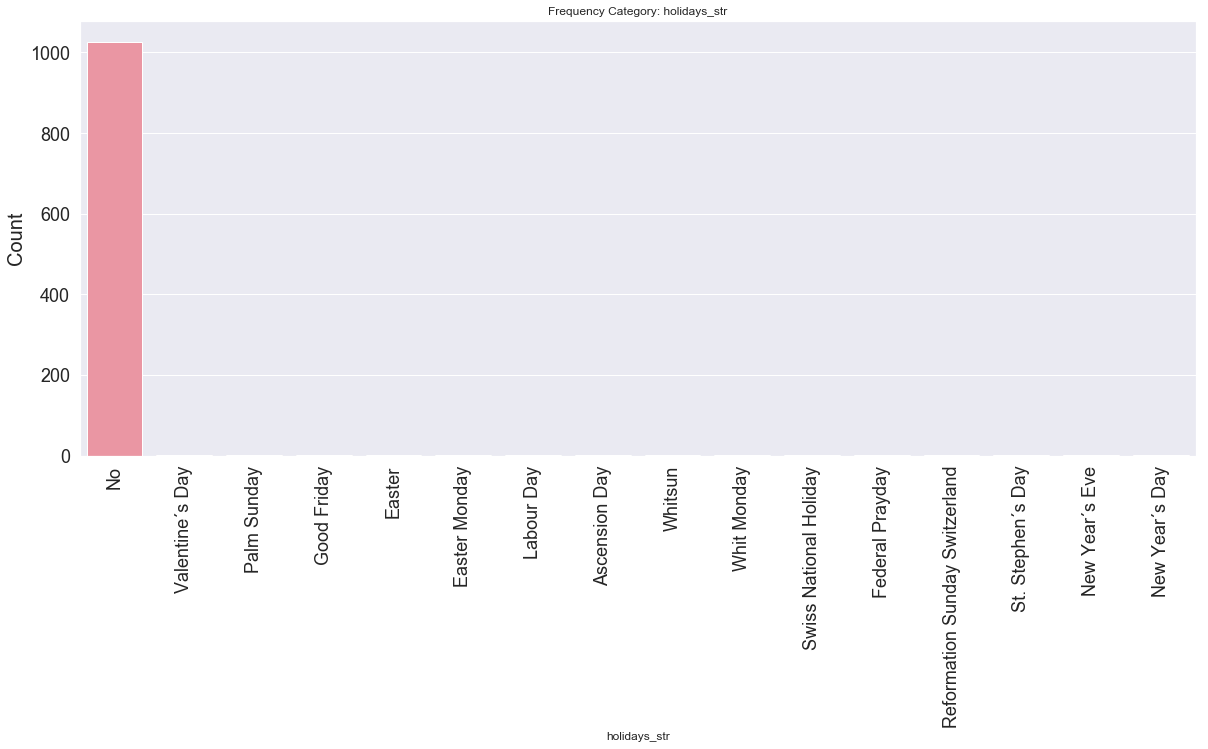

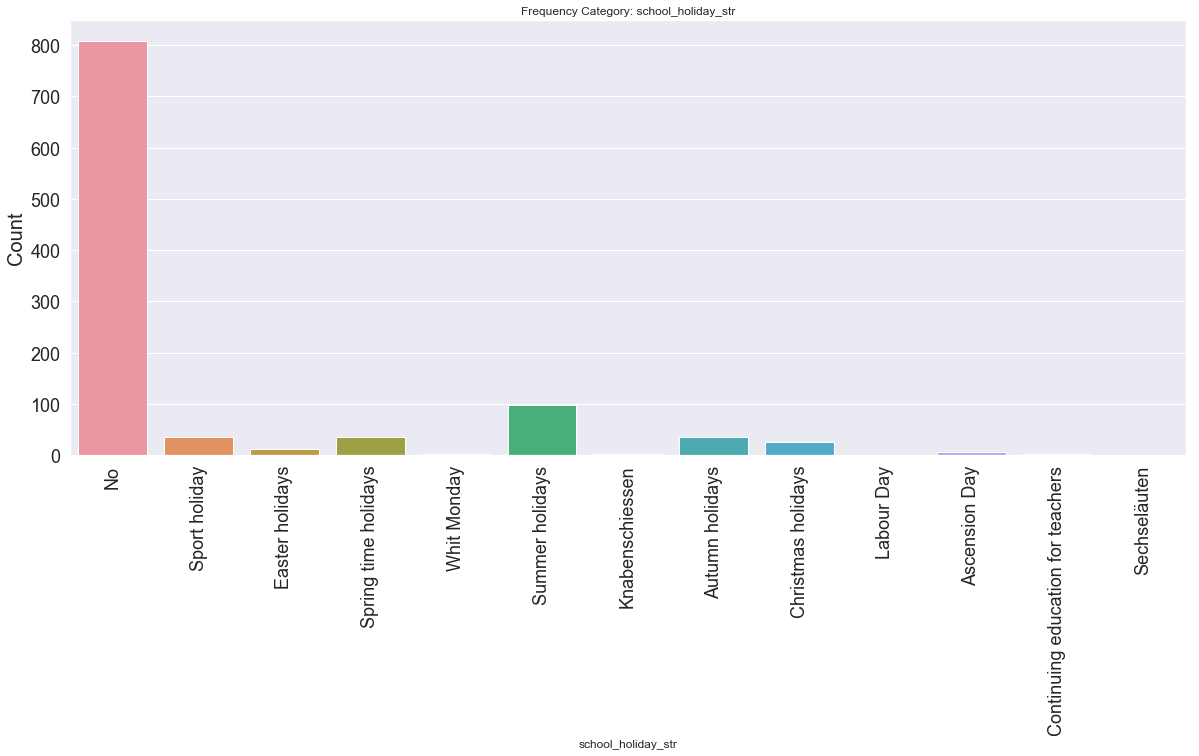

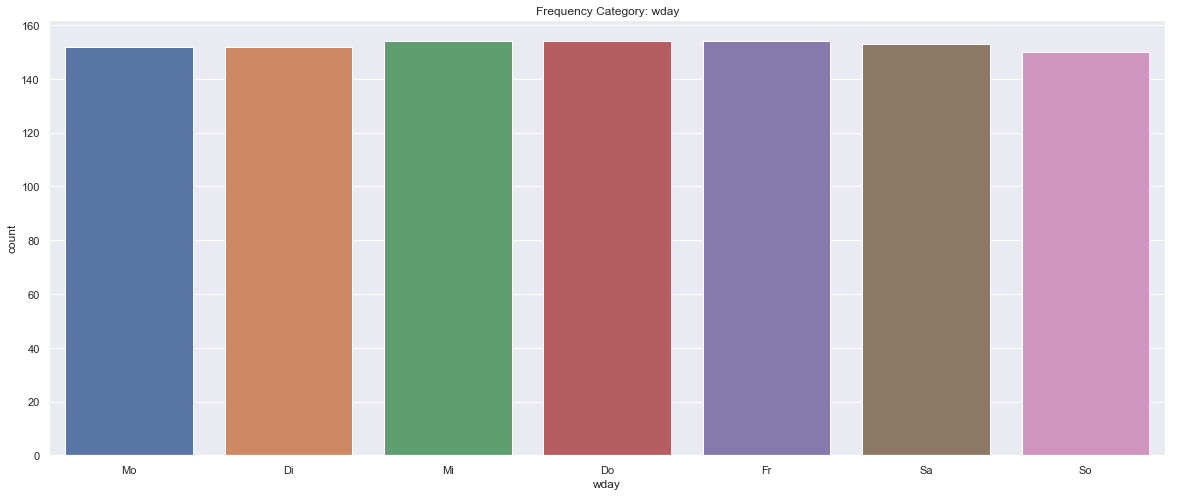

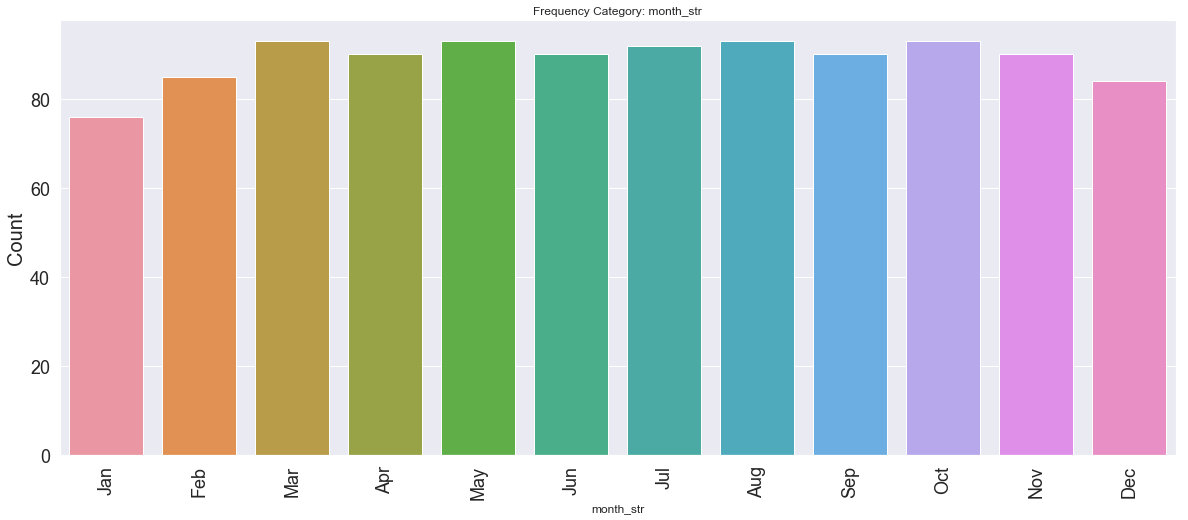

In [255]:
for col in df_cat.columns:
    if df_cat[col].nunique() <= 50:
        plt.figure(figsize=(20,8))
        sns.countplot(df_cat[col]).set_title("Frequency Category: {}".format(col))
        if df_cat[col].nunique() >= 10:
                    plt.xticks(rotation=90, fontsize=18)
                    plt.ylabel('Count', fontsize=20)
                    plt.yticks(fontsize=18)

## Relationships

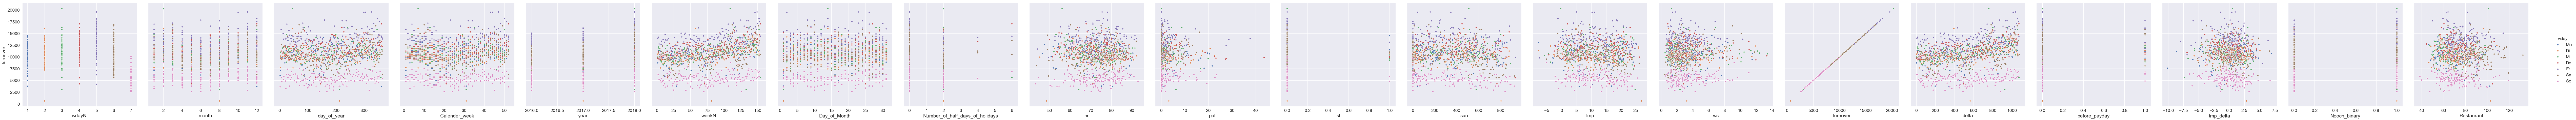

In [294]:
# Creating a scatterplot between tunrover and every numeric column
sns.pairplot(train_daily, height=7, hue='wday',
            y_vars=['turnover'],
            x_vars= numeric_col)

plt.show()

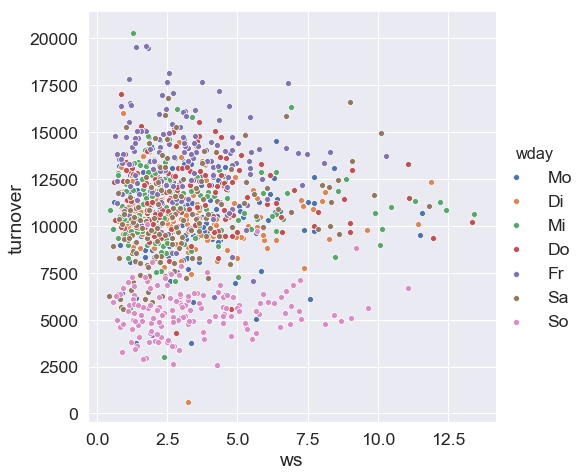

In [297]:
# Creating a scatterplot between tunrover and wind-speed with a hue of the day of the week
sns.pairplot(train_daily, height=7, hue='wday',
            y_vars=['turnover'],
            x_vars= 'ws')

plt.show()

In [ ]:
# Creating a scatterplot between tunrover and seit_t0 with a hue of the day of the week
sns.pairplot(train_daily, height=10, hue='wday',
            y_vars=['turnover'],
            x_vars= 'seit_t0')

plt.show()

In [1]:
# Creating a scatterplot between tunrover and wind-speed with a hue of the day of the week
sns.pairplot(train_daily, height=10, hue='wday',
            y_vars=['turnover'],
            x_vars= 'delta')

plt.show()

NameError: name 'sns' is not defined

In [ ]:
# Creating a scatterplot between tunrover and temperaturw with a hue of the day of the week
sns.pairplot(train_daily, height=10, hue='wday',
            y_vars=['turnover'],
            x_vars= 'tmp')

plt.show()

In [ ]:
# Creating a scatterplot between tunrover and the relative humidity with a hue of the day of the week
sns.pairplot(train_daily, height=10, hue='wday',
            y_vars=['turnover'],
            x_vars= 'hr')

plt.show()

## Correlations

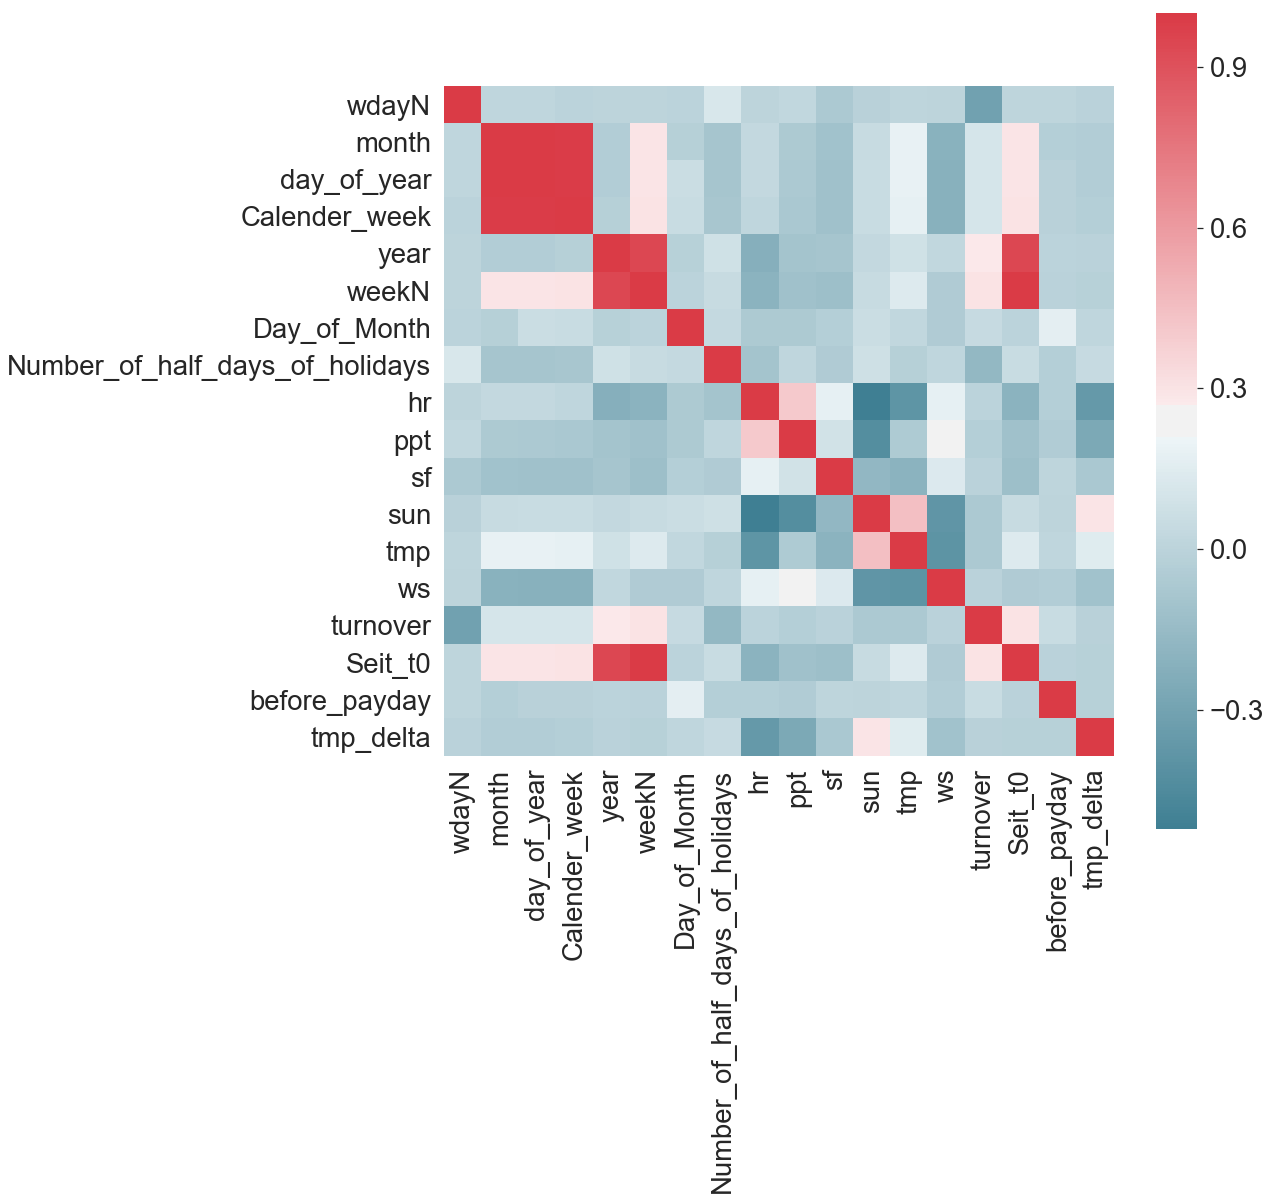

In [663]:
# Calculating and plotting all the pearson corrrelations for our numeric variables
corr = train_daily[numeric_col].corr(method = "pearson")

f, ax = plt.subplots(figsize=(15, 15))


sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
sns.set(font_scale=3)

In [63]:
df.corr().unstack().sort_values().drop_duplicates().head(10)


hr        sun             -0.520736
ppt       sun             -0.425928
ws        tmp             -0.397560
hr        tmp             -0.387079
ws        sun             -0.379860
hr        tmp_delta       -0.356521
turnover  wdayN           -0.308953
ppt       tmp_delta       -0.266117
year      hr              -0.223321
ws        Calender_week   -0.216040
dtype: float64

In [64]:
df.corr().unstack().sort_values().drop_duplicates().tail(10)



Number_of_half_days_of_holidays  Holiday          0.332649
hr                               ppt              0.408613
tmp                              sun              0.448514
delta                            year             0.943260
year                             weekN            0.943264
month                            Calender_week    0.990915
day_of_year                      Calender_week    0.994069
                                 month            0.996353
delta                            weekN            0.999979
wdayN                            wdayN            1.000000
dtype: float64

In [664]:
# getting the top five negative correlations for our dependent variable
train_daily.corr()['turnover'].sort_values().head(5)

wdayN                             -0.310967
hlL                               -0.183618
Number_of_half_days_of_holidays   -0.167114
sun                               -0.064147
tmp                               -0.063967
Name: turnover, dtype: float64

In [666]:
# getting the top five positive correlations for our dependent variable
train_daily.corr()['turnover'].sort_values(ascending=False).head(5)

turnover         1.000000
weekN            0.302037
Seit_t0          0.300033
year             0.276654
Restaurant       0.112362
Calender_week    0.108473
Name: turnover, dtype: float64

In [99]:
cat_col = train_daily.select_dtypes(include=object).columns
numeric_col = train_daily.select_dtypes(include=[int,float]).columns

In [101]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_daily[numeric_col], 10))

Top Absolute Correlations
weekN        Seit_t0          0.999979
month        day_of_year      0.996346
day_of_year  Calender_week    0.994014
month        Calender_week    0.990856
year         weekN            0.943320
             Seit_t0          0.943315
hr           sun              0.521421
sun          tmp              0.451757
ppt          sun              0.426869
hr           ppt              0.408906
dtype: float64


## ML

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, HuberRegressor, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.scorer import make_scorer
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from yellowbrick.regressor import ResidualsPlot
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error as mse
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from math import sqrt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

from sklearn.metrics import mean_absolute_error as mae

In [81]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

## Data Preparation

### Daily

In [309]:
train_daily.head()

date holidays_str school_holiday_str wday  wdayN  month  day_of_year  \
0 2016-01-18           No                 No   Mo      1      1           18   
1 2016-01-19           No                 No   Di      2      1           19   
2 2016-01-20           No                 No   Mi      3      1           20   
3 2016-01-21           No                 No   Do      4      1           21   
4 2016-01-22           No                 No   Fr      5      1           22   

   Calender_week  year  weekN     ...      sun       tmp        ws  \
0              3  2016      1     ...      377 -3.165000  1.961667   
1              3  2016      1     ...        0  0.333750  3.508333   
2              3  2016      1     ...        0  1.660417  3.629583   
3              3  2016      1     ...      502 -0.604583  1.977083   
4              3  2016      1     ...      514  0.370833  1.320000   

     turnover  Seit_t0  month_str  before_payday  tmp_delta  is_holiday  \
0   8743.2500        0        Jan              0   0.120417          No   
1  10609.8125        1        Jan              0   3.498750          No   
2  10023.0625        2        Jan              0   1.326667          No   
3   9635.2500        3        Jan              0  -2.265000          No   
4  13982.9375        4        Jan              0   0.975417          No   

   Restaurant  
0        57.0  
1        68.0  
2        70.0  
3        70.0  
4        83.0  

[5 rows x 29 columns]

In [385]:
train_daily.shape

(1069, 29)

In [386]:
test_daily.shape

(67, 28)

In [226]:
test_daily.columns

Index(['date', 'holidays_str', 'school_holiday_str', 'wday', 'wdayN', 'month',
       'day_of_year', 'Calender_week', 'year', 'weekN', 'hlL', 'Day_of_Month',
       'Holiday', 'Number_of_half_days_of_holidays', 'Holiday_pls_1',
       'Holiday_neg_1', 'hr', 'ppt', 'sf', 'sun', 'tmp', 'ws', 'Seit_t0',
       'month_str', 'before_payday', 'tmp_delta', 'is_holiday', 'Restaurant',
       'turnover'],
      dtype='object')

In [227]:
tr_02 = train_daily.drop(columns=['date'])
te_02 =test_daily.drop(columns=['date'])

In [228]:
tr_02 = pd.get_dummies(tr_02)
te_02 = pd.get_dummies(te_02)

In [229]:
tr_02 = pd.get_dummies(tr_02, columns=['hlL', 'Holiday', 'Holiday_pls_1', 'Holiday_neg_1'])
te_02 = pd.get_dummies(te_02, columns=['hlL', 'Holiday', 'Holiday_pls_1', 'Holiday_neg_1'])

In [230]:
tr_col = train_daily.columns

In [231]:
tr_02.shape

(1069, 77)

In [232]:
te_02.shape

(67, 44)

In [233]:
available_columns = te_02.columns

In [234]:
y_d = tr_02['turnover'].values
X_d = tr_02[available_columns].values

In [235]:
X_tr, X_te, y_tr, y_te = train_test_split(X_d, y_d, test_size=0.2, random_state=0)

In [71]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Hourly

In [ ]:
# Function for MAPE Caclculation
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [726]:
# Taking the full (daily + hourly) dataframes und prepare them for the models
tr_full = train_full.copy()
te_full = test_full.copy()

# Drop the Date column
tr_full.drop(columns=['date'], inplace=True)
te_full.drop(columns=['date'], inplace=True)

# Apply One-Hot Encoding to the categoricla features
tr_full = pd.get_dummies(train_full)
te_full = pd.get_dummies(te_full)
tr_full = pd.get_dummies(tr_full, columns=['hlL', 'Holiday', 'Holiday_pls_1', 'Holiday_neg_1'])
te_full = pd.get_dummies(te_full, columns=['hlL', 'Holiday', 'Holiday_pls_1', 'Holiday_neg_1'])

# Make sure that the training and test data have the same column
tr_full = tr_full[te_full.columns]

# Extracting the daily and hourly features and target
y_h = train_full['turnover_hourly'].values
y_d = train_daily['turnover'].values
X_h = tr_full.values
y_h = train_full['turnover_hourly'].values
y_d = train_daily['turnover'].values

# Split in training and test set 80/20
X_tr, X_te, y_tr, y_te = train_test_split(X_h, y_h, test_size=0.2, random_state=0)

In [735]:
X_tr.shape

(9072, 69)

In [734]:
tr_full.shape

(11341, 69)

In [ ]:
te_full.shape

In [ ]:
te_full.columns

## PCA

In [399]:
scaler = StandardScaler()

In [728]:
X_tr.shape

(9072, 69)

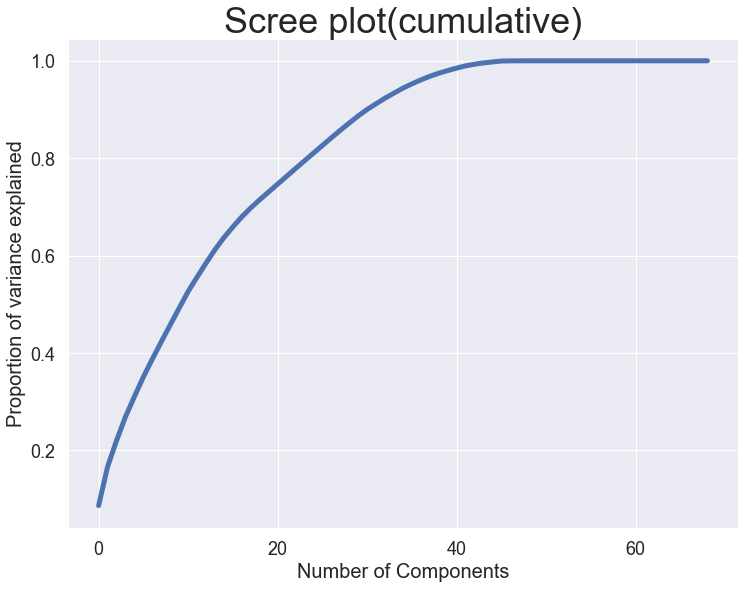

In [727]:
# Creating a scree plot
scaler = StandardScaler()
pca = PCA(n_components=None)
X_scaled = scaler.fit_transform(X_tr)
pca.fit(X_scaled)
pve = pca.explained_variance_ratio_
fig = plt.figure(figsize=(12, 9))
plt.plot(np.cumsum(pve[:300]), linewidth=5)
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('Proportion of variance explained', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Scree plot(cumulative)')
plt.show()

In [74]:
daily_agg = []

### Dummy

### Mean

In [75]:
dummy_pipe_mean = Pipeline([('dummy', DummyRegressor(strategy='mean'))])
dummy_pipe_mean.fit(X_tr, y_tr)

y_te_dum_pred = dummy_pipe_mean.predict(X_te)
y_tr_dum_pred = dummy_pipe_mean.predict(X_tr)


mape_dum_tr = mean_absolute_percentage_error(y_tr, y_tr_dum_pred)
mape_dum_te = mean_absolute_percentage_error(y_te, y_te_dum_pred)


y_dum_pred_full = dummy_pipe_mean.predict(X_h)
train_full['pred_h'] = y_dum_pred_full
y_dum_pred_d = train_full.groupby('date')['pred_h'].sum().values
mape_dum_d = mean_absolute_percentage_error(y_d, y_dum_pred_d)

print('MAPE on our test data: {:.3f}'.format(mape_dum_te))
print('MAPE on our training data: {:.3f}'.format(mape_dum_tr))
print('Mape daily: {}'.format(mape_dum_d))

daily_agg.append(mape_dum_d)

MAPE on our test data: 454.506
MAPE on our training data: 475.170
Mape daily: 17.13581212402321


## Linear Regression

In [411]:
X_tr_sc = scale(X_tr)
X_te_sc = scale(X_te)

In [412]:
X_tr.shape

(855, 43)

In [77]:
lr=LinearRegression()
lin_pipe = Pipeline([
  #  ('scale', StandardScaler()),
    ('RFE', RFE(lr)),
    # ('pca', PCA(n_components=280)),
     ('linear', LinearRegression())])

In [165]:
n_features = np.arange(4, X_tr.shape[1])
lin_cv = GridSearchCV(lin_pipe, 
                     # {},
                      {'RFE__n_features_to_select':n_features},
                       cv=3,
                       n_jobs=-1,
                       scoring=MAPE_scorer,
                      verbose=True
                      )

lin_cv.fit(scale(X_tr), y_tr)

y_te_lin_pred = lin_cv.predict(scale(X_te))
y_tr_lin_pred = lin_cv.predict(scale(X_tr))

y_lin_pred_full = lin_cv.predict(scale(X_h))
train_full['pred_h'] = y_lin_pred_full
y_lin_pred_d = train_full.groupby('date')['pred_h'].sum().values
mape_lin_d = mean_absolute_percentage_error(y_d, y_lin_pred_d)

mape_lin_tr = mean_absolute_percentage_error(y_tr, y_tr_lin_pred)
mape_lin_te = mean_absolute_percentage_error(y_te, y_te_lin_pred)

print('MAPE on our training data: {:.3f}'.format(mape_lin_tr))
print('MAPE on our test data: {:.3f}'.format(mape_lin_te))
print('Mape daily: {}'.format(mape_lin_d))
print(lin_cv.best_params_)

daily_agg.append(mape_lin_d)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    2.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.0s finished


MAPE on our training data: 473.650
MAPE on our test data: 452.235
Mape daily: 15.398529879057785
{'RFE__n_features_to_select': 7}


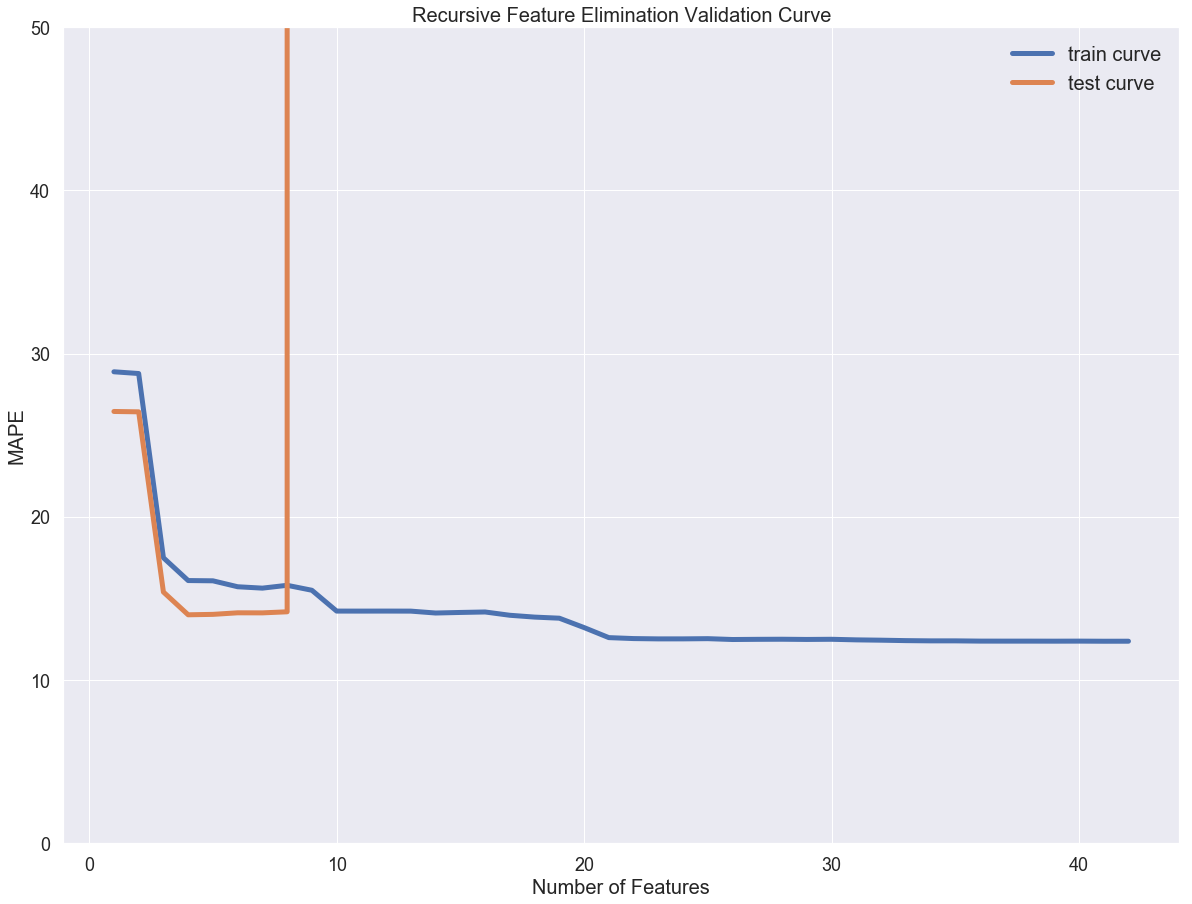

In [417]:
# Recursive featue elimination validation curve
n_Features = range(1, X_tr.shape[1])

train_scores = []
test_scores = []

for feature in n_Features:
    
    rfe_n = RFE(lr, feature)
    rfe_n.fit(scale(X_tr), y_tr)
    
    y_tr_pred = rfe_n.predict(scale(X_tr))
    train_scores.append(mean_absolute_percentage_error(y_tr, y_tr_pred))
    
    y_te_pred = rfe_n.predict(scaleX_te))
    test_scores.append(mean_absolute_percentage_error(y_te, y_te_pred))

fig = plt.figure(figsize=(20,15))
plt.plot(n_Features, train_scores, label='train curve',  linewidth=5)
plt.plot(n_Features, test_scores, label='test curve',  linewidth=5)
plt.xlabel('Number of Features', fontsize=20)
plt.ylabel('MAPE', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 50)
plt.title('Recursive Feature Elimination Validation Curve', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

In [578]:
ridge =  Ridge(alpha=1.4)

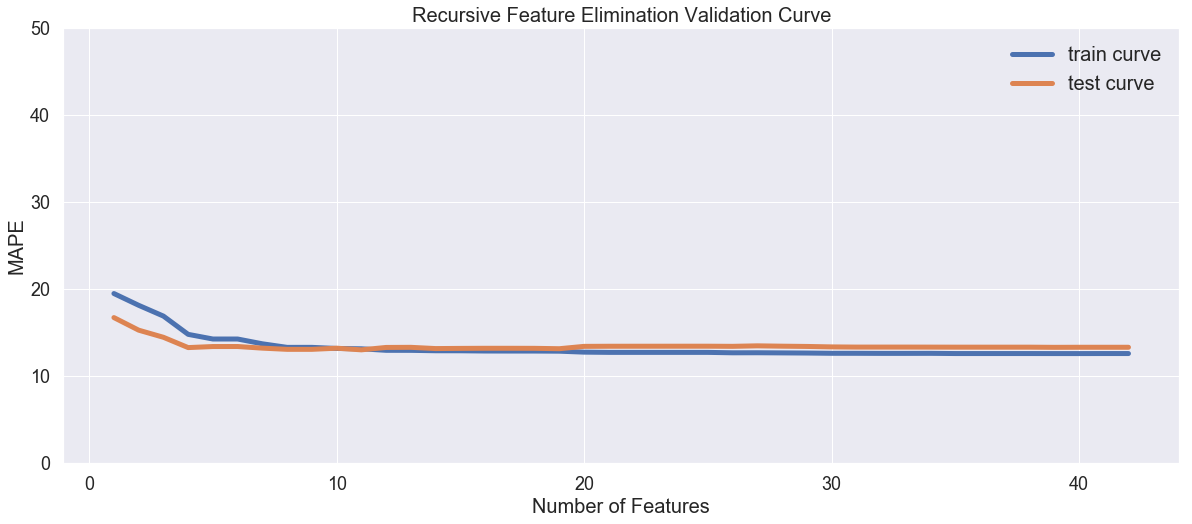

In [422]:
ridge =  Ridge(alpha=1.4)

# Recursive featue elimination validation curve
n_Features = range(1, X_tr.shape[1])

train_scores = []
test_scores = []

for feature in n_Features:
    
    rfe_n = RFE(ridge, feature)
    rfe_n.fit(scale(X_tr), y_tr)
    
    y_tr_pred = rfe_n.predict(scale(X_tr))
    train_scores.append(mean_absolute_percentage_error(y_tr, y_tr_pred))
    
    y_te_pred = rfe_n.predict(scale(X_te))
    test_scores.append(mean_absolute_percentage_error(y_te, y_te_pred))

fig = plt.figure(figsize=(20,8))
plt.plot(n_Features, train_scores, label='train curve',  linewidth=5)
plt.plot(n_Features, test_scores, label='test curve',  linewidth=5)
plt.xlabel('Number of Features', fontsize=20)
plt.ylabel('MAPE', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 50)
plt.title('Recursive Feature Elimination Validation Curve', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

## Ridge Regression

In [729]:
# Creating a pipeline for Ridge Regression
ridge = Ridge(alpha=2)
rid_pipe = Pipeline([
    ('RFE', RFE(ridge)),
   #('pca', PCA(n_components=280)),
    ('ridge', Ridge())])

In [730]:
# Creating a range of parameters
n_features = np.arange(4, X_h.shape[1])
alphas = np.arange(1,3,0.01)

# Performing Gridsearch with the given Paramteters
rid_cv = GridSearchCV(rid_pipe, {'ridge__alpha': alphas,
                                'RFE__n_features_to_select':n_features},
                       cv=3,
                       n_jobs=-1,
                       scoring=MAPE_scorer,
                       verbose=True
                       )

rid_cv.fit(scale(X_tr), y_tr)
y_te_rid_pred = rid_cv.predict(scale(X_te))
y_tr_rid_pred = rid_cv.predict(scale(X_tr))

# Aggregating hourly to daily
y_rid_pred_full = rid_cv.predict(scale(X_h))
train_full['pred_h'] = y_rid_pred_full
y_rid_pred_d = train_full.groupby('date')['pred_h'].sum().values
mape_rid_d = mean_absolute_percentage_error(y_d, y_rid_pred_d)

mape_rid = mean_absolute_percentage_error(y_te, y_te_rid_pred)
mape_rid_tr = mean_absolute_percentage_error(y_tr, y_tr_rid_pred)

# Printing our Results
print(rid_cv.best_params_)
print('MAPE on our test data: {:.3f}'.format(mape_rid))
print('MAPE on our trainig data: {:.3f}'.format(mape_rid_tr))
print('Mape Daily: {}'.format(mape_rid_d))

Fitting 3 folds for each of 260 candidates, totalling 780 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 780 out of 780 | elapsed:   39.1s finished


{'RFE__n_features_to_select': 14, 'ridge__alpha': 1.0}
MAPE on our test data: 134.235
MAPE on our trainig data: 135.266
Mape Daily: 13.430348577053788


## Ridge Selected Features

In [ ]:
train_daily[test_daily.columns]

In [453]:
rfe_feat = rid_cv.best_estimator_.named_steps['RFE']
rid_coef = rid_cv.best_estimator_.named_steps['ridge']
rid_df = train_daily[test_daily.columns].iloc[:, rfe_feat.support_]

In [737]:
tr_full.shape

(11341, 69)

In [733]:
X_tr.shape

(9072, 69)

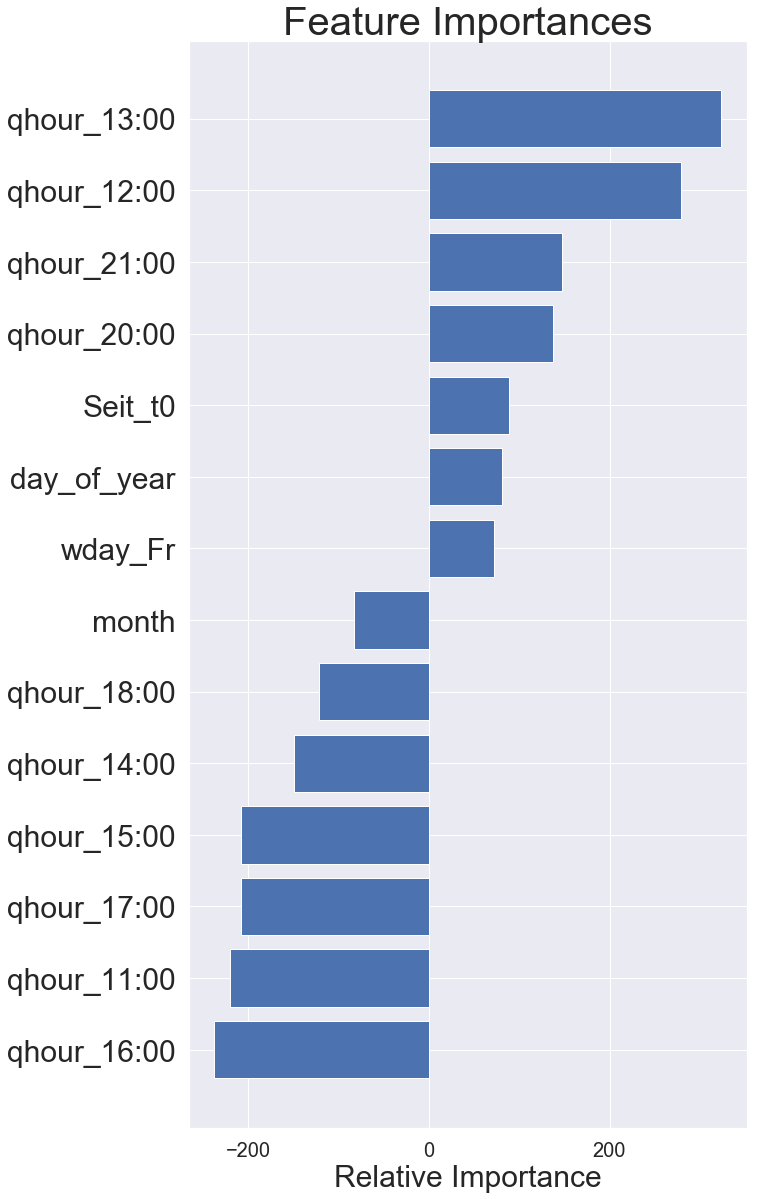

In [736]:
rfe_feat = rid_cv.best_estimator_.named_steps['RFE']
rid_coef = rid_cv.best_estimator_.named_steps['ridge']
rid_df = tr_full.iloc[:, rfe_feat.support_]


features=rid_df.columns
importances = rid_coef.coef_
indices = np.argsort(importances)

plt.figure(1, figsize=(10,20))
plt.title('Feature Importances', fontsize=40)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices], fontsize=30)
plt.xticks(fontsize=20)
plt.xlabel('Relative Importance', fontsize=30)
#plt.figsize(20,20)
plt.show()

In [ ]:
# Recursive featue elimination validation curve
n_Features = range(1, X_tr.shape[1])

train_scores = []
test_scores = []

for feature in n_Features:

    lin_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('RFE', RFE(lr, n_features_to_select=feature)),
    ('linear', LinearRegression())])
    
    lin_pipe.fit(X_tr, y_tr)
    
    y_tr_pred = lin_pipe.predict(X_tr)
    train_scores.append(mean_absolute_percentage_error(y_tr, y_tr_pred))
    
    y_te_pred = lin_pipe.predict(X_te)
    test_scores.append(mean_absolute_percentage_error(y_te, y_te_pred))

fig = plt.figure(figsize=(20,12))
plt.plot(n_Features, train_scores, label='train curve',  linewidth=5)
plt.plot(n_Features, test_scores, label='test curve',  linewidth=5)
plt.xlabel('Number of Features', fontsize=20)
plt.ylabel('MAPE', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 30)
plt.title('Recursive Feature Elimination Validation Curve', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

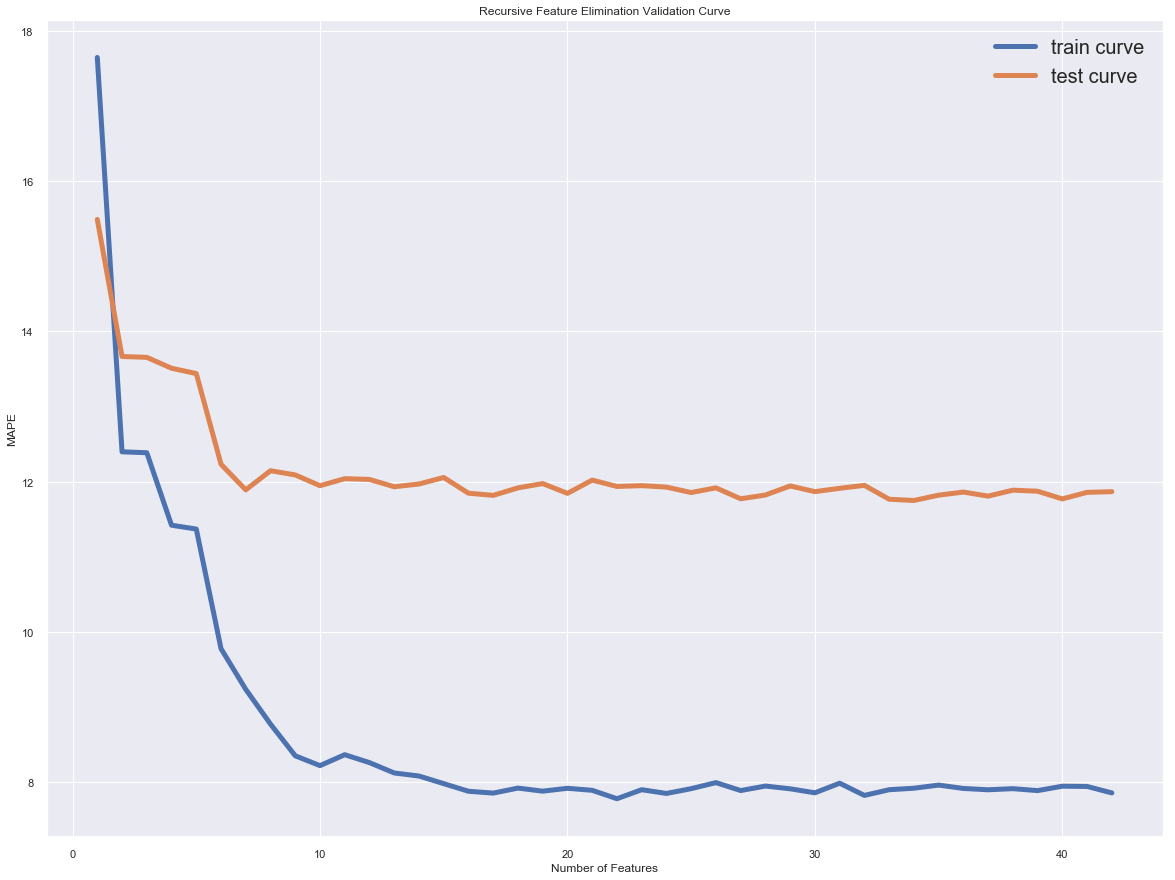

In [511]:
# Recursive featue elimination validation curve
n_Features = range(1, X_tr.shape[1])

train_scores = []
test_scores = []

for feature in n_Features:
    
    rfe_n = RFE(GB, feature)
    rfe_n.fit(X_tr, y_tr)
    
    y_tr_pred = rfe_n.predict(X_tr)
    train_scores.append(mean_absolute_percentage_error(y_tr, y_tr_pred))
    
    y_te_pred = rfe_n.predict(X_te)
    test_scores.append(mean_absolute_percentage_error(y_te, y_te_pred))
    

fig = plt.figure(figsize=(20,15))
plt.plot(n_Features, train_scores, label='train curve', linewidth=5)
plt.plot(n_Features, test_scores, label='test curve',  linewidth=5)
plt.xlabel('Number of Features')
plt.ylabel('MAPE')
#plt.ylim(0, 0.2)
plt.title('Recursive Feature Elimination Validation Curve')
plt.legend(prop={'size': 20})
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,15))
plt.plot(n_Features, train_scores, label='train curve', linewidth=5)
plt.plot(n_Features, test_scores, label='test curve',  linewidth=5)
plt.xlabel('Number of Features')
plt.ylabel('MAPE')
plt.xticks(fontsize=)
#plt.ylim(0, 0.2)
plt.title('Recursive Feature Elimination Validation Curve')
plt.legend(prop={'size': 20})
plt.show()

In [ ]:
{'RFE__n_features_to_select': 9,
 'RFR__max_depth': 11,
 'RFR__max_features': 'sqrt',
 'RFR__min_samples_leaf': 10,
 'RFR__min_samples_split': 20,
 'RFR__n_estimators': 1000}

In [555]:
rfe = RandomForestRegressor(n_jobs=-1,
        max_depth= 11,
        max_features='sqrt',
        min_samples_leaf=10,
        min_samples_split=20,
        n_estimators=1000
                           )

## Random Forrest

In [95]:
rfr = RandomForestRegressor()
RFR_pipe = Pipeline([
    # ('scale', StandardScaler()),
       #              ('pca', PCA(n_components=280)),
    #  ('RFE', RFE(rfr)),
      ('RFR', RandomForestRegressor())])

In [96]:
n_depths = np.arange(20)
#n_features = [9]

RFR_cv = GridSearchCV(RFR_pipe, {  
               'RFR__min_samples_split': [10, 15, ],
                'RFR__min_samples_leaf': [10, 15, 20],
                 'RFR__max_depth': n_depths ,
                 'RFR__n_estimators': [1000, 1500, 200],
                #'RFR__loss': ['huber'],
                # RFE__n_features_to_select':n_features,
                 'RFR__max_features': ['sqrt']
             },
                        n_jobs=-1, 
                        scoring=MAPE_scorer,
                        cv=3,
                        verbose=True)

RFR_cv.fit(X_tr, y_tr)

y_te_RFR_pred = RFR_cv.predict(X_te)
y_tr_RFR_pred = RFR_cv.predict(X_tr)

y_rfr_pred_full = RFR_cv.predict(X_h)
train_full['pred_h'] = y_rfr_pred_full
y_rfr_pred_d = train_full.groupby('date')['pred_h'].sum().values
mape_rfr_d = mean_absolute_percentage_error(y_d, y_rfr_pred_d)


mape_rfr = mean_absolute_percentage_error(y_te, y_te_RFR_pred)
mape_rfr_tr = mean_absolute_percentage_error(y_tr, y_tr_RFR_pred)


print('MAPE on our test data: {:.3f}'.format(mape_rfr))
print('MAPE on our trainig data: {:.3f}'.format(mape_rfr_tr))
print('Mape Daily: {}'.format(mape_rfr_d))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.2s finished


MAPE on our test data: 135.343
MAPE on our trainig data: 135.338
Mape Daily: 10.919777551857463


In [475]:
RFR_cv.best_params_

{'RFE__n_features_to_select': 9,
 'RFR__max_depth': 9,
 'RFR__max_features': 'sqrt',
 'RFR__min_samples_leaf': 10,
 'RFR__min_samples_split': 15,
 'RFR__n_estimators': 1000}

## Gradient Boosting

In [738]:
GB = GradientBoostingRegressor(learning_rate = 0.01,
                                       max_depth=4, 
                                       min_samples_leaf=11,
                                       min_samples_split=10,
                                       n_estimators =1000,
                                       subsample=0.8,)

In [ ]:
{'GB__learning_rate': 0.01, 'GB__max_depth': 4, 'GB__min_samples_leaf': 11, 'GB__min_samples_split': 10, 'GB__n_estimators': 1000, 'GB__subsample': 0.8, 'RFE__n_features_to_select': 8}
MAPE on our test data: 10.102
MAPE on our trainig data: 9.529

In [739]:
GB_pipe = Pipeline([#('scale', StandardScaler()),
    #                 ('pca', PCA(n_components=280)),
         #            ('RFE', RFE(GB)),
                     ('GB', GradientBoostingRegressor())])

In [740]:
GB_cv = GridSearchCV(GB_pipe, 
                         {  
                 'GB__min_samples_split': [10, 15, 20],
                 'GB__min_samples_leaf': [11, 15, 20],
                 'GB__max_depth': [3,4,5,6,7],
                 'GB__n_estimators': [1000, 1500],
                 'GB__learning_rate':[0.01, 0.1],
                 'GB__subsample':[0.8, 0.9],
#                 'GB__loss': ['huber'],
       #           'RFE__n_features_to_select':n_features,           
              #   'GB__max_features': ['sqrt']
             },
                         n_jobs=-1, 
                         scoring=MAPE_scorer,
                         verbose=True,
                         cv=3)
GB_cv.fit(X_tr, y_tr)
y_te_GB_pred = GB_cv.predict(X_te)
y_tr_GB_pred = GB_cv.predict(X_tr)

mape_GB = mean_absolute_percentage_error(y_te, y_te_GB_pred)
mape_GB_tr = mean_absolute_percentage_error(y_tr, y_tr_GB_pred)

y_gb_pred_full = GB_cv.predict(X_h)
train_full['pred_h'] = y_gb_pred_full
y_gb_pred_d = train_full.groupby('date')['pred_h'].sum().values
mape_gb_d = mean_absolute_percentage_error(y_d, y_gb_pred_d)

print(GB_cv.best_params_)
print('MAPE on our test data: {:.3f}'.format(mape_GB))
print('MAPE on our trainig data: {:.3f}'.format(mape_GB_tr))
print('Mape Daily: {}'.format(mape_gb_d))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.2s finished


{'GB__learning_rate': 0.01, 'GB__max_depth': 7, 'GB__min_samples_leaf': 11, 'GB__min_samples_split': 10, 'GB__n_estimators': 1000, 'GB__subsample': 0.8}
MAPE on our test data: 104.687
MAPE on our trainig data: 86.670
Mape Daily: 6.927955098908953


In [745]:
sklearn.base.clone(GB1, safe=True)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [747]:
from sklearn.ensemble import GradientBoostingRegressor

In [744]:
import sklearn

In [748]:
 GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [741]:
GB1 = GradientBoostingRegressor()

In [742]:
GB1

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [750]:


GB1.fit(X_tr, y_tr)

y_te_GB_pred = GB1.predict(X_te)
y_tr_GB_pred = GB1.predict(X_tr)

mape_GB = mean_absolute_percentage_error(y_te, y_te_GB_pred)
mape_GB_tr = mean_absolute_percentage_error(y_tr, y_tr_GB_pred)

y_gb_pred_full = GB1.predict(X_h)
train_full['pred_h'] = y_gb_pred_full
y_gb_pred_d = train_full.groupby('date')['pred_h'].sum().values
mape_gb_d = mean_absolute_percentage_error(y_d, y_gb_pred_d)


print(GB_cv.best_params_)
print('MAPE on our test data: {:.3f}'.format(mape_GB))
print('MAPE on our trainig data: {:.3f}'.format(mape_GB_tr))
print('Mape Daily: {}'.format(mape_gb_d))

{'GB__learning_rate': 0.01, 'GB__max_depth': 7, 'GB__min_samples_leaf': 11, 'GB__min_samples_split': 10, 'GB__n_estimators': 1000, 'GB__subsample': 0.8}
MAPE on our test data: 118.820
MAPE on our trainig data: 114.604
Mape Daily: 10.794659576636963


In [751]:
rfr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [752]:
rfr.fit(X_tr, y_tr)

y_te_GB_pred = rfr.predict(X_te)
y_tr_GB_pred = rfr.predict(X_tr)

mape_GB = mean_absolute_percentage_error(y_te, y_te_GB_pred)
mape_GB_tr = mean_absolute_percentage_error(y_tr, y_tr_GB_pred)

y_gb_pred_full = rfr.predict(X_h)
train_full['pred_h'] = y_gb_pred_full
y_gb_pred_d = train_full.groupby('date')['pred_h'].sum().values
mape_gb_d = mean_absolute_percentage_error(y_d, y_gb_pred_d)


print(GB_cv.best_params_)
print('MAPE on our test data: {:.3f}'.format(mape_GB))
print('MAPE on our trainig data: {:.3f}'.format(mape_GB_tr))
print('Mape Daily: {}'.format(mape_gb_d))

{'GB__learning_rate': 0.01, 'GB__max_depth': 7, 'GB__min_samples_leaf': 11, 'GB__min_samples_split': 10, 'GB__n_estimators': 1000, 'GB__subsample': 0.8}
MAPE on our test data: 102.920
MAPE on our trainig data: 38.315
Mape Daily: 6.670810932045307


In [169]:
mixed_y_d = (y_nn_pred_d +y_gb_pred_d)/2
mape_mix_d = mean_absolute_percentage_error(y_d, mixed_y_d)
print(mape_mix_d)

8.064305383141242


In [196]:
## Hourly

GB_cv = GridSearchCV(GB_pipe, 
                         {  
                 'GB__min_samples_split': [10],
                 'GB__min_samples_leaf': [11],
                 'GB__max_depth': [7],
                 'GB__n_estimators': [1000],
                 'GB__learning_rate':[0.01],
                 'GB__subsample':[0.8],
#                 'GB__loss': ['huber'],
       #           'RFE__n_features_to_select':n_features,           
              #   'GB__max_features': ['sqrt']
             },
                         n_jobs=-1, 
                         scoring=MAPE_scorer,
                         verbose=True,
                         cv=3)

GB_cv.fit(X_tr, np.log1p(y_tr))

y_te_GB_pred = GB_cv.predict(X_te)
y_tr_GB_pred = GB_cv.predict(X_tr)

mape_GB = mean_absolute_percentage_error(y_te, np.expm1(y_te_GB_pred))
mape_GB_tr = mean_absolute_percentage_error(y_tr, np.expm1(y_tr_GB_pred))

y_gb_pred_full = GB_cv.predict(X_h)
train_full['pred_h'] = np.expm1(y_gb_pred_full)
y_gb_pred_d = train_full.groupby('date')['pred_h'].sum().values
mape_gb_d = mean_absolute_percentage_error(y_d, y_gb_pred_d)

print(GB_cv.best_params_)
print('MAPE on our test data: {:.3f}'.format(mape_GB))
print('MAPE on our trainig data: {:.3f}'.format(mape_GB_tr))
print('Mape Daily: {}'.format(mape_gb_d))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.9s finished


{'GB__learning_rate': 0.01, 'GB__max_depth': 7, 'GB__min_samples_leaf': 11, 'GB__min_samples_split': 10, 'GB__n_estimators': 1000, 'GB__subsample': 0.8}
MAPE on our test data: 75.527
MAPE on our trainig data: 45.855
Mape Daily: 10.69765727095848


In [202]:
## Daily

GB_cv = GridSearchCV(GB_pipe, 
                         {  
                 'GB__min_samples_split': [10],
                 'GB__min_samples_leaf': [11],
                 'GB__max_depth': [9],
                 'GB__n_estimators': [1000],
                 'GB__learning_rate':[0.01],
                 'GB__subsample':[0.8],
#                 'GB__loss': ['huber'],
       #           'RFE__n_features_to_select':n_features,           
              #   'GB__max_features': ['sqrt']
             },
                         n_jobs=-1, 
                         scoring=MAPE_scorer,
                         verbose=True,
                         cv=3)

GB_cv.fit(X_tr, y_tr)

y_te_GB_pred = GB_cv.predict(X_te)
y_tr_GB_pred = GB_cv.predict(X_tr)

mape_GB = mean_absolute_percentage_error(y_te, y_te_GB_pred)
mape_GB_tr = mean_absolute_percentage_error(y_tr, y_tr_GB_pred)

y_gb_pred_full = GB_cv.predict(X_h)
train_full['pred_h'] = y_gb_pred_full
y_gb_pred_d = train_full.groupby('date')['pred_h'].sum().values
mape_gb_d = mean_absolute_percentage_error(y_d, y_gb_pred_d)

print(GB_cv.best_params_)
print('MAPE on our test data: {:.3f}'.format(mape_GB))
print('MAPE on our trainig data: {:.3f}'.format(mape_GB_tr))
print('Mape Daily: {}'.format(mape_gb_d))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.7s finished


{'GB__learning_rate': 0.01, 'GB__max_depth': 7, 'GB__min_samples_leaf': 11, 'GB__min_samples_split': 10, 'GB__n_estimators': 1000, 'GB__subsample': 0.8}
MAPE on our test data: 104.415
MAPE on our trainig data: 86.922
Mape Daily: 6.94313400041587


In [212]:
te_full.drop(columns=['pred_hourly_turnover'], inplace = True)

In [564]:
X_d.shape

(1069, 44)

In [565]:
X_tr.shape

(9072, 69)

In [568]:
te_full.shape

(733, 69)

## Buchzeichn 2

In [567]:
# Predict
gb = GB.fit(X_tr, y_tr)
pred_hourly_for_daily = gb.predict(te_full.values)
test_full['pred_hourly_turnover'] = pred_hourly_for_daily
pred_daily = test_full.groupby('date')['pred_hourly_turnover'].sum().values

In [ ]:
X_d_train = X_tr[:-90]
X_d_test = X_tr[-90:]
y_d_train = y_tr[:-90]
y_d_test = y_tr[-90:]

gb = GB.fit(X_d_train, y_d_train)
gb_pred = gb.predict(X_d_test)
mape_gb = mean_absolute_percentage_error(y_d_test, gb_pred)
print(mape_gb)

In [574]:
X_h.shape

(11341, 69)

In [576]:
X_d_train = X_h[:-900]
X_d_test = X_h[-900:]
y_d_train = y_h[:-900]
y_d_test = y_h[-900:]

gb = GB.fit(X_d_train, y_d_train)
gb_pred = gb.predict(X_d_test)
mape_gb = mean_absolute_percentage_error(y_d_test, gb_pred)
print(mape_gb)

115.42278931224675


In [583]:
tr_full.head()

hr_hourly  ppt_hourly  sf_hourly  sun_hourly  tmp_hourly  ws_hourly  \
0         63         0.0          0          43       -3.84       3.61   
1         57         0.0          0          33       -2.35       2.75   
2         49         0.0          0          57       -0.85       2.22   
3         46         0.0          0          54       -0.41       1.22   
4         44         0.0          0           0       -0.21       2.01   

   qhourN  wdayN  month  day_of_year         ...          is_holiday_No  \
0      11      1      1           18         ...                      1   
1      12      1      1           18         ...                      1   
2      13      1      1           18         ...                      1   
3      14      1      1           18         ...                      1   
4      16      1      1           18         ...                      1   

   is_holiday_Yes  hlL_False  hlL_True  Holiday_False  Holiday_True  \
0               0          1         0              1             0   
1               0          1         0              1             0   
2               0          1         0              1             0   
3               0          1         0              1             0   
4               0          1         0              1             0   

   Holiday_pls_1_False  Holiday_pls_1_True  Holiday_neg_1_False  \
0                    1                   0                    1   
1                    1                   0                    1   
2                    1                   0                    1   
3                    1                   0                    1   
4                    1                   0                    1   

   Holiday_neg_1_True  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 69 columns]

In [ ]:
# using our best model to predict based on the hourly test data and then aggregate daily
pred_hourly_for_daily = gb_cv.predict(te_full.values)
test_full['pred_hourly_turnover'] = pred_hourly_for_daily
pred_daily = test_full.groupby('date')['pred_hourly_turnover'].sum().values

In [ ]:
pred_daily.shape

In [569]:
# Looking at the mean daily predicted turnover
np.mean(pred_daily)

12347.904222879712

In [571]:
test_daily['turnover'] = pred_daily

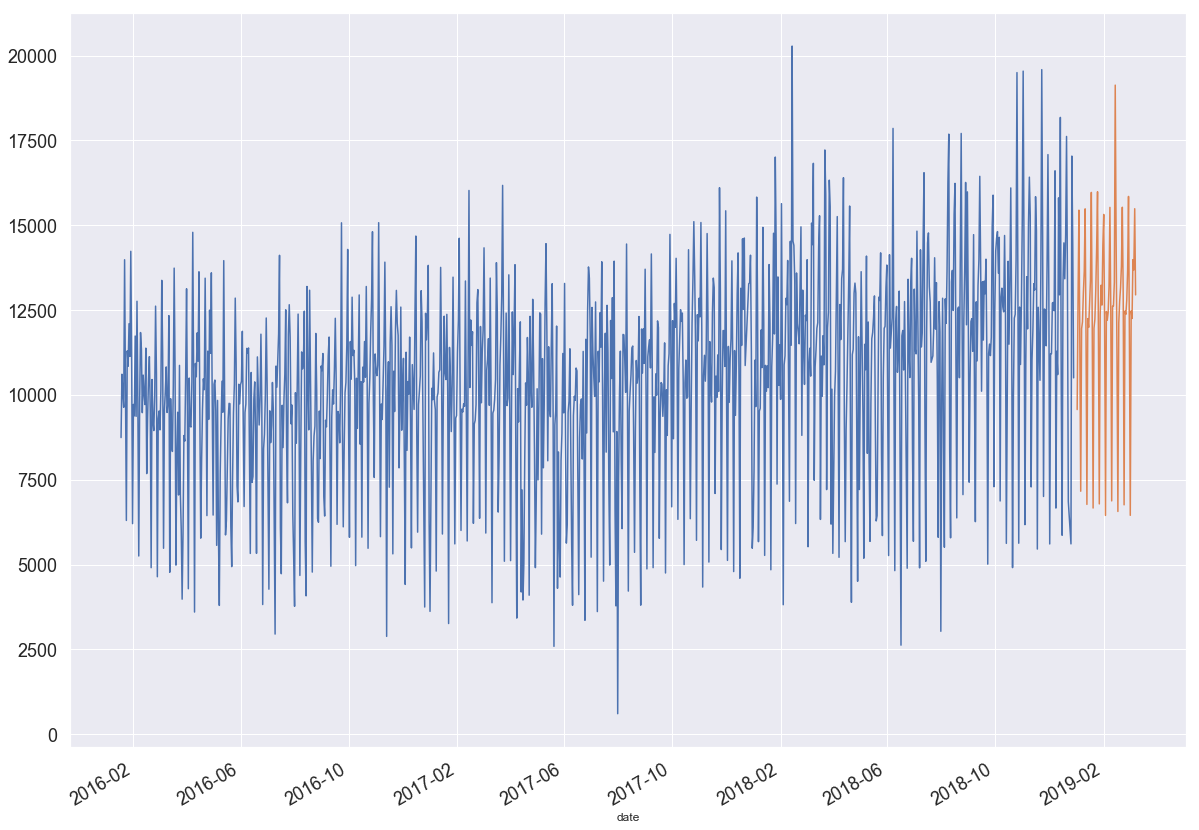

In [572]:
test_daily['turnover'] = pred_daily
# plotting the extended dataframe
train_daily.set_index('date')['turnover'].plot(figsize=(20,15), fontsize=18)
test_daily.set_index('date')['turnover'].plot(figsize=(20,15))

In [ ]:
test_daily.set_index('date')['turnover'].plot(figsize=(20,10))

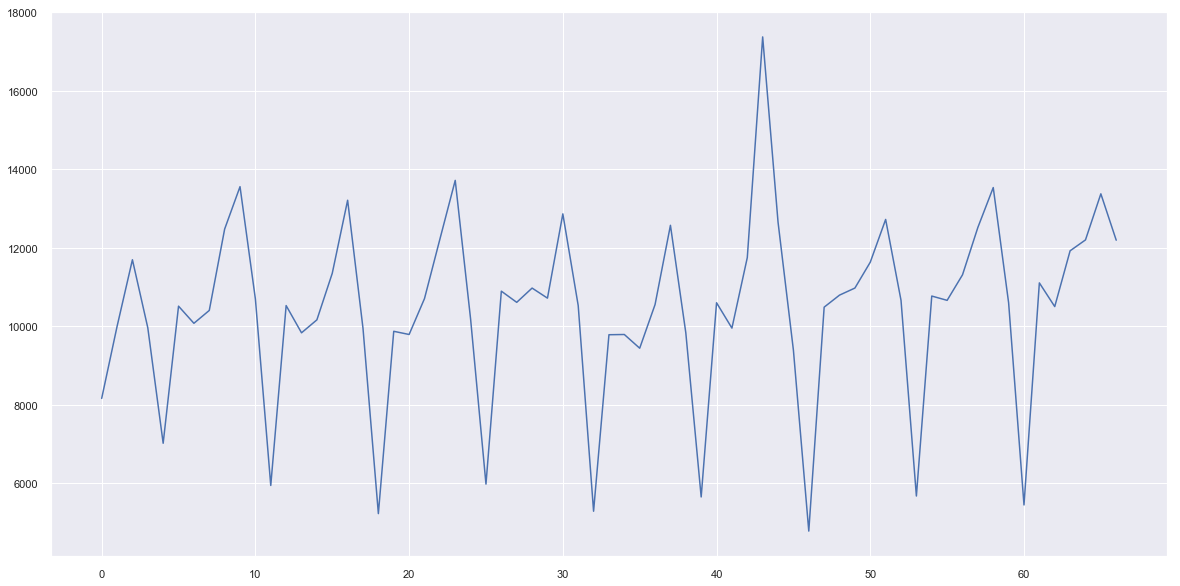

In [264]:
test_daily['try'].plot(figsize=(20,10))

In [ ]:
‘

In [242]:
# daily try
#n_features = np.arange(8, 18, 2)

GB_cv = GridSearchCV(GB_pipe, 
                         {  
                 'GB__min_samples_split': [10],
                 'GB__min_samples_leaf': [11],
                 'GB__max_depth': [9],
                 'GB__n_estimators': [1200],
                 'GB__learning_rate':[0.01],
                 'GB__subsample':[0.8],
#                 'GB__loss': ['huber'],
       #           'RFE__n_features_to_select':n_features,           
              #   'GB__max_features': ['sqrt']
             },
                         n_jobs=-1, 
                         scoring=MAPE_scorer,
                         verbose=True,
                         cv=3)
GB_cv.fit(X_tr, y_tr)

y_te_GB_pred = GB_cv.predict(X_te)
y_tr_GB_pred = GB_cv.predict(X_tr)

mape_GB = mean_absolute_percentage_error(y_te, y_te_GB_pred)
mape_GB_tr = mean_absolute_percentage_error(y_tr, y_tr_GB_pred)




print(GB_cv.best_params_)
print('MAPE on our test data: {:.3f}'.format(mape_GB))
print('MAPE on our trainig data: {:.3f}'.format(mape_GB_tr))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.6s finished


{'GB__learning_rate': 0.01, 'GB__max_depth': 9, 'GB__min_samples_leaf': 11, 'GB__min_samples_split': 10, 'GB__n_estimators': 1200, 'GB__subsample': 0.8}
MAPE on our test data: 0.503
MAPE on our trainig data: 0.533


In [249]:
GB

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=11,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.8, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [250]:
X_tr.shape

(855, 44)

In [253]:
X_pred = test_daily.drop(columns=['test', 'try']).values

In [252]:
test_daily.head()

wdayN  month  day_of_year  Calender_week  year  weekN  Day_of_Month  \
0      3      1            2              1  2019      1             2   
1      4      1            3              1  2019      1             3   
2      5      1            4              1  2019      1             4   
3      6      1            5              1  2019      1             5   
4      7      1            6              1  2019      1             6   

   Number_of_half_days_of_holidays         hr   ppt     ...       hlL_False  \
0                                4  78.708333   0.0     ...               1   
1                                4  68.000000   0.0     ...               1   
2                                4  64.750000   0.0     ...               1   
3                                4  88.041667  15.1     ...               1   
4                                4  96.833333  12.8     ...               1   

   hlL_True  Holiday_False  Holiday_True  Holiday_pls_1_False  \
0         0              0             1                    0   
1         0              0             1                    1   
2         0              0             1                    1   
3         0              1             0                    1   
4         0              1             0                    1   

   Holiday_pls_1_True  Holiday_neg_1_False  Holiday_neg_1_True          test  \
0                   1                    1                   0   8156.986239   
1                   0                    1                   0  10012.617448   
2                   0                    1                   0  11691.303742   
3                   0                    1                   0   9956.212785   
4                   0                    1                   0   6994.559745   

           try  
0  3233.026446  
1  3278.371104  
2  3250.042338  
3  3195.351406  
4  3186.987097  

[5 rows x 46 columns]

In [255]:
GB.fit(X_d, y_d)
pred_try=  GB.predict(X_pred)

In [257]:
test_daily['try'] = pred_try

In [330]:
np.mean(pred_try)

10422.243062884489

In [245]:
pred_d_try = GB_cv.predict(test_daily.drop(columns=['turnover']).values)
test_daily['try'] = pred_d_try

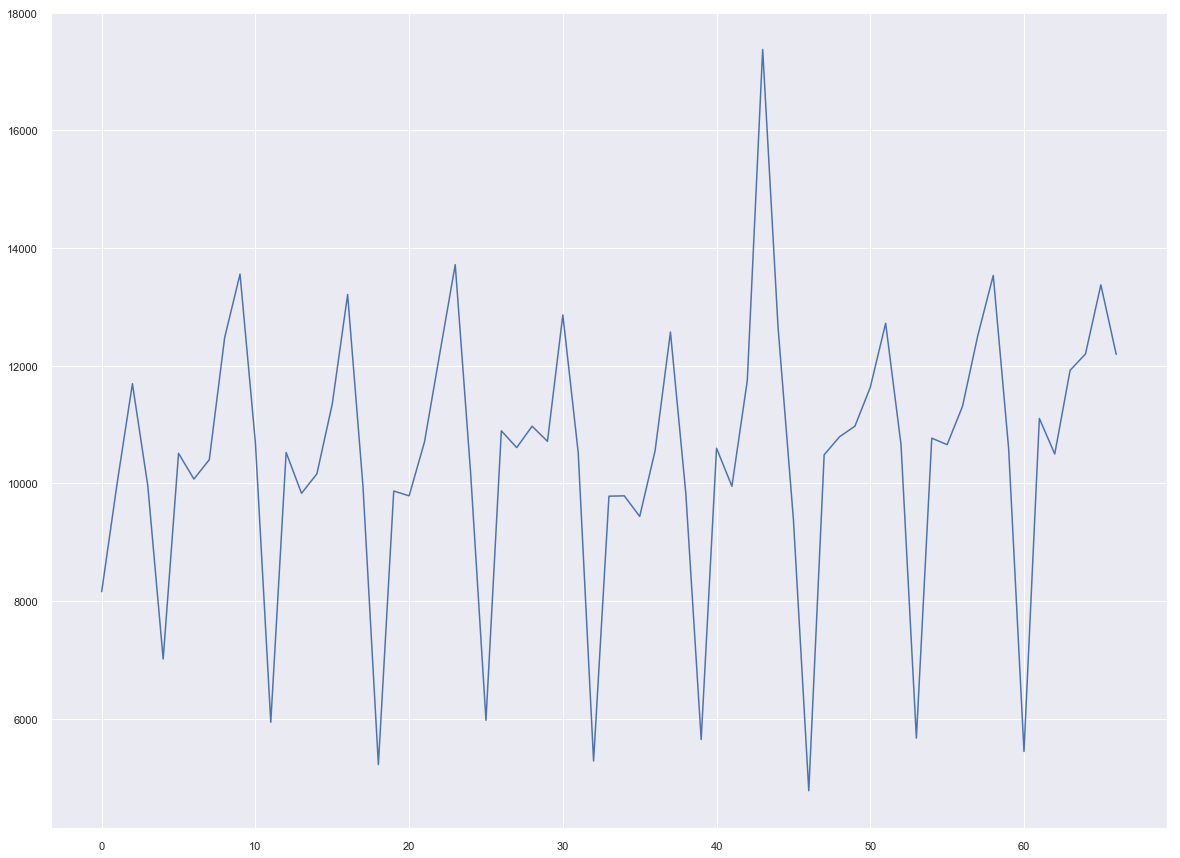

In [261]:
test_daily['try'].plot(figsize=(20,15))

In [303]:
from fbprophet import Prophet

In [381]:
df_tr = try_l.copy()
df_tr.rename(columns={'date':'ds', 'turnover':'y'}, inplace=True)

In [323]:
# Creating a suitable dataframe for our time-series model
df_d_tr = train_daily.copy()
df_d_tr.rename(columns={'date':'ds', 'turnover':'y'}, inplace=True)

In [382]:
# Loading and fitting our model
m = Prophet()
m.fit(df_d_tr)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [336]:
test_daily.shape

(67, 27)

In [383]:
# predictiing the next 90 days
future = m.make_future_dataframe(periods=90, freq='D')
forecast = m.predict(future)

ds
1064 2018-12-23
1065 2018-12-24
1066 2018-12-25
1067 2018-12-26
1068 2018-12-27

In [385]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1064 2018-12-23   7585.257836   5502.137053   9839.083464
1065 2018-12-24  12495.113385  10448.398635  14672.184502
1066 2018-12-25  12486.645237  10409.743503  14583.200400
1067 2018-12-26  13037.439815  11026.480225  15099.136476
1068 2018-12-27  13450.974178  11290.904506  15472.450669

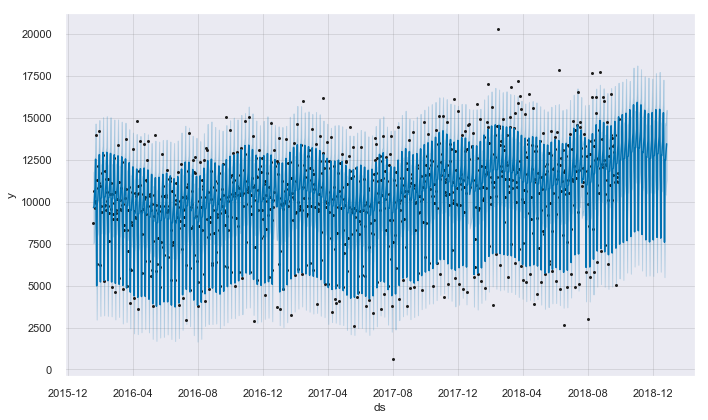

In [598]:
# plotting the time series and forecast
fig1 = m.plot(forecast)
fig1.figsize=(20,20)

In [387]:
try_a = train_daily.iloc[-90:]

In [391]:
try_l.tail()

date holidays_str school_holiday_str wday  wdayN  month  \
974 2018-09-24           No                 No   Mo      1      9   
975 2018-09-25           No                 No   Di      2      9   
976 2018-09-26           No                 No   Mi      3      9   
977 2018-09-27           No                 No   Do      4      9   
978 2018-09-28           No                 No   Fr      5      9   

     day_of_year  Calender_week  year  weekN     ...      sf  sun        tmp  \
974          267             39  2018    141     ...       0  182  11.342083   
975          268             39  2018    141     ...       0  681   9.174167   
976          269             39  2018    141     ...       0  666  10.675000   
977          270             39  2018    141     ...       0  677  15.197500   
978          271             39  2018    141     ...       0  558  17.133750   

           ws    turnover  Seit_t0  month_str  before_payday  tmp_delta  \
974  3.397083  11219.8750      980        Sep              1  -8.657083   
975  5.699583  11497.8750      981        Sep              0  -2.167917   
976  1.631250  11158.4375      982        Sep              0   1.500833   
977  0.906250  11701.5625      983        Sep              0   4.522500   
978  2.352500  14930.6250      984        Sep              0   1.936250   

     is_holiday  
974          No  
975          No  
976          No  
977          No  
978          No  

[5 rows x 28 columns]

In [392]:
forecast.head()

ds        trend    yhat_lower    yhat_upper  trend_lower  \
0 2016-01-18  9283.421679   7528.369312  11773.128532  9283.421679   
1 2016-01-19  9284.703316   7606.049503  11810.042303  9284.703316   
2 2016-01-20  9285.984952   8285.982512  12331.423259  9285.984952   
3 2016-01-21  9287.266588   8762.219760  12872.192168  9287.266588   
4 2016-01-22  9288.548224  10299.955993  14660.266035  9288.548224   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  9283.421679      358.954409            358.954409            358.954409   
1  9284.703316      438.964603            438.964603            438.964603   
2  9285.984952     1075.056324           1075.056324           1075.056324   
3  9287.266588     1569.532323           1569.532323           1569.532323   
4  9288.548224     3246.899331           3246.899331           3246.899331   

        weekly  weekly_lower  weekly_upper      yearly  yearly_lower  \
0   135.908825    135.908825    135.908825  223.045584    223.045584   
1   164.824360    164.824360    164.824360  274.140243    274.140243   
2   750.770551    750.770551    750.770551  324.285772    324.285772   
3  1196.463689   1196.463689   1196.463689  373.068633    373.068633   
4  2826.776561   2826.776561   2826.776561  420.122770    420.122770   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0    223.045584                   0.0                         0.0   
1    274.140243                   0.0                         0.0   
2    324.285772                   0.0                         0.0   
3    373.068633                   0.0                         0.0   
4    420.122770                   0.0                         0.0   

   multiplicative_terms_upper          yhat  
0                         0.0   9642.376088  
1                         0.0   9723.667918  
2                         0.0  10361.041275  
3                         0.0  10856.798911  
4                         0.0  12535.447555

In [393]:
forecast.iloc[-90:].head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
979 2018-09-29  12018.234700   9786.320602  14087.855978  12018.234700   
980 2018-09-30  12022.863754   5429.509787   9511.593289  12022.863754   
981 2018-10-01  12027.492809  10507.930616  14496.699030  12027.492809   
982 2018-10-02  12032.121863  10306.115692  14784.132722  12032.121863   
983 2018-10-03  12036.750918  10962.693280  15196.286378  12036.750918   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
979  12018.234700      -22.732189            -22.732189            -22.732189   
980  12022.863754    -4553.718166          -4553.718166          -4553.718166   
981  12027.492809      411.463522            411.463522            411.463522   
982  12032.121863      453.875726            453.875726            453.875726   
983  12036.750918     1050.660342           1050.660342           1050.660342   

          weekly  weekly_lower  weekly_upper      yearly  yearly_lower  \
979  -261.986817   -261.986817   -261.986817  239.254629    239.254629   
980 -4812.757169  -4812.757169  -4812.757169  259.039003    259.039003   
981   135.908825    135.908825    135.908825  275.554696    275.554696   
982   164.824360    164.824360    164.824360  289.051366    289.051366   
983   750.770551    750.770551    750.770551  299.889791    299.889791   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
979    239.254629                   0.0                         0.0   
980    259.039003                   0.0                         0.0   
981    275.554696                   0.0                         0.0   
982    289.051366                   0.0                         0.0   
983    299.889791                   0.0                         0.0   

     multiplicative_terms_upper          yhat  
979                         0.0  11995.502511  
980                         0.0   7469.145588  
981                         0.0  12438.956331  
982                         0.0  12485.997589  
983                         0.0  13087.411260

In [395]:
y_pred_f = forecast.iloc[-90:].yhat.values

In [397]:
y_true = try_a.turnover.values

In [398]:
y_true.shape

(90,)

In [399]:
y_pred_f.shape

(90,)

In [400]:
# testing our time-series prediction
y_pred_f = forecast.iloc[-90:].yhat.values
mape_f = mean_absolute_percentage_error(y_true, y_pred_f)
print(mape_f)

14.496914581932668


In [ ]:
mape = mean_absolute_percentage_error(y_te, pred)

In [401]:
X_d.shape

(1069, 44)

In [402]:
y_d.shape

(1069,)

In [423]:
X_d_train = X_d[:-90]
X_d_test = X_d[-90:]
y_d_train = y_d[:-90]
y_d_test = y_d[-90:]

In [424]:
X_d_train.shape

(979, 44)

In [606]:
GB

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=11,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.8, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [633]:
GB1 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=None, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=11,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.8, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [646]:
GB2 = GradientBoostingRegressor()

In [648]:
X_d_train = X_d[:-90]
X_d_test = X_d[-90:]
y_d_train = y_d[:-90]
y_d_test = y_d[-90:]

gb = GB2.fit(X_d_train, y_d_train)
gb_pred = gb.predict(X_d_test)
gb_pred_tr = gb.predict(X_d_train)
mape_gb = mean_absolute_percentage_error(y_d_test, gb_pred)
mape_gb_train = mean_absolute_percentage_error(y_d_train, gb_pred_tr)
print(mape_gb)
print(mape_gb_train)

0.3013975307322938
0.1767810334442575


In [655]:
y_d[-90:]

array([15886.6875,  7295.125 , 12450.    , 14240.75  , 14622.375 ,
       14812.125 , 13588.875 , 14644.    ,  6874.9375, 12888.625 ,
       13145.25  , 12597.125 , 12448.25  , 14697.75  , 12400.625 ,
        5625.75  , 10051.5   , 13938.125 , 11495.25  , 13394.6875,
       16098.9375, 12347.5   ,  4911.25  ,  9992.25  , 12261.875 ,
       12374.25  , 13987.625 , 19497.5   , 13606.3125,  5630.125 ,
       12588.75  , 10896.6875, 12690.8125, 15182.5   , 19540.9375,
       13957.625 ,  6176.625 , 10992.625 , 13484.    , 11945.375 ,
       15018.75  , 16416.25  , 15287.875 ,  7288.375 , 11031.875 ,
       11916.0625, 13277.75  , 13091.125 , 15840.6875, 14836.75  ,
        5458.    , 12582.625 , 11466.    , 10431.    , 13760.625 ,
       19584.875 , 14694.375 ,  7007.75  , 12530.5   , 12506.0625,
       11447.0625, 13814.125 , 17080.9375, 13119.4375,  5608.5625,
       11215.625 , 11213.8125, 12708.375 , 12723.875 , 12482.625 ,
       16603.5   ,  6666.125 , 11289.0625, 10599.25  , 15805.9

In [654]:
gb_pred

array([15921.15   ,  7310.81875, 12456.6    , 14268.54375, 14610.01875,
       14776.44375, 13600.94375, 14630.26875,  6847.1    , 12875.76875,
       13166.06875, 12597.525  , 12456.39375, 14698.6125 , 12416.43125,
        5632.9125 , 10067.78125, 13962.3875 , 11496.775  , 13438.82625,
       16176.93125, 12347.5375 ,  4912.20625,  9987.45   , 12256.025  ,
       12365.35   , 13986.6375 , 17921.725  , 13597.9125 ,  5621.76875,
       12592.375  , 10891.28125, 12700.15625, 15250.625  , 17887.9875 ,
       13972.54375,  6193.48125, 11000.2    , 13459.25125, 11938.975  ,
       15093.4625 , 16437.69375, 15317.9    ,  7325.4625 , 11023.31875,
       11916.91875, 13278.00625, 13077.4875 , 15925.275  , 14782.1125 ,
        5468.66875, 12591.1875 , 11460.4875 , 10438.25   , 13734.475  ,
       17887.9875 , 14696.95   ,  7035.1875 , 12503.55   , 12499.20625,
       11443.26875, 13838.74375, 16960.93125, 13120.7125 ,  5629.06875,
       11210.94375, 11209.5875 , 12719.775  , 12739.43125, 12479

In [649]:
X_d_train = X_d[:-90]
X_d_test = X_d[-90:]
y_d_train = y_d[:-90]
y_d_test = y_d[-90:]

gb = GB1.fit(X_d_train, y_d_train)
gb_pred = gb.predict(X_d_test)
gb_pred_tr = gb.predict(X_d_train)
mape_gb = mean_absolute_percentage_error(y_d_test, gb_pred)
mape_gb_train = mean_absolute_percentage_error(y_d_train, gb_pred_tr)
print(mape_gb)
print(mape_gb_train)

0.7280420523204751
0.4733872261649952


In [639]:
rfr1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [650]:
gb = rfr.fit(X_d_train, y_d_train)
gb_pred = gb.predict(X_d_test)
mape_gb = mean_absolute_percentage_error(y_d_test, gb_pred)
gb_pred_tr = gb.predict(X_d_train)
mape_gb = mean_absolute_percentage_error(y_d_test, gb_pred)
mape_gb_train = mean_absolute_percentage_error(y_d_train, gb_pred_tr)
print(mape_gb)
print(mape_gb_train)

0.4962605417462361
0.33005617775907353


In [600]:
X_d_train.shape

(979, 44)

In [420]:
np.mean(gb_pred)

12355.97808884062

In [435]:
np.mean(y_d_test)

12448.274305555555

In [416]:
mape_gb = mean_absolute_percentage_error(gb_pred, y_d_test)
print(mape_gb)

3.602735409725064


In [430]:
rid = Ridge(alpha=2)

In [601]:
gb = rid.fit(scale(X_d_train), y_d_train)
gb_pred = gb.predict(scale(X_d_test))
mape_gb = mean_absolute_percentage_error(y_d_test, gb_pred)
print(mape_gb)

18.110240813905644


In [605]:
gb = rfr.fit(X_d_train, y_d_train)
gb_pred = gb.predict(X_d_test)
mape_gb = mean_absolute_percentage_error(y_d_test, gb_pred)
print(mape_gb)

0.6673363743012647


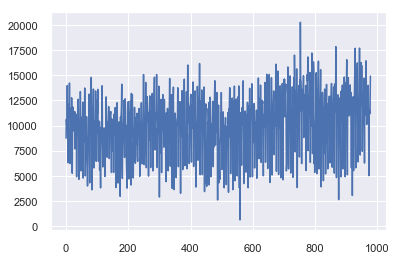

In [408]:
plt.plot(y_d_train)

# Buchzeichen

In [394]:
try_a.head()

date holidays_str school_holiday_str wday  wdayN  month  \
979 2018-09-29           No                 No   Sa      6      9   
980 2018-09-30           No                 No   So      7      9   
981 2018-10-01           No                 No   Mo      1     10   
982 2018-10-02           No                 No   Di      2     10   
983 2018-10-03           No                 No   Mi      3     10   

     day_of_year  Calender_week  year  weekN     ...      sf  sun        tmp  \
979          272             39  2018    141     ...       0  622  12.680833   
980          273             39  2018    141     ...       0  428  13.842500   
981          274             40  2018    142     ...       0   19  10.482083   
982          275             40  2018    142     ...       0  464   9.473750   
983          276             40  2018    142     ...       0    0  12.507083   

           ws    turnover  Seit_t0  month_str  before_payday  tmp_delta  \
979  6.736667  15886.6875      985        Sep              0  -4.452917   
980  1.713333   7295.1250      986        Sep              0   1.161667   
981  4.325000  12450.0000      987        Oct              0  -3.360417   
982  3.532500  14240.7500      988        Oct              0  -1.008333   
983  2.581250  14622.3750      989        Oct              0   3.033333   

     is_holiday  
979          No  
980          No  
981          No  
982          No  
983          No  

[5 rows x 28 columns]

In [339]:
from sklearn.preprocessing import MinMaxScaler

In [359]:
values = df_tr['y'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [360]:
train_size= int(len(scaled)*0.8)
test_size = len(scaled)- train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

855 214


In [361]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)- look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i +look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [134]:
mixed_y_tr = (y_pred_nn_tr +y_tr_GB_pred)/2
mape_mix_tr = mean_absolute_percentage_error(y_tr, mixed_y_tr)
print(mape_mix_tr)

85.1582874452932


In [605]:
mixed_y = (y_pred_nn+y_te_GB_pred)/2
mape_mix = mean_absolute_percentage_error(y_te, mixed_y)
print(mape_mix)

11.646904211360438


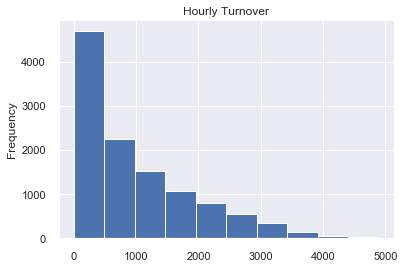

In [190]:
train_full['turnover_hourly'].plot(kind='hist', title='Hourly Turnover')

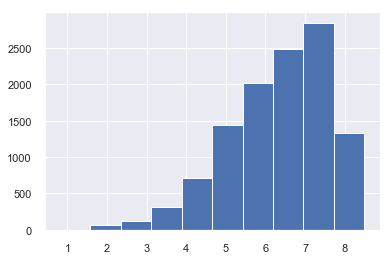

In [189]:
np.log1p(train_full['turnover_hourly']).hist()

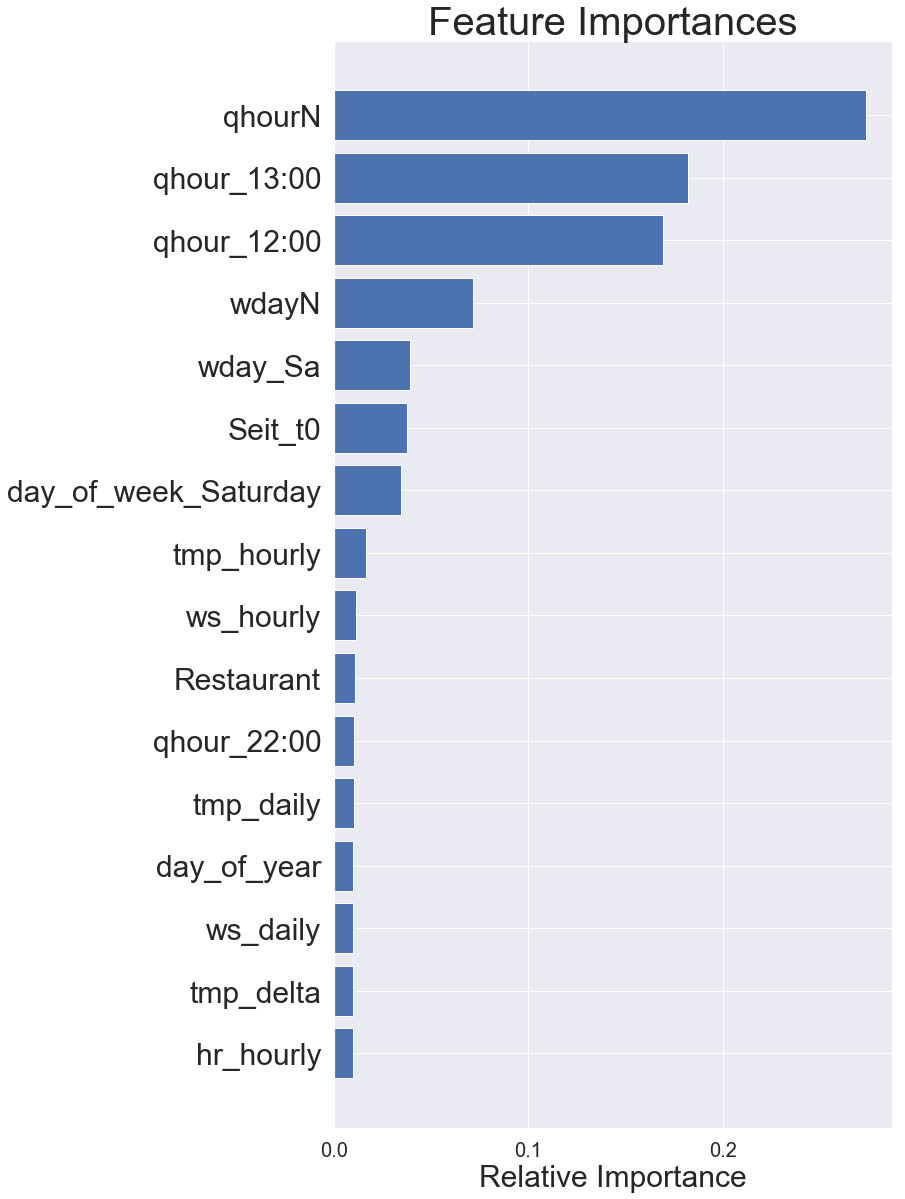

In [753]:
#rfe_feat = GB_cv.best_estimator_.named_steps['RFE']
rid_coef = GB_cv.best_estimator_.named_steps['GB']
rid_df = tr_full

features=rid_df.columns
importances = rid_coef.feature_importances_
indices = np.argsort(importances)[-16:]

plt.figure(1, figsize=(10,20))
plt.title('Feature Importances', fontsize=40)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices], fontsize=30)
plt.xticks(fontsize=20)
plt.xlabel('Relative Importance', fontsize=30)
#plt.figsize(20,20)
plt.show()

## Neural Network

In [142]:
X_tr.shape

(9072, 69)

In [152]:
# define NN model
def model():
    # creating a NN with one hidden layers and relu activation
    model = Sequential()
    model.add(Dense(X_tr.shape[1], input_dim=X_tr.shape[1], kernel_initializer='normal', activation='relu'))
  #  model.add(Dropout(0.1))
    model.add(Dense(18, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(38, kernel_initializer='normal', activation='relu'))
   # model.add(Dropout(0.1))
    model.add(Dense(18, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile our model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [5]:
train_daily.turnover

NameError: name 'train_daily' is not defined

In [197]:
seed = 5
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
#estimators.append(('pca', PCA(n_components=280)))
estimators.append(('mlp', KerasRegressor(build_fn=model, epochs=100, batch_size=25, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=3, random_state=seed)
results = cross_val_score(pipeline, X_tr, y_tr, cv=kfold)
pipeline.fit(scale(X_tr), np.log1p(y_tr))

y_pred_nn = pipeline.predict(scale(X_te))
y_pred_nn_tr = pipeline.predict(scale(X_tr))

mape_NN_tr = mean_absolute_percentage_error(y_tr, np.expm1(y_pred_nn_tr))
mape_NN = mean_absolute_percentage_error(y_te, np.expm1(y_pred_nn))

y_nn_pred_full = pipeline.predict(scale(X_h))
train_full['pred_h'] = np.expm1(y_nn_pred_full)
y_nn_pred_d = train_full.groupby('date')['pred_h'].sum().values
mape_nn_d = mean_absolute_percentage_error(y_d, y_nn_pred_d)

print('MAPE on our test data: {:.3f}'.format(mape_NN))
print('MAPE on our trainig data: {:.3f}'.format(mape_NN_tr))
print('Mape Daily: {}'.format(mape_nn_d))

Epoch 1/100
6048/6048 [==============================] - 2s 265us/step - loss: 1622933.9133
Epoch 2/100
6048/6048 [==============================] - 0s 67us/step - loss: 553030.2156
Epoch 3/100
6048/6048 [==============================] - 0s 71us/step - loss: 322830.0781
Epoch 4/100
6048/6048 [==============================] - 0s 57us/step - loss: 290774.8072
Epoch 5/100
6048/6048 [==============================] - 0s 63us/step - loss: 272851.9987
Epoch 6/100
6048/6048 [==============================] - 0s 56us/step - loss: 258656.3723
Epoch 7/100
6048/6048 [==============================] - 0s 60us/step - loss: 247211.8439 0s - loss: 246803.
Epoch 8/100
6048/6048 [==============================] - 0s 55us/step - loss: 236762.7465
Epoch 9/100
6048/6048 [==============================] - 0s 77us/step - loss: 228553.1280
Epoch 10/100
6048/6048 [==============================] - 0s 61us/step - loss: 222163.9613
Epoch 11/100
6048/6048 [==============================] - 0s 68us/step - loss:

6048/6048 [==============================] - 0s 60us/step - loss: 175162.6637
Epoch 80/100
6048/6048 [==============================] - 0s 60us/step - loss: 174705.5194
Epoch 81/100
6048/6048 [==============================] - 0s 64us/step - loss: 174157.8178
Epoch 82/100
6048/6048 [==============================] - 0s 60us/step - loss: 173940.1717
Epoch 83/100
6048/6048 [==============================] - 0s 57us/step - loss: 173918.7166
Epoch 84/100
6048/6048 [==============================] - 0s 70us/step - loss: 172802.8324
Epoch 85/100
6048/6048 [==============================] - 0s 63us/step - loss: 172923.1731
Epoch 86/100
6048/6048 [==============================] - 0s 66us/step - loss: 172233.1011
Epoch 87/100
6048/6048 [==============================] - 0s 67us/step - loss: 172104.9276
Epoch 88/100
6048/6048 [==============================] - 0s 60us/step - loss: 171900.9956
Epoch 89/100
6048/6048 [==============================] - 0s 51us/step - loss: 171595.9288
Epoch 90/100

9072/9072 [==============================] - 0s 53us/step - loss: 0.2996
Epoch 61/100
9072/9072 [==============================] - 1s 57us/step - loss: 0.2999
Epoch 62/100
9072/9072 [==============================] - 0s 55us/step - loss: 0.3013
Epoch 63/100
9072/9072 [==============================] - 0s 53us/step - loss: 0.2987
Epoch 64/100
9072/9072 [==============================] - 0s 54us/step - loss: 0.2936
Epoch 65/100
9072/9072 [==============================] - 1s 57us/step - loss: 0.2915
Epoch 66/100
9072/9072 [==============================] - 0s 55us/step - loss: 0.2918
Epoch 67/100
9072/9072 [==============================] - 1s 56us/step - loss: 0.2889
Epoch 68/100
9072/9072 [==============================] - 1s 57us/step - loss: 0.2871
Epoch 69/100
9072/9072 [==============================] - 1s 58us/step - loss: 0.2839
Epoch 70/100
9072/9072 [==============================] - 0s 55us/step - loss: 0.2839
Epoch 71/100
9072/9072 [==============================] - 1s 55us/s

/anaconda2/envs/exts-aml2/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


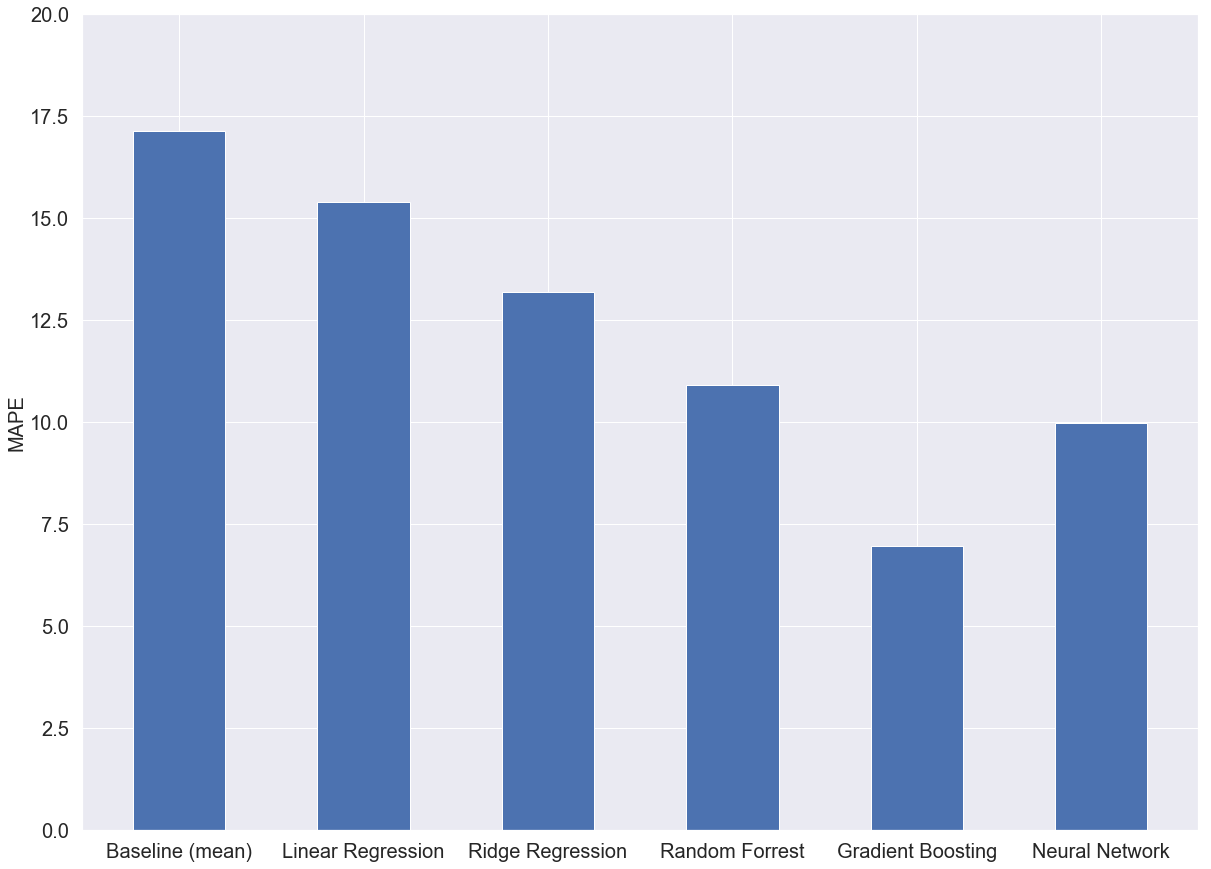

In [168]:
mape_d_list = [mape_dum_d, mape_lin_d, mape_rid_d, mape_rfr_d, mape_gb_d, mape_nn_d]

n_groups = len(mape_d_list)
fig, ax = plt.subplots(figsize=(20, 15))
index = np.arange(n_groups)
bar_width = 0.5
error_config = {'ecolor': '0.3'}
rects1 = ax.bar(index, mape_d_list, bar_width,
                 color='b')

#ax.set_xlabel('Modelle')
ax.set_ylabel('MAPE', fontsize=20)
#ax.set_title('MAPE of our Models')
plt.xticks(range(len(mape_d_list)),['Baseline (mean)', 'Linear Regression', 'Ridge Regression',
                                
                                  'Random Forrest', 'Gradient Boosting',
                                     'Neural Network', 'Mixed'], fontsize=20)
plt.yticks(fontsize=20)
ax.legend(fontsize=25)
plt.ylim(0, 20)
plt.show()

# Modelvergleich

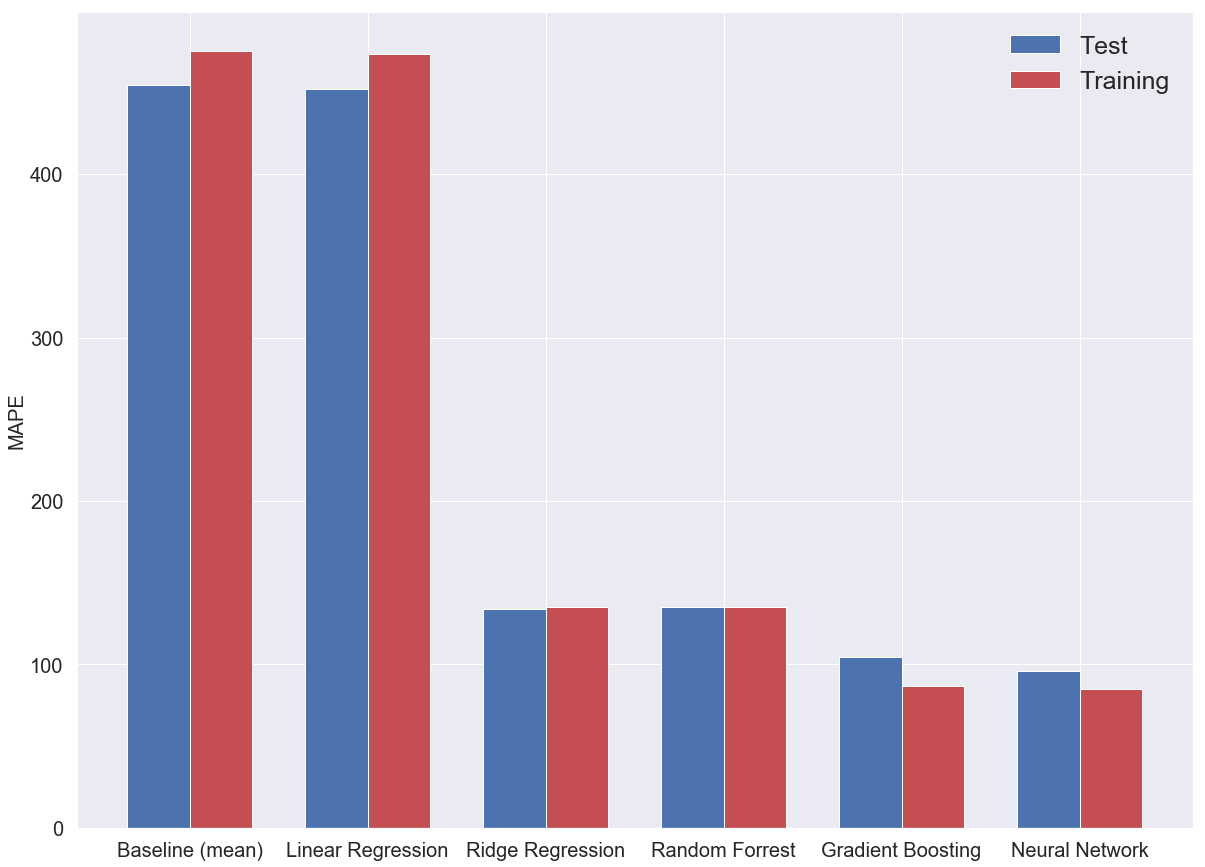

In [166]:
list_MAPE_tr = [mape_dum_tr, mape_lin_tr, mape_rid_tr, 
                mape_rfr_tr, mape_GB_tr,
                mape_NN_tr]
list_MAPE_te = [mape_dum_te, mape_lin_te, mape_rid,
               mape_rfr, mape_GB, 
                mape_NN]

n_groups = len(list_MAPE_tr)
fig, ax = plt.subplots(figsize=(20, 15))
index = np.arange(n_groups)
bar_width = 0.35

error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, list_MAPE_te, bar_width,
                 color='b',
                 label='Test')

rects2 = ax.bar(index + bar_width, list_MAPE_tr, bar_width,
                 color='r',
                 label='Training')

#ax.set_xlabel('Modelle')
ax.set_ylabel('MAPE', fontsize=20)
#ax.set_title('MAPE of our Models')

plt.xticks(range(len(list_MAPE_te)),['Baseline (mean)', 'Linear Regression', 'Ridge Regression',
                                
                                '     Random Forrest', 'Gradient Boosting',
                                     'Neural Network', 'Mixed'], fontsize=20)
plt.yticks(fontsize=20)

ax.set_xticks(index + bar_width / 2)
ax.legend(fontsize=25)
#plt.ylim(0, 35)

plt.show()

In [4]:
plt.figure(figsize=(10,7))
visualizer = ResidualsPlot(GB)

visualizer.fit(X_tr, y_tr)  # Fit the training data to the model
visualizer.score(X_te, y_te)  # Evaluate the model on the test data
visualizer.poof() # get Residualsplot

NameError: name 'plt' is not defined